<img src="./img/escudo-un.png" alt="Escudo Universidad Nacional de Colombia" width="400"/>

# Laboratorio 2:
### Santiago Álvarez Sepúlveda
### Correo: *saalvarezse@unal.edu.co*
### Código: *25481031*
### Algoritmos, Grupo 1
---

**Insertion Sort:**

1. Desarrolle programas en Python que ejecute Insertion Sort sobre todas las permutaciones (una version usando permutations de Itertools y determinando hasta que valor puede generar las permutaciones en memoria y otra version usando el código de Daniel Jimenez para genera las permutaciones sobre un unico arreglo) y sobre una muestra aleatorias de permutaciones y que generen el numero promedio y la distribución del numero de instrucciones (lineas), comparaciones, intercambios y preguntas en el while que se requieren para ordenar. Se puede basar en el código Java de los Applets InsertSortTimePlot, InsertSortCompPlot y InsertSortWhileQuestionsPlot y en código Python para InsertionSort del IPython notebook: corrección y análisis de algoritmos y el codigo insertionsort.py. Publique el código y los resultados en una entrada de su cuenta de Github como Ipython notebooks). 

2. Cormen Exercises I.2.1 in **Overleaf**.

In [19]:
# Importar librerías
import random
import itertools
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

# Constantes Globales
DEBUG = True # Hacer True para depurar en pantalla, False para analisis de mayor longitud soportada por la memoria.

# Clases Implementadas
'''
Class Counter
Implements a step counter, which is used to compute the number of basic operations performed in
a particular call to a function.
    '''
class Counter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.instr = 0
        self.comps = 0
        self.inter = 0
        self.pregs = 0

    def count(self, instr=0, comps=0, inter=0, pregs=0):
        self.instr += instr
        self.comps += comps
        self.inter += inter
        self.pregs += pregs

    def print_results(self):
        print 'instrucciones: %d, comparaciones: %d, intercambios: %d, preguntas: %d'%(self.instr, self.comps, self.inter, self.pregs)

# Funciones Implementadas
'''
Función: plot_distribution
'''
def plot_distribution(name, arr, mean, std, n, color):
    print name
    print arr
    print 'promedio: %f, std: %f'%(mean, std)
    plt.figure(), plt.title(u'Distribución %s orden %d'%(name, n))
    plt.hist(arr, max(arr)-min(arr) if max(arr)-min(arr) > len(set(arr)) else len(set(arr)), 
             normed=1, facecolor=color, alpha=0.75)
    plt.grid(), plt.show()

'''
Función: plot_distribution
'''
def plot_complexity(cmplx_instr_n, cmplx_comps_n, cmplx_inter_n, cmplx_pregs_n):
    plt.figure(), plt.title('Complejidad Mejor Caso')
    plt.plot([x[0] for x in cmplx_instr_n], 'red', label='Instrucciones')
    plt.plot([x[0] for x in cmplx_comps_n], 'green', label='Comparaciones')
    plt.plot([x[0] for x in cmplx_inter_n], 'blue', label='Intercambios')
    plt.plot([x[0] for x in cmplx_pregs_n], 'cyan', label='Preguntas')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad Caso Promedio')
    plt.plot([x[2] for x in cmplx_instr_n], 'red', label='Instrucciones')
    plt.plot([x[2] for x in cmplx_comps_n], 'green', label='Comparaciones')
    plt.plot([x[2] for x in cmplx_inter_n], 'blue', label='Intercambios')
    plt.plot([x[2] for x in cmplx_pregs_n], 'cyan', label='Preguntas')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad Peor Caso')
    plt.plot([x[1] for x in cmplx_instr_n], 'red', label='Instrucciones')
    plt.plot([x[1] for x in cmplx_comps_n], 'green', label='Comparaciones')
    plt.plot([x[1] for x in cmplx_inter_n], 'blue', label='Intercambios')
    plt.plot([x[1] for x in cmplx_pregs_n], 'cyan', label='Preguntas')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad por Instrucciones')
    plt.plot([x[0] for x in cmplx_instr_n], 'red', label='Mejor')
    plt.plot([x[2] for x in cmplx_instr_n], 'green', label='Promedio')
    plt.plot([x[1] for x in cmplx_instr_n], 'blue', label='Peor')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad por Comparaciones')
    plt.plot([x[0] for x in cmplx_comps_n], 'red', label='Mejor')
    plt.plot([x[2] for x in cmplx_comps_n], 'green', label='Promedio')
    plt.plot([x[1] for x in cmplx_comps_n], 'blue', label='Peor')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad por Intercambios')
    plt.plot([x[0] for x in cmplx_inter_n], 'red', label='Mejor')
    plt.plot([x[2] for x in cmplx_inter_n], 'green', label='Promedio')
    plt.plot([x[1] for x in cmplx_inter_n], 'blue', label='Peor')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad por Preguntas')
    plt.plot([x[0] for x in cmplx_pregs_n], 'red', label='Mejor')
    plt.plot([x[2] for x in cmplx_pregs_n], 'green', label='Promedio')
    plt.plot([x[1] for x in cmplx_pregs_n], 'blue', label='Peor')
    plt.grid(), plt.legend()
    plt.show()

# Algoritmo Insertion Sort
'''
Función: insertionSort
@arr: Arreglo tipo tuple a ordenar.

Ordenar un arreglo mediante el algoritmo Insertion Sort y registrar la cantidad de instrucciones, comparaciones e intercambios
que realiza el algoritmo a cada arreglo de longitud N.
'''
def insertionSort(arr):
    # Crear lista con el arreglo (tuple) de entrad
    v = []
    N = len(arr)
    for i in range(N):
        v.append(arr[i])
    # Ordenar lista de elementos y contar cantidad de instrucciones, comparaciones, intercambios y preguntas en el while
    counter = Counter()
    counter.count(instr=1, comps=0, inter=0, pregs=0)
    for i in range(1, len(v)):         # (instr+1)
        x = v[i]                       # (instr+1)
        j = i-1                        # (instr+1)
        while (j > -1) and (v[j] > x): # (instr+1), (comps+1), (pregs+2)
            v[j+1] = v[j]              # (instr+1), (inter+1)
            j = j-1                    # (instr+1)
            counter.count(instr=3, comps=1, inter=1, pregs=2)
        v[j+1] = x                     # (instr+1)
        counter.count(instr=5, comps=1, inter=0, pregs=2)
    return counter, v

## Implementación con **Itertools**

In [20]:
'''
Función: permutacionesItertools
@N: Máxima cantidad de elementos en arreglo a ordenar

Aplicar el algoritmo de Insertion Sort cada lista de permutaciones generada con la herramienta Itertools.
'''
def permutacionesItertools(N, DEBUG=False):
    # Generar todas las posibles permutaciones que soporte la memoria
    instr_n, comps_n, inter_n, pregs_n = [], [], [], []
    cmplx_instr_n, cmplx_comps_n, cmplx_inter_n, cmplx_pregs_n = [], [], [], []
    for n in range(1, N+1):
        # Hallar el conjunto de posibles permitaciones con Itertools
        perms = [x for x in itertools.permutations(range(n))]
        print 'N: %d'%(n)
        # Ordenar mediante Insertion Sort y almacenar número de operaciones en función de la longitud del arreglo
        instr, comps, inter, pregs = [], [], [], []
        for perm in perms:
            counter, _ = insertionSort(perm)
            instr.append(counter.instr), comps.append(counter.comps), inter.append(counter.inter), pregs.append(counter.pregs)
            if DEBUG: 
                print 'perm:'
                print perm
                counter.print_results()
        # Almacenar resultados en función de N
        instr_n.append(instr), comps_n.append(comps), inter_n.append(inter), pregs_n.append(pregs)
        # Almacenar estadística en función de N
        cmplx_instr_n.append([instr[0], instr[-1], np.mean(instr), np.std(instr)])
        cmplx_comps_n.append([comps[0], comps[-1], np.mean(comps), np.std(comps)])
        cmplx_inter_n.append([inter[0], inter[-1], np.mean(inter), np.std(inter)]), 
        cmplx_pregs_n.append([pregs[0], pregs[-1], np.mean(pregs), np.std(pregs)])
        if DEBUG:  
            plot_distribution('Instrucciones:', instr, cmplx_instr_n[n-1][2], cmplx_instr_n[n-1][3], n, 'red')
            plot_distribution('Comparaciones:', comps, cmplx_comps_n[n-1][2], cmplx_comps_n[n-1][3], n, 'green')
            plot_distribution('Intercambios:', inter, cmplx_inter_n[n-1][2], cmplx_inter_n[n-1][3], n, 'blue')
            plot_distribution('Preguntas:', pregs, cmplx_pregs_n[n-1][2], cmplx_pregs_n[n-1][3], n, 'cyan')
    if DEBUG: 
        plot_complexity(cmplx_instr_n, cmplx_comps_n, cmplx_inter_n, cmplx_pregs_n)

N: 1
perm:
(0,)
instrucciones: 1, comparaciones: 0, intercambios: 0, preguntas: 0
Instrucciones:
[1]
promedio: 1.000000, std: 0.000000


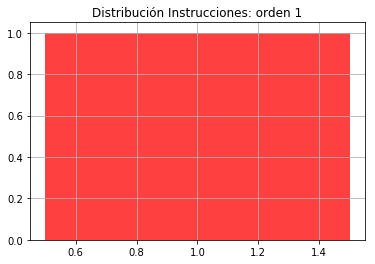

Comparaciones:
[0]
promedio: 0.000000, std: 0.000000


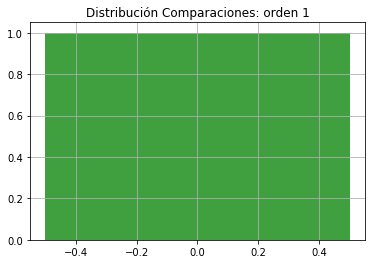

Intercambios:
[0]
promedio: 0.000000, std: 0.000000


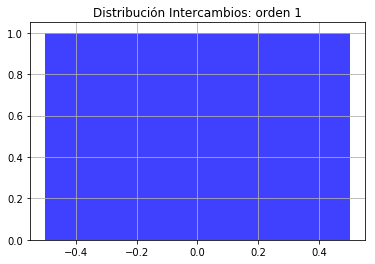

Preguntas:
[0]
promedio: 0.000000, std: 0.000000


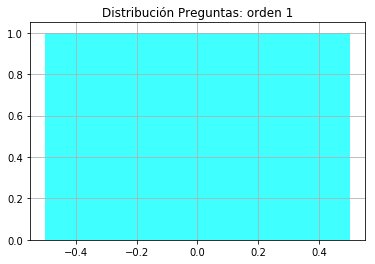

N: 2
perm:
(0, 1)
instrucciones: 6, comparaciones: 1, intercambios: 0, preguntas: 2
perm:
(1, 0)
instrucciones: 9, comparaciones: 2, intercambios: 1, preguntas: 4
Instrucciones:
[6, 9]
promedio: 7.500000, std: 1.500000


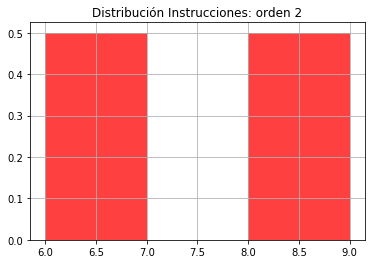

Comparaciones:
[1, 2]
promedio: 1.500000, std: 0.500000


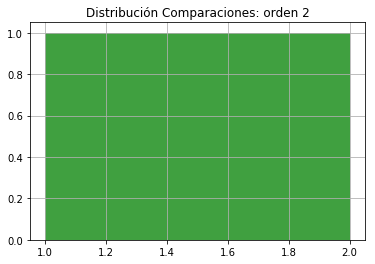

Intercambios:
[0, 1]
promedio: 0.500000, std: 0.500000


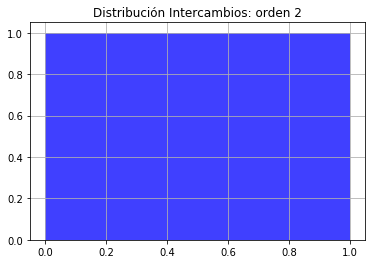

Preguntas:
[2, 4]
promedio: 3.000000, std: 1.000000


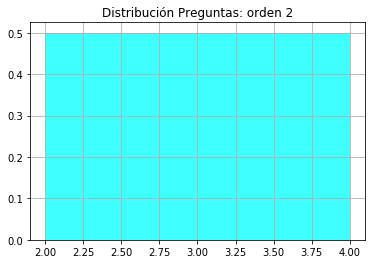

N: 3
perm:
(0, 1, 2)
instrucciones: 11, comparaciones: 2, intercambios: 0, preguntas: 4
perm:
(0, 2, 1)
instrucciones: 14, comparaciones: 3, intercambios: 1, preguntas: 6
perm:
(1, 0, 2)
instrucciones: 14, comparaciones: 3, intercambios: 1, preguntas: 6
perm:
(1, 2, 0)
instrucciones: 17, comparaciones: 4, intercambios: 2, preguntas: 8
perm:
(2, 0, 1)
instrucciones: 17, comparaciones: 4, intercambios: 2, preguntas: 8
perm:
(2, 1, 0)
instrucciones: 20, comparaciones: 5, intercambios: 3, preguntas: 10
Instrucciones:
[11, 14, 14, 17, 17, 20]
promedio: 15.500000, std: 2.872281


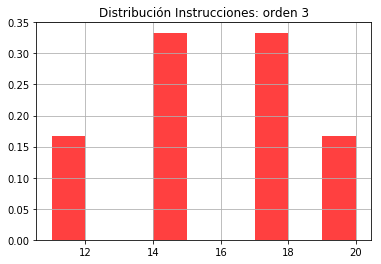

Comparaciones:
[2, 3, 3, 4, 4, 5]
promedio: 3.500000, std: 0.957427


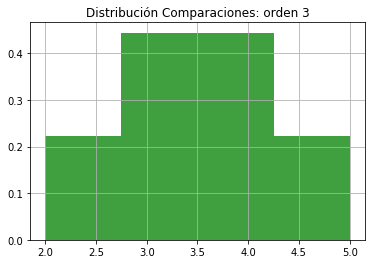

Intercambios:
[0, 1, 1, 2, 2, 3]
promedio: 1.500000, std: 0.957427


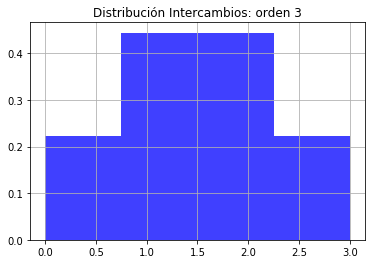

Preguntas:
[4, 6, 6, 8, 8, 10]
promedio: 7.000000, std: 1.914854


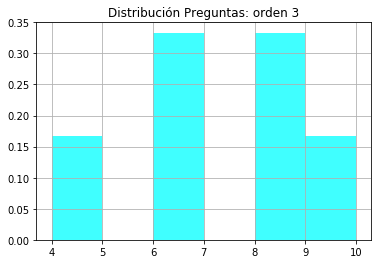

N: 4
perm:
(0, 1, 2, 3)
instrucciones: 16, comparaciones: 3, intercambios: 0, preguntas: 6
perm:
(0, 1, 3, 2)
instrucciones: 19, comparaciones: 4, intercambios: 1, preguntas: 8
perm:
(0, 2, 1, 3)
instrucciones: 19, comparaciones: 4, intercambios: 1, preguntas: 8
perm:
(0, 2, 3, 1)
instrucciones: 22, comparaciones: 5, intercambios: 2, preguntas: 10
perm:
(0, 3, 1, 2)
instrucciones: 22, comparaciones: 5, intercambios: 2, preguntas: 10
perm:
(0, 3, 2, 1)
instrucciones: 25, comparaciones: 6, intercambios: 3, preguntas: 12
perm:
(1, 0, 2, 3)
instrucciones: 19, comparaciones: 4, intercambios: 1, preguntas: 8
perm:
(1, 0, 3, 2)
instrucciones: 22, comparaciones: 5, intercambios: 2, preguntas: 10
perm:
(1, 2, 0, 3)
instrucciones: 22, comparaciones: 5, intercambios: 2, preguntas: 10
perm:
(1, 2, 3, 0)
instrucciones: 25, comparaciones: 6, intercambios: 3, preguntas: 12
perm:
(1, 3, 0, 2)
instrucciones: 25, comparaciones: 6, intercambios: 3, preguntas: 12
perm:
(1, 3, 2, 0)
instrucciones: 28, comp

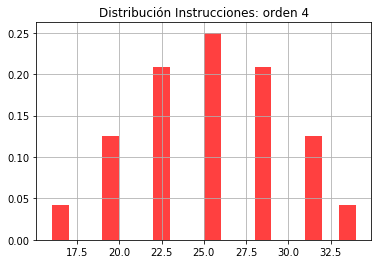

Comparaciones:
[3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9]
promedio: 6.000000, std: 1.471960


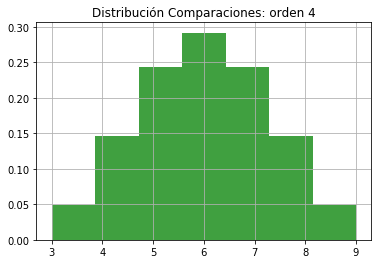

Intercambios:
[0, 1, 1, 2, 2, 3, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6]
promedio: 3.000000, std: 1.471960


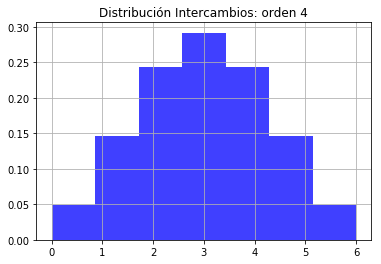

Preguntas:
[6, 8, 8, 10, 10, 12, 8, 10, 10, 12, 12, 14, 10, 12, 12, 14, 14, 16, 12, 14, 14, 16, 16, 18]
promedio: 12.000000, std: 2.943920


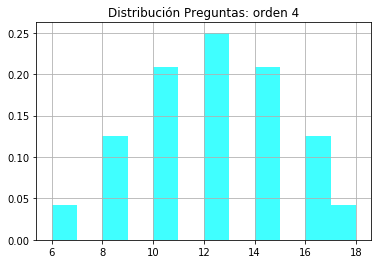

N: 5
perm:
(0, 1, 2, 3, 4)
instrucciones: 21, comparaciones: 4, intercambios: 0, preguntas: 8
perm:
(0, 1, 2, 4, 3)
instrucciones: 24, comparaciones: 5, intercambios: 1, preguntas: 10
perm:
(0, 1, 3, 2, 4)
instrucciones: 24, comparaciones: 5, intercambios: 1, preguntas: 10
perm:
(0, 1, 3, 4, 2)
instrucciones: 27, comparaciones: 6, intercambios: 2, preguntas: 12
perm:
(0, 1, 4, 2, 3)
instrucciones: 27, comparaciones: 6, intercambios: 2, preguntas: 12
perm:
(0, 1, 4, 3, 2)
instrucciones: 30, comparaciones: 7, intercambios: 3, preguntas: 14
perm:
(0, 2, 1, 3, 4)
instrucciones: 24, comparaciones: 5, intercambios: 1, preguntas: 10
perm:
(0, 2, 1, 4, 3)
instrucciones: 27, comparaciones: 6, intercambios: 2, preguntas: 12
perm:
(0, 2, 3, 1, 4)
instrucciones: 27, comparaciones: 6, intercambios: 2, preguntas: 12
perm:
(0, 2, 3, 4, 1)
instrucciones: 30, comparaciones: 7, intercambios: 3, preguntas: 14
perm:
(0, 2, 4, 1, 3)
instrucciones: 30, comparaciones: 7, intercambios: 3, preguntas: 14
perm:


perm:
(4, 2, 0, 3, 1)
instrucciones: 42, comparaciones: 11, intercambios: 7, preguntas: 22
perm:
(4, 2, 1, 0, 3)
instrucciones: 42, comparaciones: 11, intercambios: 7, preguntas: 22
perm:
(4, 2, 1, 3, 0)
instrucciones: 45, comparaciones: 12, intercambios: 8, preguntas: 24
perm:
(4, 2, 3, 0, 1)
instrucciones: 45, comparaciones: 12, intercambios: 8, preguntas: 24
perm:
(4, 2, 3, 1, 0)
instrucciones: 48, comparaciones: 13, intercambios: 9, preguntas: 26
perm:
(4, 3, 0, 1, 2)
instrucciones: 42, comparaciones: 11, intercambios: 7, preguntas: 22
perm:
(4, 3, 0, 2, 1)
instrucciones: 45, comparaciones: 12, intercambios: 8, preguntas: 24
perm:
(4, 3, 1, 0, 2)
instrucciones: 45, comparaciones: 12, intercambios: 8, preguntas: 24
perm:
(4, 3, 1, 2, 0)
instrucciones: 48, comparaciones: 13, intercambios: 9, preguntas: 26
perm:
(4, 3, 2, 0, 1)
instrucciones: 48, comparaciones: 13, intercambios: 9, preguntas: 26
perm:
(4, 3, 2, 1, 0)
instrucciones: 51, comparaciones: 14, intercambios: 10, preguntas: 2

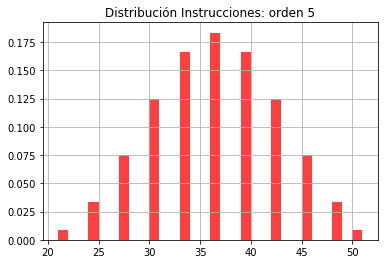

Comparaciones:
[4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14]
promedio: 9.000000, std: 2.041241


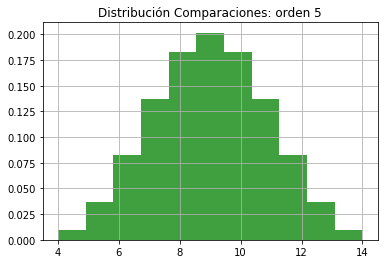

Intercambios:
[0, 1, 1, 2, 2, 3, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10]
promedio: 5.000000, std: 2.041241


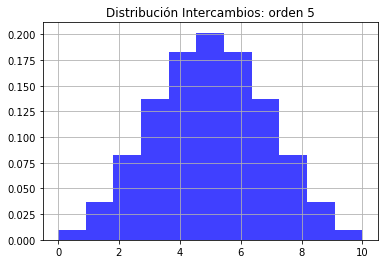

Preguntas:
[8, 10, 10, 12, 12, 14, 10, 12, 12, 14, 14, 16, 12, 14, 14, 16, 16, 18, 14, 16, 16, 18, 18, 20, 10, 12, 12, 14, 14, 16, 12, 14, 14, 16, 16, 18, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 12, 14, 14, 16, 16, 18, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28]
promedio: 18.000000, std: 4.082483


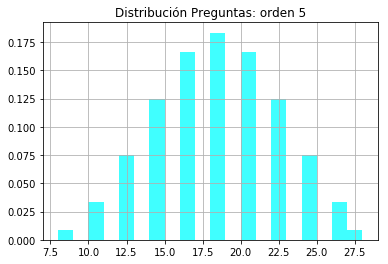

N: 6
perm:
(0, 1, 2, 3, 4, 5)
instrucciones: 26, comparaciones: 5, intercambios: 0, preguntas: 10
perm:
(0, 1, 2, 3, 5, 4)
instrucciones: 29, comparaciones: 6, intercambios: 1, preguntas: 12
perm:
(0, 1, 2, 4, 3, 5)
instrucciones: 29, comparaciones: 6, intercambios: 1, preguntas: 12
perm:
(0, 1, 2, 4, 5, 3)
instrucciones: 32, comparaciones: 7, intercambios: 2, preguntas: 14
perm:
(0, 1, 2, 5, 3, 4)
instrucciones: 32, comparaciones: 7, intercambios: 2, preguntas: 14
perm:
(0, 1, 2, 5, 4, 3)
instrucciones: 35, comparaciones: 8, intercambios: 3, preguntas: 16
perm:
(0, 1, 3, 2, 4, 5)
instrucciones: 29, comparaciones: 6, intercambios: 1, preguntas: 12
perm:
(0, 1, 3, 2, 5, 4)
instrucciones: 32, comparaciones: 7, intercambios: 2, preguntas: 14
perm:
(0, 1, 3, 4, 2, 5)
instrucciones: 32, comparaciones: 7, intercambios: 2, preguntas: 14
perm:
(0, 1, 3, 4, 5, 2)
instrucciones: 35, comparaciones: 8, intercambios: 3, preguntas: 16
perm:
(0, 1, 3, 5, 2, 4)
instrucciones: 35, comparaciones: 8, int

instrucciones: 53, comparaciones: 14, intercambios: 9, preguntas: 28
perm:
(4, 3, 1, 2, 0, 5)
instrucciones: 53, comparaciones: 14, intercambios: 9, preguntas: 28
perm:
(4, 3, 1, 2, 5, 0)
instrucciones: 56, comparaciones: 15, intercambios: 10, preguntas: 30
perm:
(4, 3, 1, 5, 0, 2)
instrucciones: 56, comparaciones: 15, intercambios: 10, preguntas: 30
perm:
(4, 3, 1, 5, 2, 0)
instrucciones: 59, comparaciones: 16, intercambios: 11, preguntas: 32
perm:
(4, 3, 2, 0, 1, 5)
instrucciones: 53, comparaciones: 14, intercambios: 9, preguntas: 28
perm:
(4, 3, 2, 0, 5, 1)
instrucciones: 56, comparaciones: 15, intercambios: 10, preguntas: 30
perm:
(4, 3, 2, 1, 0, 5)
instrucciones: 56, comparaciones: 15, intercambios: 10, preguntas: 30
perm:
(4, 3, 2, 1, 5, 0)
instrucciones: 59, comparaciones: 16, intercambios: 11, preguntas: 32
perm:
(4, 3, 2, 5, 0, 1)
instrucciones: 59, comparaciones: 16, intercambios: 11, preguntas: 32
perm:
(4, 3, 2, 5, 1, 0)
instrucciones: 62, comparaciones: 17, intercambios: 1

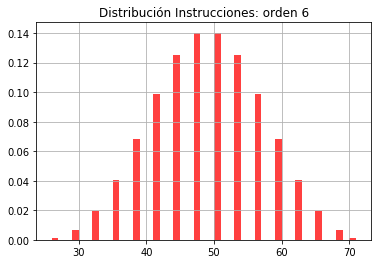

Comparaciones:
[5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 13, 14, 14, 15, 15, 16, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 8, 9, 9, 10, 10

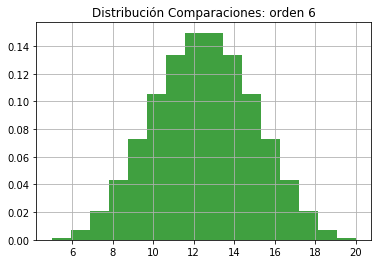

Intercambios:
[0, 1, 1, 2, 2, 3, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 

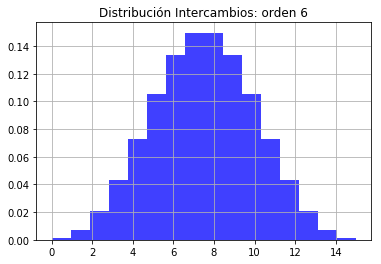

Preguntas:
[10, 12, 12, 14, 14, 16, 12, 14, 14, 16, 16, 18, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 12, 14, 14, 16, 16, 18, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 12, 14, 14, 16, 16, 18, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 26, 28, 28, 30, 30, 32, 14, 16, 16, 18, 18, 20, 16, 

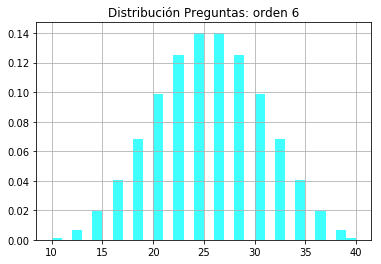

N: 7
perm:
(0, 1, 2, 3, 4, 5, 6)
instrucciones: 31, comparaciones: 6, intercambios: 0, preguntas: 12
perm:
(0, 1, 2, 3, 4, 6, 5)
instrucciones: 34, comparaciones: 7, intercambios: 1, preguntas: 14
perm:
(0, 1, 2, 3, 5, 4, 6)
instrucciones: 34, comparaciones: 7, intercambios: 1, preguntas: 14
perm:
(0, 1, 2, 3, 5, 6, 4)
instrucciones: 37, comparaciones: 8, intercambios: 2, preguntas: 16
perm:
(0, 1, 2, 3, 6, 4, 5)
instrucciones: 37, comparaciones: 8, intercambios: 2, preguntas: 16
perm:
(0, 1, 2, 3, 6, 5, 4)
instrucciones: 40, comparaciones: 9, intercambios: 3, preguntas: 18
perm:
(0, 1, 2, 4, 3, 5, 6)
instrucciones: 34, comparaciones: 7, intercambios: 1, preguntas: 14
perm:
(0, 1, 2, 4, 3, 6, 5)
instrucciones: 37, comparaciones: 8, intercambios: 2, preguntas: 16
perm:
(0, 1, 2, 4, 5, 3, 6)
instrucciones: 37, comparaciones: 8, intercambios: 2, preguntas: 16
perm:
(0, 1, 2, 4, 5, 6, 3)
instrucciones: 40, comparaciones: 9, intercambios: 3, preguntas: 18
perm:
(0, 1, 2, 4, 6, 3, 5)
instruc

instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(0, 1, 5, 4, 3, 2, 6)
instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(0, 1, 5, 4, 3, 6, 2)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(0, 1, 5, 4, 6, 2, 3)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(0, 1, 5, 4, 6, 3, 2)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(0, 1, 5, 6, 2, 3, 4)
instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(0, 1, 5, 6, 2, 4, 3)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(0, 1, 5, 6, 3, 2, 4)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(0, 1, 5, 6, 3, 4, 2)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(0, 1, 5, 6, 4, 2, 3)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(0, 1, 5, 6, 4, 3, 2)
instrucciones: 58, comparacion

(0, 5, 3, 1, 4, 2, 6)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(0, 5, 3, 1, 4, 6, 2)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(0, 5, 3, 1, 6, 2, 4)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(0, 5, 3, 1, 6, 4, 2)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(0, 5, 3, 2, 1, 4, 6)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(0, 5, 3, 2, 1, 6, 4)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(0, 5, 3, 2, 4, 1, 6)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(0, 5, 3, 2, 4, 6, 1)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(0, 5, 3, 2, 6, 1, 4)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(0, 5, 3, 2, 6, 4, 1)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(0, 5, 3, 4, 1, 2, 6)
instruc

instrucciones: 46, comparaciones: 11, intercambios: 5, preguntas: 22
perm:
(1, 3, 0, 2, 6, 4, 5)
instrucciones: 46, comparaciones: 11, intercambios: 5, preguntas: 22
perm:
(1, 3, 0, 2, 6, 5, 4)
instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(1, 3, 0, 4, 2, 5, 6)
instrucciones: 43, comparaciones: 10, intercambios: 4, preguntas: 20
perm:
(1, 3, 0, 4, 2, 6, 5)
instrucciones: 46, comparaciones: 11, intercambios: 5, preguntas: 22
perm:
(1, 3, 0, 4, 5, 2, 6)
instrucciones: 46, comparaciones: 11, intercambios: 5, preguntas: 22
perm:
(1, 3, 0, 4, 5, 6, 2)
instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(1, 3, 0, 4, 6, 2, 5)
instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(1, 3, 0, 4, 6, 5, 2)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(1, 3, 0, 5, 2, 4, 6)
instrucciones: 46, comparaciones: 11, intercambios: 5, preguntas: 22
perm:
(1, 3, 0, 5, 2, 6, 4)
instrucciones: 49, comparacion

perm:
(1, 6, 2, 4, 5, 3, 0)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(1, 6, 2, 5, 0, 3, 4)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(1, 6, 2, 5, 0, 4, 3)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(1, 6, 2, 5, 3, 0, 4)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(1, 6, 2, 5, 3, 4, 0)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(1, 6, 2, 5, 4, 0, 3)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(1, 6, 2, 5, 4, 3, 0)
instrucciones: 70, comparaciones: 19, intercambios: 13, preguntas: 38
perm:
(1, 6, 3, 0, 2, 4, 5)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(1, 6, 3, 0, 2, 5, 4)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(1, 6, 3, 0, 4, 2, 5)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(1, 6, 3, 0, 4, 5

perm:
(2, 3, 0, 5, 6, 1, 4)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(2, 3, 0, 5, 6, 4, 1)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(2, 3, 0, 6, 1, 4, 5)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(2, 3, 0, 6, 1, 5, 4)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(2, 3, 0, 6, 4, 1, 5)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(2, 3, 0, 6, 4, 5, 1)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(2, 3, 0, 6, 5, 1, 4)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(2, 3, 0, 6, 5, 4, 1)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(2, 3, 1, 0, 4, 5, 6)
instrucciones: 46, comparaciones: 11, intercambios: 5, preguntas: 22
perm:
(2, 3, 1, 0, 4, 6, 5)
instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(2, 3, 1, 0, 5, 4, 6)
i

perm:
(2, 3, 6, 5, 0, 4, 1)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(2, 3, 6, 5, 1, 0, 4)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(2, 3, 6, 5, 1, 4, 0)
instrucciones: 70, comparaciones: 19, intercambios: 13, preguntas: 38
perm:
(2, 3, 6, 5, 4, 0, 1)
instrucciones: 70, comparaciones: 19, intercambios: 13, preguntas: 38
perm:
(2, 3, 6, 5, 4, 1, 0)
instrucciones: 73, comparaciones: 20, intercambios: 14, preguntas: 40
perm:
(2, 4, 0, 1, 3, 5, 6)
instrucciones: 46, comparaciones: 11, intercambios: 5, preguntas: 22
perm:
(2, 4, 0, 1, 3, 6, 5)
instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(2, 4, 0, 1, 5, 3, 6)
instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(2, 4, 0, 1, 5, 6, 3)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(2, 4, 0, 1, 6, 3, 5)
instrucciones: 52, comparaciones: 13, intercambios: 7, preguntas: 26
perm:
(2, 4, 0, 1, 6, 5, 

instrucciones: 76, comparaciones: 21, intercambios: 15, preguntas: 42
perm:
(2, 6, 5, 4, 1, 3, 0)
instrucciones: 79, comparaciones: 22, intercambios: 16, preguntas: 44
perm:
(2, 6, 5, 4, 3, 0, 1)
instrucciones: 79, comparaciones: 22, intercambios: 16, preguntas: 44
perm:
(2, 6, 5, 4, 3, 1, 0)
instrucciones: 82, comparaciones: 23, intercambios: 17, preguntas: 46
perm:
(3, 0, 1, 2, 4, 5, 6)
instrucciones: 40, comparaciones: 9, intercambios: 3, preguntas: 18
perm:
(3, 0, 1, 2, 4, 6, 5)
instrucciones: 43, comparaciones: 10, intercambios: 4, preguntas: 20
perm:
(3, 0, 1, 2, 5, 4, 6)
instrucciones: 43, comparaciones: 10, intercambios: 4, preguntas: 20
perm:
(3, 0, 1, 2, 5, 6, 4)
instrucciones: 46, comparaciones: 11, intercambios: 5, preguntas: 22
perm:
(3, 0, 1, 2, 6, 4, 5)
instrucciones: 46, comparaciones: 11, intercambios: 5, preguntas: 22
perm:
(3, 0, 1, 2, 6, 5, 4)
instrucciones: 49, comparaciones: 12, intercambios: 6, preguntas: 24
perm:
(3, 0, 1, 4, 2, 5, 6)
instrucciones: 43, comparac

instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(3, 4, 0, 2, 5, 6, 1)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(3, 4, 0, 2, 6, 1, 5)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(3, 4, 0, 2, 6, 5, 1)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(3, 4, 0, 5, 1, 2, 6)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(3, 4, 0, 5, 1, 6, 2)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(3, 4, 0, 5, 2, 1, 6)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(3, 4, 0, 5, 2, 6, 1)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(3, 4, 0, 5, 6, 1, 2)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(3, 4, 0, 5, 6, 2, 1)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(3, 4, 0, 6, 1, 2, 5)
instrucciones: 58, compara

perm:
(4, 0, 5, 6, 3, 2, 1)
instrucciones: 70, comparaciones: 19, intercambios: 13, preguntas: 38
perm:
(4, 0, 6, 1, 2, 3, 5)
instrucciones: 55, comparaciones: 14, intercambios: 8, preguntas: 28
perm:
(4, 0, 6, 1, 2, 5, 3)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(4, 0, 6, 1, 3, 2, 5)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(4, 0, 6, 1, 3, 5, 2)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(4, 0, 6, 1, 5, 2, 3)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(4, 0, 6, 1, 5, 3, 2)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(4, 0, 6, 2, 1, 3, 5)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(4, 0, 6, 2, 1, 5, 3)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(4, 0, 6, 2, 3, 1, 5)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(4, 0, 6, 2, 3, 5,

(4, 5, 0, 1, 2, 6, 3)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(4, 5, 0, 1, 3, 2, 6)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(4, 5, 0, 1, 3, 6, 2)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(4, 5, 0, 1, 6, 2, 3)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(4, 5, 0, 1, 6, 3, 2)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(4, 5, 0, 2, 1, 3, 6)
instrucciones: 58, comparaciones: 15, intercambios: 9, preguntas: 30
perm:
(4, 5, 0, 2, 1, 6, 3)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(4, 5, 0, 2, 3, 1, 6)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(4, 5, 0, 2, 3, 6, 1)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(4, 5, 0, 2, 6, 1, 3)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(4, 5, 0, 2, 6, 3, 1)
i

perm:
(5, 1, 4, 2, 0, 3, 6)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(5, 1, 4, 2, 0, 6, 3)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(5, 1, 4, 2, 3, 0, 6)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(5, 1, 4, 2, 3, 6, 0)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(5, 1, 4, 2, 6, 0, 3)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(5, 1, 4, 2, 6, 3, 0)
instrucciones: 70, comparaciones: 19, intercambios: 13, preguntas: 38
perm:
(5, 1, 4, 3, 0, 2, 6)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(5, 1, 4, 3, 0, 6, 2)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(5, 1, 4, 3, 2, 0, 6)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(5, 1, 4, 3, 2, 6, 0)
instrucciones: 70, comparaciones: 19, intercambios: 13, preguntas: 38
perm:
(5, 1, 4, 3, 6

(5, 4, 6, 3, 0, 1, 2)
instrucciones: 79, comparaciones: 22, intercambios: 16, preguntas: 44
perm:
(5, 4, 6, 3, 0, 2, 1)
instrucciones: 82, comparaciones: 23, intercambios: 17, preguntas: 46
perm:
(5, 4, 6, 3, 1, 0, 2)
instrucciones: 82, comparaciones: 23, intercambios: 17, preguntas: 46
perm:
(5, 4, 6, 3, 1, 2, 0)
instrucciones: 85, comparaciones: 24, intercambios: 18, preguntas: 48
perm:
(5, 4, 6, 3, 2, 0, 1)
instrucciones: 85, comparaciones: 24, intercambios: 18, preguntas: 48
perm:
(5, 4, 6, 3, 2, 1, 0)
instrucciones: 88, comparaciones: 25, intercambios: 19, preguntas: 50
perm:
(5, 6, 0, 1, 2, 3, 4)
instrucciones: 61, comparaciones: 16, intercambios: 10, preguntas: 32
perm:
(5, 6, 0, 1, 2, 4, 3)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(5, 6, 0, 1, 3, 2, 4)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(5, 6, 0, 1, 3, 4, 2)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(5, 6, 0, 1, 4, 2, 3

perm:
(6, 2, 3, 5, 0, 4, 1)
instrucciones: 73, comparaciones: 20, intercambios: 14, preguntas: 40
perm:
(6, 2, 3, 5, 1, 0, 4)
instrucciones: 73, comparaciones: 20, intercambios: 14, preguntas: 40
perm:
(6, 2, 3, 5, 1, 4, 0)
instrucciones: 76, comparaciones: 21, intercambios: 15, preguntas: 42
perm:
(6, 2, 3, 5, 4, 0, 1)
instrucciones: 76, comparaciones: 21, intercambios: 15, preguntas: 42
perm:
(6, 2, 3, 5, 4, 1, 0)
instrucciones: 79, comparaciones: 22, intercambios: 16, preguntas: 44
perm:
(6, 2, 4, 0, 1, 3, 5)
instrucciones: 64, comparaciones: 17, intercambios: 11, preguntas: 34
perm:
(6, 2, 4, 0, 1, 5, 3)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(6, 2, 4, 0, 3, 1, 5)
instrucciones: 67, comparaciones: 18, intercambios: 12, preguntas: 36
perm:
(6, 2, 4, 0, 3, 5, 1)
instrucciones: 70, comparaciones: 19, intercambios: 13, preguntas: 38
perm:
(6, 2, 4, 0, 5, 1, 3)
instrucciones: 70, comparaciones: 19, intercambios: 13, preguntas: 38
perm:
(6, 2, 4, 0, 5

(6, 5, 3, 1, 0, 4, 2)
instrucciones: 79, comparaciones: 22, intercambios: 16, preguntas: 44
perm:
(6, 5, 3, 1, 2, 0, 4)
instrucciones: 79, comparaciones: 22, intercambios: 16, preguntas: 44
perm:
(6, 5, 3, 1, 2, 4, 0)
instrucciones: 82, comparaciones: 23, intercambios: 17, preguntas: 46
perm:
(6, 5, 3, 1, 4, 0, 2)
instrucciones: 82, comparaciones: 23, intercambios: 17, preguntas: 46
perm:
(6, 5, 3, 1, 4, 2, 0)
instrucciones: 85, comparaciones: 24, intercambios: 18, preguntas: 48
perm:
(6, 5, 3, 2, 0, 1, 4)
instrucciones: 79, comparaciones: 22, intercambios: 16, preguntas: 44
perm:
(6, 5, 3, 2, 0, 4, 1)
instrucciones: 82, comparaciones: 23, intercambios: 17, preguntas: 46
perm:
(6, 5, 3, 2, 1, 0, 4)
instrucciones: 82, comparaciones: 23, intercambios: 17, preguntas: 46
perm:
(6, 5, 3, 2, 1, 4, 0)
instrucciones: 85, comparaciones: 24, intercambios: 18, preguntas: 48
perm:
(6, 5, 3, 2, 4, 0, 1)
instrucciones: 85, comparaciones: 24, intercambios: 18, preguntas: 48
perm:
(6, 5, 3, 2, 4, 1, 0

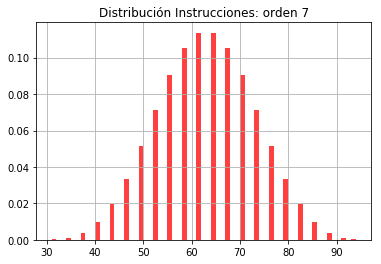

Comparaciones:
[6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 13, 14, 14, 15, 15, 16, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 13, 14, 14, 15, 15, 16, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 13, 14, 14, 15, 15, 16, 14, 15, 15, 16, 16, 17, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13,

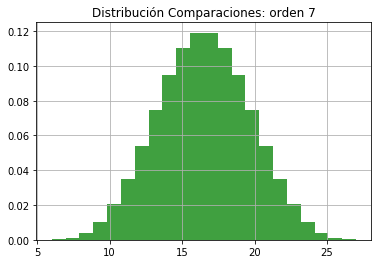

Intercambios:
[0, 1, 1, 2, 2, 3, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 

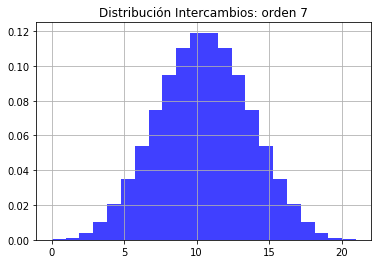

Preguntas:
[12, 14, 14, 16, 16, 18, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 26, 28, 28, 30, 30, 32, 14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 26, 28, 28, 30, 30, 32, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 26, 28, 28, 30, 30, 32, 28, 30, 30, 32, 32, 34, 16, 18, 18, 20, 20, 22, 18, 

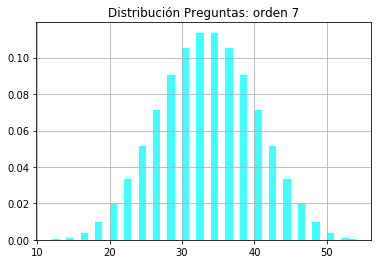

N: 8
perm:
(0, 1, 2, 3, 4, 5, 6, 7)
instrucciones: 36, comparaciones: 7, intercambios: 0, preguntas: 14
perm:
(0, 1, 2, 3, 4, 5, 7, 6)
instrucciones: 39, comparaciones: 8, intercambios: 1, preguntas: 16
perm:
(0, 1, 2, 3, 4, 6, 5, 7)
instrucciones: 39, comparaciones: 8, intercambios: 1, preguntas: 16
perm:
(0, 1, 2, 3, 4, 6, 7, 5)
instrucciones: 42, comparaciones: 9, intercambios: 2, preguntas: 18
perm:
(0, 1, 2, 3, 4, 7, 5, 6)
instrucciones: 42, comparaciones: 9, intercambios: 2, preguntas: 18
perm:
(0, 1, 2, 3, 4, 7, 6, 5)
instrucciones: 45, comparaciones: 10, intercambios: 3, preguntas: 20
perm:
(0, 1, 2, 3, 5, 4, 6, 7)
instrucciones: 39, comparaciones: 8, intercambios: 1, preguntas: 16
perm:
(0, 1, 2, 3, 5, 4, 7, 6)
instrucciones: 42, comparaciones: 9, intercambios: 2, preguntas: 18
perm:
(0, 1, 2, 3, 5, 6, 4, 7)
instrucciones: 42, comparaciones: 9, intercambios: 2, preguntas: 18
perm:
(0, 1, 2, 3, 5, 6, 7, 4)
instrucciones: 45, comparaciones: 10, intercambios: 3, preguntas: 20
per

instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(0, 1, 5, 7, 6, 4, 3, 2)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 1, 6, 2, 3, 4, 5, 7)
instrucciones: 48, comparaciones: 11, intercambios: 4, preguntas: 22
perm:
(0, 1, 6, 2, 3, 4, 7, 5)
instrucciones: 51, comparaciones: 12, intercambios: 5, preguntas: 24
perm:
(0, 1, 6, 2, 3, 5, 4, 7)
instrucciones: 51, comparaciones: 12, intercambios: 5, preguntas: 24
perm:
(0, 1, 6, 2, 3, 5, 7, 4)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(0, 1, 6, 2, 3, 7, 4, 5)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(0, 1, 6, 2, 3, 7, 5, 4)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(0, 1, 6, 2, 4, 3, 5, 7)
instrucciones: 51, comparaciones: 12, intercambios: 5, preguntas: 24
perm:
(0, 1, 6, 2, 4, 3, 7, 5)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(0, 1, 6, 2, 4, 5, 3, 7

instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(0, 2, 3, 4, 7, 1, 5, 6)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(0, 2, 3, 4, 7, 1, 6, 5)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(0, 2, 3, 4, 7, 5, 1, 6)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(0, 2, 3, 4, 7, 5, 6, 1)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(0, 2, 3, 4, 7, 6, 1, 5)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(0, 2, 3, 4, 7, 6, 5, 1)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(0, 2, 3, 5, 1, 4, 6, 7)
instrucciones: 48, comparaciones: 11, intercambios: 4, preguntas: 22
perm:
(0, 2, 3, 5, 1, 4, 7, 6)
instrucciones: 51, comparaciones: 12, intercambios: 5, preguntas: 24
perm:
(0, 2, 3, 5, 1, 6, 4, 7)
instrucciones: 51, comparaciones: 12, intercambios: 5, preguntas: 24
perm:
(0, 2, 3, 5, 1, 6, 7, 4)


instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 2, 6, 7, 4, 5, 1, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 2, 6, 7, 4, 5, 3, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 2, 6, 7, 5, 1, 3, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(0, 2, 6, 7, 5, 1, 4, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 2, 6, 7, 5, 3, 1, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 2, 6, 7, 5, 3, 4, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 2, 6, 7, 5, 4, 1, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 2, 6, 7, 5, 4, 3, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 2, 7, 1, 3, 4, 5, 6)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(0, 2, 7, 1, 3, 

instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(0, 3, 4, 5, 1, 6, 7, 2)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(0, 3, 4, 5, 1, 7, 2, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(0, 3, 4, 5, 1, 7, 6, 2)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(0, 3, 4, 5, 2, 1, 6, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(0, 3, 4, 5, 2, 1, 7, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(0, 3, 4, 5, 2, 6, 1, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(0, 3, 4, 5, 2, 6, 7, 1)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(0, 3, 4, 5, 2, 7, 1, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(0, 3, 4, 5, 2, 7, 6, 1)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(0, 3, 4, 5, 6, 1, 2, 7)

instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 3, 7, 6, 2, 4, 5, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 3, 7, 6, 2, 5, 1, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 3, 7, 6, 2, 5, 4, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 3, 7, 6, 4, 1, 2, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 3, 7, 6, 4, 1, 5, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 3, 7, 6, 4, 2, 1, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 3, 7, 6, 4, 2, 5, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 3, 7, 6, 4, 5, 1, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 3, 7, 6, 4, 5, 2, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 3, 7, 6, 5,

instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 4, 5, 6, 3, 7, 2, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 4, 5, 6, 7, 1, 2, 3)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(0, 4, 5, 6, 7, 1, 3, 2)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 4, 5, 6, 7, 2, 1, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 4, 5, 6, 7, 2, 3, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 4, 5, 6, 7, 3, 1, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 4, 5, 6, 7, 3, 2, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 4, 5, 7, 1, 2, 3, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(0, 4, 5, 7, 1, 2, 6, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(0, 4, 5, 7, 1,

instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(0, 5, 1, 7, 2, 4, 3, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(0, 5, 1, 7, 2, 4, 6, 3)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(0, 5, 1, 7, 2, 6, 3, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(0, 5, 1, 7, 2, 6, 4, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(0, 5, 1, 7, 3, 2, 4, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(0, 5, 1, 7, 3, 2, 6, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(0, 5, 1, 7, 3, 4, 2, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(0, 5, 1, 7, 3, 4, 6, 2)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(0, 5, 1, 7, 3, 6, 2, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(0, 5, 1, 7, 3, 6,

(0, 5, 6, 4, 3, 7, 1, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 5, 6, 4, 3, 7, 2, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 5, 6, 4, 7, 1, 2, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 5, 6, 4, 7, 1, 3, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 5, 6, 4, 7, 2, 1, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 5, 6, 4, 7, 2, 3, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 5, 6, 4, 7, 3, 1, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 5, 6, 4, 7, 3, 2, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(0, 5, 6, 7, 1, 2, 3, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(0, 5, 6, 7, 1, 2, 4, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas:

instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(0, 6, 2, 5, 7, 1, 4, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 6, 2, 5, 7, 3, 1, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 6, 2, 5, 7, 3, 4, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 6, 2, 5, 7, 4, 1, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 6, 2, 5, 7, 4, 3, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 6, 2, 7, 1, 3, 4, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(0, 6, 2, 7, 1, 3, 5, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(0, 6, 2, 7, 1, 4, 3, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(0, 6, 2, 7, 1, 4, 5, 3)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(0, 6, 2, 7, 1,

instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 6, 5, 7, 1, 3, 4, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 6, 5, 7, 1, 4, 2, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 6, 5, 7, 1, 4, 3, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 6, 5, 7, 2, 1, 3, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 6, 5, 7, 2, 1, 4, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 6, 5, 7, 2, 3, 1, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 6, 5, 7, 2, 3, 4, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 6, 5, 7, 2, 4, 1, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 6, 5, 7, 2, 4, 3, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(0, 6, 5, 7, 3,

instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 7, 3, 5, 1, 6, 4, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 7, 3, 5, 2, 1, 4, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(0, 7, 3, 5, 2, 1, 6, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 7, 3, 5, 2, 4, 1, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 7, 3, 5, 2, 4, 6, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 7, 3, 5, 2, 6, 1, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 7, 3, 5, 2, 6, 4, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 7, 3, 5, 4, 1, 2, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(0, 7, 3, 5, 4, 1, 6, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(0, 7, 3, 5, 4,

perm:
(0, 7, 6, 3, 2, 4, 5, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 7, 6, 3, 2, 5, 1, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 7, 6, 3, 2, 5, 4, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(0, 7, 6, 3, 4, 1, 2, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(0, 7, 6, 3, 4, 1, 5, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 7, 6, 3, 4, 2, 1, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(0, 7, 6, 3, 4, 2, 5, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(0, 7, 6, 3, 4, 5, 1, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(0, 7, 6, 3, 4, 5, 2, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(0, 7, 6, 3, 5, 1, 2, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preg

perm:
(1, 0, 5, 3, 4, 7, 2, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 0, 5, 3, 4, 7, 6, 2)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 0, 5, 3, 6, 2, 4, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(1, 0, 5, 3, 6, 2, 7, 4)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 0, 5, 3, 6, 4, 2, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 0, 5, 3, 6, 4, 7, 2)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 0, 5, 3, 6, 7, 2, 4)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 0, 5, 3, 6, 7, 4, 2)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(1, 0, 5, 3, 7, 2, 4, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 0, 5, 3, 7, 2, 6, 4)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32

perm:
(1, 2, 0, 5, 3, 6, 4, 7)
instrucciones: 51, comparaciones: 12, intercambios: 5, preguntas: 24
perm:
(1, 2, 0, 5, 3, 6, 7, 4)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(1, 2, 0, 5, 3, 7, 4, 6)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(1, 2, 0, 5, 3, 7, 6, 4)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(1, 2, 0, 5, 4, 3, 6, 7)
instrucciones: 51, comparaciones: 12, intercambios: 5, preguntas: 24
perm:
(1, 2, 0, 5, 4, 3, 7, 6)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(1, 2, 0, 5, 4, 6, 3, 7)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(1, 2, 0, 5, 4, 6, 7, 3)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(1, 2, 0, 5, 4, 7, 3, 6)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(1, 2, 0, 5, 4, 7, 6, 3)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30


instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(1, 2, 5, 7, 3, 4, 0, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(1, 2, 5, 7, 3, 4, 6, 0)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 2, 5, 7, 3, 6, 0, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 2, 5, 7, 3, 6, 4, 0)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 2, 5, 7, 4, 0, 3, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(1, 2, 5, 7, 4, 0, 6, 3)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 2, 5, 7, 4, 3, 0, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 2, 5, 7, 4, 3, 6, 0)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 2, 5, 7, 4, 6, 0, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 2, 5, 7, 4,

instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 3, 2, 4, 5, 7, 6, 0)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 3, 2, 4, 6, 0, 5, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(1, 3, 2, 4, 6, 0, 7, 5)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 3, 2, 4, 6, 5, 0, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 3, 2, 4, 6, 5, 7, 0)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 3, 2, 4, 6, 7, 0, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 3, 2, 4, 6, 7, 5, 0)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(1, 3, 2, 4, 7, 0, 5, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 3, 2, 4, 7, 0, 6, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 3, 2, 4, 7, 5, 0, 6)

perm:
(1, 3, 6, 0, 5, 7, 2, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(1, 3, 6, 0, 5, 7, 4, 2)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 3, 6, 0, 7, 2, 4, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(1, 3, 6, 0, 7, 2, 5, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(1, 3, 6, 0, 7, 4, 2, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(1, 3, 6, 0, 7, 4, 5, 2)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 3, 6, 0, 7, 5, 2, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 3, 6, 0, 7, 5, 4, 2)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 3, 6, 2, 0, 4, 5, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 3, 6, 2, 0, 4, 7, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, pregun

instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 4, 2, 7, 5, 3, 0, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 4, 2, 7, 5, 3, 6, 0)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 4, 2, 7, 5, 6, 0, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 4, 2, 7, 5, 6, 3, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 4, 2, 7, 6, 0, 3, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 4, 2, 7, 6, 0, 5, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 4, 2, 7, 6, 3, 0, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 4, 2, 7, 6, 3, 5, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 4, 2, 7, 6, 5, 0, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 4, 2, 7, 6,

perm:
(1, 4, 6, 5, 7, 2, 0, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(1, 4, 6, 5, 7, 2, 3, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(1, 4, 6, 5, 7, 3, 0, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(1, 4, 6, 5, 7, 3, 2, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(1, 4, 6, 7, 0, 2, 3, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 4, 6, 7, 0, 2, 5, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 4, 6, 7, 0, 3, 2, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 4, 6, 7, 0, 3, 5, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 4, 6, 7, 0, 5, 2, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 4, 6, 7, 0, 5, 3, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preg

(1, 5, 2, 7, 3, 0, 4, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(1, 5, 2, 7, 3, 0, 6, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 5, 2, 7, 3, 4, 0, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 5, 2, 7, 3, 4, 6, 0)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 5, 2, 7, 3, 6, 0, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 5, 2, 7, 3, 6, 4, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 5, 2, 7, 4, 0, 3, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 5, 2, 7, 4, 0, 6, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 5, 2, 7, 4, 3, 0, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 5, 2, 7, 4, 3, 6, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas:

(1, 5, 7, 0, 6, 2, 4, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 5, 7, 0, 6, 3, 2, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 5, 7, 0, 6, 3, 4, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(1, 5, 7, 0, 6, 4, 2, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(1, 5, 7, 0, 6, 4, 3, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(1, 5, 7, 2, 0, 3, 4, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(1, 5, 7, 2, 0, 3, 6, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 5, 7, 2, 0, 4, 3, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 5, 7, 2, 0, 4, 6, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 5, 7, 2, 0, 6, 3, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas:

(1, 6, 3, 5, 7, 4, 2, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(1, 6, 3, 7, 0, 2, 4, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(1, 6, 3, 7, 0, 2, 5, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 6, 3, 7, 0, 4, 2, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 6, 3, 7, 0, 4, 5, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 6, 3, 7, 0, 5, 2, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 6, 3, 7, 0, 5, 4, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(1, 6, 3, 7, 2, 0, 4, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(1, 6, 3, 7, 2, 0, 5, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 6, 3, 7, 2, 4, 0, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas:

perm:
(1, 7, 0, 2, 3, 4, 5, 6)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(1, 7, 0, 2, 3, 4, 6, 5)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 7, 0, 2, 3, 5, 4, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 7, 0, 2, 3, 5, 6, 4)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 7, 0, 2, 3, 6, 4, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 7, 0, 2, 3, 6, 5, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(1, 7, 0, 2, 4, 3, 5, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(1, 7, 0, 2, 4, 3, 6, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 7, 0, 2, 4, 5, 3, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(1, 7, 0, 2, 4, 5, 6, 3)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 3

(1, 7, 4, 5, 3, 6, 0, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(1, 7, 4, 5, 3, 6, 2, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(1, 7, 4, 5, 6, 0, 2, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(1, 7, 4, 5, 6, 0, 3, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(1, 7, 4, 5, 6, 2, 0, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(1, 7, 4, 5, 6, 2, 3, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(1, 7, 4, 5, 6, 3, 0, 2)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(1, 7, 4, 5, 6, 3, 2, 0)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(1, 7, 4, 6, 0, 2, 3, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(1, 7, 4, 6, 0, 2, 5, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas:

instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(2, 0, 3, 5, 1, 7, 6, 4)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 0, 3, 5, 4, 1, 6, 7)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(2, 0, 3, 5, 4, 1, 7, 6)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(2, 0, 3, 5, 4, 6, 1, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(2, 0, 3, 5, 4, 6, 7, 1)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 0, 3, 5, 4, 7, 1, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 0, 3, 5, 4, 7, 6, 1)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 0, 3, 5, 6, 1, 4, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(2, 0, 3, 5, 6, 1, 7, 4)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 0, 3, 5, 6, 4, 1, 7)


(2, 0, 6, 5, 3, 4, 7, 1)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 0, 6, 5, 3, 7, 1, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 0, 6, 5, 3, 7, 4, 1)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 0, 6, 5, 4, 1, 3, 7)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(2, 0, 6, 5, 4, 1, 7, 3)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 0, 6, 5, 4, 3, 1, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 0, 6, 5, 4, 3, 7, 1)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 0, 6, 5, 4, 7, 1, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 0, 6, 5, 4, 7, 3, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 0, 6, 5, 7, 1, 3, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas:

perm:
(2, 1, 4, 3, 5, 0, 6, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(2, 1, 4, 3, 5, 0, 7, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 1, 4, 3, 5, 6, 0, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 1, 4, 3, 5, 6, 7, 0)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 1, 4, 3, 5, 7, 0, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 1, 4, 3, 5, 7, 6, 0)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 1, 4, 3, 6, 0, 5, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 1, 4, 3, 6, 0, 7, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 1, 4, 3, 6, 5, 0, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 1, 4, 3, 6, 5, 7, 0)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 3

(2, 1, 7, 5, 0, 4, 3, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 1, 7, 5, 0, 4, 6, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 1, 7, 5, 0, 6, 3, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 1, 7, 5, 0, 6, 4, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 1, 7, 5, 3, 0, 4, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 1, 7, 5, 3, 0, 6, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 1, 7, 5, 3, 4, 0, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 1, 7, 5, 3, 4, 6, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 1, 7, 5, 3, 6, 0, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 1, 7, 5, 3, 6, 4, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas:

(2, 3, 5, 0, 1, 6, 4, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 3, 5, 0, 1, 6, 7, 4)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 3, 5, 0, 1, 7, 4, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 3, 5, 0, 1, 7, 6, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 3, 5, 0, 4, 1, 6, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 3, 5, 0, 4, 1, 7, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 3, 5, 0, 4, 6, 1, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 3, 5, 0, 4, 6, 7, 1)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 3, 5, 0, 4, 7, 1, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 3, 5, 0, 4, 7, 6, 1)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
pe

(2, 4, 0, 5, 7, 1, 6, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(2, 4, 0, 5, 7, 3, 1, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(2, 4, 0, 5, 7, 3, 6, 1)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 4, 0, 5, 7, 6, 1, 3)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 4, 0, 5, 7, 6, 3, 1)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 4, 0, 6, 1, 3, 5, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(2, 4, 0, 6, 1, 3, 7, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 4, 0, 6, 1, 5, 3, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 4, 0, 6, 1, 5, 7, 3)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 4, 0, 6, 1, 7, 3, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34

(2, 4, 5, 1, 6, 7, 0, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 4, 5, 1, 6, 7, 3, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 4, 5, 1, 7, 0, 3, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 4, 5, 1, 7, 0, 6, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 4, 5, 1, 7, 3, 0, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 4, 5, 1, 7, 3, 6, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 4, 5, 1, 7, 6, 0, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 4, 5, 1, 7, 6, 3, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 4, 5, 3, 0, 1, 6, 7)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 4, 5, 3, 0, 1, 7, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas:

instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 5, 0, 1, 6, 4, 3, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 5, 0, 1, 6, 4, 7, 3)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 5, 0, 1, 6, 7, 3, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 5, 0, 1, 6, 7, 4, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(2, 5, 0, 1, 7, 3, 4, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(2, 5, 0, 1, 7, 3, 6, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 5, 0, 1, 7, 4, 3, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(2, 5, 0, 1, 7, 4, 6, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(2, 5, 0, 1, 7, 6, 3, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(2, 5, 0, 1, 7, 6,

instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 5, 4, 3, 6, 0, 1, 7)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 5, 4, 3, 6, 0, 7, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 5, 4, 3, 6, 1, 0, 7)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 5, 4, 3, 6, 1, 7, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 5, 4, 3, 6, 7, 0, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 5, 4, 3, 6, 7, 1, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(2, 5, 4, 3, 7, 0, 1, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 5, 4, 3, 7, 0, 6, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 5, 4, 3, 7, 1, 0, 6)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 5, 4, 3, 7,

instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 6, 0, 5, 7, 1, 4, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 6, 0, 5, 7, 3, 1, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 6, 0, 5, 7, 3, 4, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 6, 0, 5, 7, 4, 1, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 6, 0, 5, 7, 4, 3, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(2, 6, 0, 7, 1, 3, 4, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(2, 6, 0, 7, 1, 3, 5, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 6, 0, 7, 1, 4, 3, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 6, 0, 7, 1, 4, 5, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 6, 0, 7, 1,

instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(2, 6, 4, 7, 0, 5, 1, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(2, 6, 4, 7, 0, 5, 3, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(2, 6, 4, 7, 1, 0, 3, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 6, 4, 7, 1, 0, 5, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(2, 6, 4, 7, 1, 3, 0, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(2, 6, 4, 7, 1, 3, 5, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(2, 6, 4, 7, 1, 5, 0, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(2, 6, 4, 7, 1, 5, 3, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(2, 6, 4, 7, 3, 0, 1, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(2, 6, 4, 7, 3,

perm:
(2, 7, 1, 0, 4, 6, 3, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 7, 1, 0, 4, 6, 5, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 7, 1, 0, 5, 3, 4, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(2, 7, 1, 0, 5, 3, 6, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 7, 1, 0, 5, 4, 3, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 7, 1, 0, 5, 4, 6, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 7, 1, 0, 5, 6, 3, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(2, 7, 1, 0, 5, 6, 4, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 7, 1, 0, 6, 3, 4, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(2, 7, 1, 0, 6, 3, 5, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preg

perm:
(2, 7, 5, 1, 0, 3, 6, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 7, 5, 1, 0, 4, 3, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 7, 5, 1, 0, 4, 6, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 7, 5, 1, 0, 6, 3, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 7, 5, 1, 0, 6, 4, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(2, 7, 5, 1, 3, 0, 4, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(2, 7, 5, 1, 3, 0, 6, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 7, 5, 1, 3, 4, 0, 6)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(2, 7, 5, 1, 3, 4, 6, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(2, 7, 5, 1, 3, 6, 0, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preg

perm:
(3, 0, 2, 5, 7, 1, 4, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(3, 0, 2, 5, 7, 1, 6, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 0, 2, 5, 7, 4, 1, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 0, 2, 5, 7, 4, 6, 1)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 0, 2, 5, 7, 6, 1, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 0, 2, 5, 7, 6, 4, 1)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 0, 2, 6, 1, 4, 5, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(3, 0, 2, 6, 1, 4, 7, 5)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(3, 0, 2, 6, 1, 5, 4, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(3, 0, 2, 6, 1, 5, 7, 4)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas

perm:
(3, 0, 7, 2, 1, 4, 6, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 0, 7, 2, 1, 5, 4, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 0, 7, 2, 1, 5, 6, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 0, 7, 2, 1, 6, 4, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 0, 7, 2, 1, 6, 5, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 0, 7, 2, 4, 1, 5, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 0, 7, 2, 4, 1, 6, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 0, 7, 2, 4, 5, 1, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 0, 7, 2, 4, 5, 6, 1)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 0, 7, 2, 4, 6, 1, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preg

perm:
(3, 1, 4, 5, 2, 7, 6, 0)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 1, 4, 5, 6, 0, 2, 7)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 1, 4, 5, 6, 0, 7, 2)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 1, 4, 5, 6, 2, 0, 7)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 1, 4, 5, 6, 2, 7, 0)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 1, 4, 5, 6, 7, 0, 2)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 1, 4, 5, 6, 7, 2, 0)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(3, 1, 4, 5, 7, 0, 2, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 1, 4, 5, 7, 0, 6, 2)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 1, 4, 5, 7, 2, 0, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preg

perm:
(3, 1, 7, 2, 6, 4, 0, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(3, 1, 7, 2, 6, 4, 5, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 1, 7, 2, 6, 5, 0, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 1, 7, 2, 6, 5, 4, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 1, 7, 4, 0, 2, 5, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 1, 7, 4, 0, 2, 6, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 1, 7, 4, 0, 5, 2, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 1, 7, 4, 0, 5, 6, 2)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(3, 1, 7, 4, 0, 6, 2, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(3, 1, 7, 4, 0, 6, 5, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preg

perm:
(3, 2, 5, 0, 1, 4, 7, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(3, 2, 5, 0, 1, 6, 4, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(3, 2, 5, 0, 1, 6, 7, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 2, 5, 0, 1, 7, 4, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 2, 5, 0, 1, 7, 6, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 2, 5, 0, 4, 1, 6, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(3, 2, 5, 0, 4, 1, 7, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 2, 5, 0, 4, 6, 1, 7)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 2, 5, 0, 4, 6, 7, 1)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 2, 5, 0, 4, 7, 1, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, pregunt

perm:
(3, 4, 0, 2, 1, 5, 7, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(3, 4, 0, 2, 1, 6, 5, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(3, 4, 0, 2, 1, 6, 7, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(3, 4, 0, 2, 1, 7, 5, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(3, 4, 0, 2, 1, 7, 6, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 4, 0, 2, 5, 1, 6, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(3, 4, 0, 2, 5, 1, 7, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(3, 4, 0, 2, 5, 6, 1, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(3, 4, 0, 2, 5, 6, 7, 1)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 4, 0, 2, 5, 7, 1, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 

perm:
(3, 4, 5, 6, 7, 1, 2, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(3, 4, 5, 6, 7, 2, 0, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(3, 4, 5, 6, 7, 2, 1, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(3, 4, 5, 7, 0, 1, 2, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(3, 4, 5, 7, 0, 1, 6, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(3, 4, 5, 7, 0, 2, 1, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(3, 4, 5, 7, 0, 2, 6, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 4, 5, 7, 0, 6, 1, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 4, 5, 7, 0, 6, 2, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 4, 5, 7, 1, 0, 2, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preg

instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 5, 0, 7, 4, 6, 1, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 5, 0, 7, 4, 6, 2, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 5, 0, 7, 6, 1, 2, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(3, 5, 0, 7, 6, 1, 4, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 5, 0, 7, 6, 2, 1, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 5, 0, 7, 6, 2, 4, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 5, 0, 7, 6, 4, 1, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 5, 0, 7, 6, 4, 2, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(3, 5, 1, 0, 2, 4, 6, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(3, 5, 1, 0, 2, 

(3, 5, 4, 7, 2, 1, 6, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(3, 5, 4, 7, 2, 6, 0, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(3, 5, 4, 7, 2, 6, 1, 0)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(3, 5, 4, 7, 6, 0, 1, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(3, 5, 4, 7, 6, 0, 2, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(3, 5, 4, 7, 6, 1, 0, 2)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(3, 5, 4, 7, 6, 1, 2, 0)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(3, 5, 4, 7, 6, 2, 0, 1)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(3, 5, 4, 7, 6, 2, 1, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(3, 5, 6, 0, 1, 2, 4, 7)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas:

perm:
(3, 6, 0, 7, 5, 4, 2, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(3, 6, 1, 0, 2, 4, 5, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(3, 6, 1, 0, 2, 4, 7, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 6, 1, 0, 2, 5, 4, 7)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 6, 1, 0, 2, 5, 7, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 6, 1, 0, 2, 7, 4, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 6, 1, 0, 2, 7, 5, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(3, 6, 1, 0, 4, 2, 5, 7)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(3, 6, 1, 0, 4, 2, 7, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(3, 6, 1, 0, 4, 5, 2, 7)
instrucciones: 69, comparaciones: 18, intercambios: 11, pregu

perm:
(3, 6, 5, 0, 2, 4, 7, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 6, 5, 0, 2, 7, 1, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 6, 5, 0, 2, 7, 4, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 6, 5, 0, 4, 1, 2, 7)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(3, 6, 5, 0, 4, 1, 7, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 6, 5, 0, 4, 2, 1, 7)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 6, 5, 0, 4, 2, 7, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 6, 5, 0, 4, 7, 1, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 6, 5, 0, 4, 7, 2, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(3, 6, 5, 0, 7, 1, 2, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preg

(3, 7, 1, 2, 5, 0, 4, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(3, 7, 1, 2, 5, 0, 6, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(3, 7, 1, 2, 5, 4, 0, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(3, 7, 1, 2, 5, 4, 6, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 7, 1, 2, 5, 6, 0, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 7, 1, 2, 5, 6, 4, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 7, 1, 2, 6, 0, 4, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(3, 7, 1, 2, 6, 0, 5, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 7, 1, 2, 6, 4, 0, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 7, 1, 2, 6, 4, 5, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas:

perm:
(3, 7, 5, 1, 6, 2, 4, 0)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(3, 7, 5, 1, 6, 4, 0, 2)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(3, 7, 5, 1, 6, 4, 2, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(3, 7, 5, 2, 0, 1, 4, 6)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(3, 7, 5, 2, 0, 1, 6, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 7, 5, 2, 0, 4, 1, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(3, 7, 5, 2, 0, 4, 6, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(3, 7, 5, 2, 0, 6, 1, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(3, 7, 5, 2, 0, 6, 4, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(3, 7, 5, 2, 1, 0, 4, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preg

instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(4, 0, 2, 3, 1, 5, 6, 7)
instrucciones: 54, comparaciones: 13, intercambios: 6, preguntas: 26
perm:
(4, 0, 2, 3, 1, 5, 7, 6)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(4, 0, 2, 3, 1, 6, 5, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(4, 0, 2, 3, 1, 6, 7, 5)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(4, 0, 2, 3, 1, 7, 5, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(4, 0, 2, 3, 1, 7, 6, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(4, 0, 2, 3, 5, 1, 6, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(4, 0, 2, 3, 5, 1, 7, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(4, 0, 2, 3, 5, 6, 1, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(4, 0, 2, 3, 5, 6, 7, 1)

perm:
(4, 0, 5, 7, 6, 2, 3, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 0, 5, 7, 6, 3, 1, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 0, 5, 7, 6, 3, 2, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 0, 6, 1, 2, 3, 5, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(4, 0, 6, 1, 2, 3, 7, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(4, 0, 6, 1, 2, 5, 3, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(4, 0, 6, 1, 2, 5, 7, 3)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(4, 0, 6, 1, 2, 7, 3, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(4, 0, 6, 1, 2, 7, 5, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(4, 0, 6, 1, 3, 2, 5, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, pregunta

perm:
(4, 1, 2, 0, 6, 5, 3, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(4, 1, 2, 0, 6, 5, 7, 3)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(4, 1, 2, 0, 6, 7, 3, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(4, 1, 2, 0, 6, 7, 5, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(4, 1, 2, 0, 7, 3, 5, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(4, 1, 2, 0, 7, 3, 6, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(4, 1, 2, 0, 7, 5, 3, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(4, 1, 2, 0, 7, 5, 6, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(4, 1, 2, 0, 7, 6, 3, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(4, 1, 2, 0, 7, 6, 5, 3)
instrucciones: 72, comparaciones: 19, intercambios: 12, pregun

instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 1, 6, 5, 7, 2, 0, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 1, 6, 5, 7, 2, 3, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 1, 6, 5, 7, 3, 0, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 1, 6, 5, 7, 3, 2, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 1, 6, 7, 0, 2, 3, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 1, 6, 7, 0, 2, 5, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 1, 6, 7, 0, 3, 2, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 1, 6, 7, 0, 3, 5, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 1, 6, 7, 0, 5, 2, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 1, 6, 7, 0,

perm:
(4, 2, 1, 6, 3, 7, 5, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 2, 1, 6, 5, 0, 3, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(4, 2, 1, 6, 5, 0, 7, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 2, 1, 6, 5, 3, 0, 7)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 2, 1, 6, 5, 3, 7, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 2, 1, 6, 5, 7, 0, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 2, 1, 6, 5, 7, 3, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 2, 1, 6, 7, 0, 3, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 2, 1, 6, 7, 0, 5, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 2, 1, 6, 7, 3, 0, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preg

instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 2, 6, 7, 1, 0, 3, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 2, 6, 7, 1, 0, 5, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 2, 6, 7, 1, 3, 0, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 2, 6, 7, 1, 3, 5, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 2, 6, 7, 1, 5, 0, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 2, 6, 7, 1, 5, 3, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 2, 6, 7, 3, 0, 1, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 2, 6, 7, 3, 0, 5, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 2, 6, 7, 3, 1, 0, 5)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 2, 6, 7, 3,

perm:
(4, 3, 1, 7, 0, 2, 6, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 3, 1, 7, 0, 5, 2, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 3, 1, 7, 0, 5, 6, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 3, 1, 7, 0, 6, 2, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 3, 1, 7, 0, 6, 5, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 3, 1, 7, 2, 0, 5, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 3, 1, 7, 2, 0, 6, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 3, 1, 7, 2, 5, 0, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 3, 1, 7, 2, 5, 6, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 3, 1, 7, 2, 6, 0, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preg

perm:
(4, 3, 6, 5, 1, 0, 7, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 3, 6, 5, 1, 2, 0, 7)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 3, 6, 5, 1, 2, 7, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 3, 6, 5, 1, 7, 0, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 3, 6, 5, 1, 7, 2, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 3, 6, 5, 2, 0, 1, 7)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 3, 6, 5, 2, 0, 7, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 3, 6, 5, 2, 1, 0, 7)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 3, 6, 5, 2, 1, 7, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 3, 6, 5, 2, 7, 0, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preg

instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 5, 0, 7, 1, 2, 3, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(4, 5, 0, 7, 1, 2, 6, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 5, 0, 7, 1, 3, 2, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 5, 0, 7, 1, 3, 6, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 5, 0, 7, 1, 6, 2, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 5, 0, 7, 1, 6, 3, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 5, 0, 7, 2, 1, 3, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 5, 0, 7, 2, 1, 6, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 5, 0, 7, 2, 3, 1, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 5, 0, 7, 2,

perm:
(4, 5, 6, 2, 1, 0, 3, 7)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 5, 6, 2, 1, 0, 7, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 5, 6, 2, 1, 3, 0, 7)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 5, 6, 2, 1, 3, 7, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 5, 6, 2, 1, 7, 0, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 5, 6, 2, 1, 7, 3, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 5, 6, 2, 3, 0, 1, 7)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 5, 6, 2, 3, 0, 7, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 5, 6, 2, 3, 1, 0, 7)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 5, 6, 2, 3, 1, 7, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preg

perm:
(4, 6, 1, 3, 0, 7, 2, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 6, 1, 3, 0, 7, 5, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 6, 1, 3, 2, 0, 5, 7)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(4, 6, 1, 3, 2, 0, 7, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 6, 1, 3, 2, 5, 0, 7)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 6, 1, 3, 2, 5, 7, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 6, 1, 3, 2, 7, 0, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 6, 1, 3, 2, 7, 5, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 6, 1, 3, 5, 0, 2, 7)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 6, 1, 3, 5, 0, 7, 2)
instrucciones: 81, comparaciones: 22, intercambios: 15, preg

perm:
(4, 6, 5, 2, 3, 1, 0, 7)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 6, 5, 2, 3, 1, 7, 0)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(4, 6, 5, 2, 3, 7, 0, 1)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(4, 6, 5, 2, 3, 7, 1, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(4, 6, 5, 2, 7, 0, 1, 3)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 6, 5, 2, 7, 0, 3, 1)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(4, 6, 5, 2, 7, 1, 0, 3)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(4, 6, 5, 2, 7, 1, 3, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(4, 6, 5, 2, 7, 3, 0, 1)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(4, 6, 5, 2, 7, 3, 1, 0)
instrucciones: 99, comparaciones: 28, intercambios: 21, preg

perm:
(4, 7, 1, 2, 3, 6, 5, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 7, 1, 2, 5, 0, 3, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(4, 7, 1, 2, 5, 0, 6, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 7, 1, 2, 5, 3, 0, 6)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 7, 1, 2, 5, 3, 6, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 7, 1, 2, 5, 6, 0, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 7, 1, 2, 5, 6, 3, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 7, 1, 2, 6, 0, 3, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(4, 7, 1, 2, 6, 0, 5, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 7, 1, 2, 6, 3, 0, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preg

(4, 7, 5, 0, 2, 3, 1, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 7, 5, 0, 2, 3, 6, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 7, 5, 0, 2, 6, 1, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 7, 5, 0, 2, 6, 3, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 7, 5, 0, 3, 1, 2, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(4, 7, 5, 0, 3, 1, 6, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 7, 5, 0, 3, 2, 1, 6)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(4, 7, 5, 0, 3, 2, 6, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 7, 5, 0, 3, 6, 1, 2)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(4, 7, 5, 0, 3, 6, 2, 1)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas:

perm:
(5, 0, 2, 1, 6, 7, 4, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(5, 0, 2, 1, 7, 3, 4, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(5, 0, 2, 1, 7, 3, 6, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(5, 0, 2, 1, 7, 4, 3, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(5, 0, 2, 1, 7, 4, 6, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(5, 0, 2, 1, 7, 6, 3, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(5, 0, 2, 1, 7, 6, 4, 3)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 0, 2, 3, 1, 4, 6, 7)
instrucciones: 57, comparaciones: 14, intercambios: 7, preguntas: 28
perm:
(5, 0, 2, 3, 1, 4, 7, 6)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(5, 0, 2, 3, 1, 6, 4, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, pregunta

instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 0, 6, 2, 1, 7, 3, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 0, 6, 2, 1, 7, 4, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 0, 6, 2, 3, 1, 4, 7)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(5, 0, 6, 2, 3, 1, 7, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 0, 6, 2, 3, 4, 1, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 0, 6, 2, 3, 4, 7, 1)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 0, 6, 2, 3, 7, 1, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 0, 6, 2, 3, 7, 4, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(5, 0, 6, 2, 4, 1, 3, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 0, 6, 2, 4,

perm:
(5, 1, 2, 0, 3, 7, 6, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(5, 1, 2, 0, 4, 3, 6, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(5, 1, 2, 0, 4, 3, 7, 6)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(5, 1, 2, 0, 4, 6, 3, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(5, 1, 2, 0, 4, 6, 7, 3)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(5, 1, 2, 0, 4, 7, 3, 6)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(5, 1, 2, 0, 4, 7, 6, 3)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(5, 1, 2, 0, 6, 3, 4, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(5, 1, 2, 0, 6, 3, 7, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(5, 1, 2, 0, 6, 4, 3, 7)
instrucciones: 66, comparaciones: 17, intercambios: 10, pregunta

(5, 1, 6, 3, 4, 2, 0, 7)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(5, 1, 6, 3, 4, 2, 7, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 1, 6, 3, 4, 7, 0, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 1, 6, 3, 4, 7, 2, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 1, 6, 3, 7, 0, 2, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(5, 1, 6, 3, 7, 0, 4, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 1, 6, 3, 7, 2, 0, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 1, 6, 3, 7, 2, 4, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 1, 6, 3, 7, 4, 0, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 1, 6, 3, 7, 4, 2, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas:

instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 2, 1, 3, 6, 7, 4, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(5, 2, 1, 3, 7, 0, 4, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 2, 1, 3, 7, 0, 6, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 2, 1, 3, 7, 4, 0, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 2, 1, 3, 7, 4, 6, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(5, 2, 1, 3, 7, 6, 0, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(5, 2, 1, 3, 7, 6, 4, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(5, 2, 1, 4, 0, 3, 6, 7)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(5, 2, 1, 4, 0, 3, 7, 6)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(5, 2, 1, 4, 0,

perm:
(5, 2, 6, 0, 7, 1, 3, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(5, 2, 6, 0, 7, 1, 4, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(5, 2, 6, 0, 7, 3, 1, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(5, 2, 6, 0, 7, 3, 4, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 2, 6, 0, 7, 4, 1, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 2, 6, 0, 7, 4, 3, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 2, 6, 1, 0, 3, 4, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 2, 6, 1, 0, 3, 7, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 2, 6, 1, 0, 4, 3, 7)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 2, 6, 1, 0, 4, 7, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preg

instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 3, 1, 2, 4, 0, 6, 7)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(5, 3, 1, 2, 4, 0, 7, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 3, 1, 2, 4, 6, 0, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 3, 1, 2, 4, 6, 7, 0)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 3, 1, 2, 4, 7, 0, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 3, 1, 2, 4, 7, 6, 0)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(5, 3, 1, 2, 6, 0, 4, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(5, 3, 1, 2, 6, 0, 7, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 3, 1, 2, 6, 4, 0, 7)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(5, 3, 1, 2, 6,

perm:
(5, 3, 6, 4, 2, 0, 1, 7)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 3, 6, 4, 2, 0, 7, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 3, 6, 4, 2, 1, 0, 7)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 3, 6, 4, 2, 1, 7, 0)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(5, 3, 6, 4, 2, 7, 0, 1)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(5, 3, 6, 4, 2, 7, 1, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(5, 3, 6, 4, 7, 0, 1, 2)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 3, 6, 4, 7, 0, 2, 1)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(5, 3, 6, 4, 7, 1, 0, 2)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(5, 3, 6, 4, 7, 1, 2, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preg

perm:
(5, 4, 1, 7, 0, 6, 2, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 4, 1, 7, 0, 6, 3, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 4, 1, 7, 2, 0, 3, 6)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(5, 4, 1, 7, 2, 0, 6, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 4, 1, 7, 2, 3, 0, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 4, 1, 7, 2, 3, 6, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 4, 1, 7, 2, 6, 0, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 4, 1, 7, 2, 6, 3, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 4, 1, 7, 3, 0, 2, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 4, 1, 7, 3, 0, 6, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preg

perm:
(5, 4, 7, 1, 0, 3, 2, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 4, 7, 1, 0, 3, 6, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 4, 7, 1, 0, 6, 2, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 4, 7, 1, 0, 6, 3, 2)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 4, 7, 1, 2, 0, 3, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 4, 7, 1, 2, 0, 6, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 4, 7, 1, 2, 3, 0, 6)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 4, 7, 1, 2, 3, 6, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 4, 7, 1, 2, 6, 0, 3)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 4, 7, 1, 2, 6, 3, 0)
instrucciones: 93, comparaciones: 26, intercambios: 19, preg

perm:
(5, 6, 2, 4, 7, 1, 3, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(5, 6, 2, 4, 7, 3, 0, 1)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(5, 6, 2, 4, 7, 3, 1, 0)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(5, 6, 2, 7, 0, 1, 3, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 6, 2, 7, 0, 1, 4, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 6, 2, 7, 0, 3, 1, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 6, 2, 7, 0, 3, 4, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 6, 2, 7, 0, 4, 1, 3)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 6, 2, 7, 0, 4, 3, 1)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(5, 6, 2, 7, 1, 0, 3, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preg

perm:
(5, 7, 0, 2, 4, 1, 6, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(5, 7, 0, 2, 4, 3, 1, 6)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(5, 7, 0, 2, 4, 3, 6, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 7, 0, 2, 4, 6, 1, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 7, 0, 2, 4, 6, 3, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 7, 0, 2, 6, 1, 3, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(5, 7, 0, 2, 6, 1, 4, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 7, 0, 2, 6, 3, 1, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 7, 0, 2, 6, 3, 4, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 7, 0, 2, 6, 4, 1, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preg

instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 7, 3, 1, 0, 4, 6, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 7, 3, 1, 0, 6, 2, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 7, 3, 1, 0, 6, 4, 2)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 7, 3, 1, 2, 0, 4, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(5, 7, 3, 1, 2, 0, 6, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 7, 3, 1, 2, 4, 0, 6)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(5, 7, 3, 1, 2, 4, 6, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 7, 3, 1, 2, 6, 0, 4)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(5, 7, 3, 1, 2, 6, 4, 0)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(5, 7, 3, 1, 4,

instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(6, 0, 1, 3, 2, 7, 4, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(6, 0, 1, 3, 2, 7, 5, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(6, 0, 1, 3, 4, 2, 5, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(6, 0, 1, 3, 4, 2, 7, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(6, 0, 1, 3, 4, 5, 2, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(6, 0, 1, 3, 4, 5, 7, 2)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(6, 0, 1, 3, 4, 7, 2, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(6, 0, 1, 3, 4, 7, 5, 2)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(6, 0, 1, 3, 5, 2, 4, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(6, 0, 1, 3, 5, 2, 7,

(6, 0, 4, 2, 3, 5, 1, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(6, 0, 4, 2, 3, 5, 7, 1)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(6, 0, 4, 2, 3, 7, 1, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(6, 0, 4, 2, 3, 7, 5, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(6, 0, 4, 2, 5, 1, 3, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(6, 0, 4, 2, 5, 1, 7, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(6, 0, 4, 2, 5, 3, 1, 7)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(6, 0, 4, 2, 5, 3, 7, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(6, 0, 4, 2, 5, 7, 1, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(6, 0, 4, 2, 5, 7, 3, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas:

(6, 1, 0, 7, 5, 3, 4, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 1, 0, 7, 5, 4, 2, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 1, 0, 7, 5, 4, 3, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 1, 2, 0, 3, 4, 5, 7)
instrucciones: 60, comparaciones: 15, intercambios: 8, preguntas: 30
perm:
(6, 1, 2, 0, 3, 4, 7, 5)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(6, 1, 2, 0, 3, 5, 4, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(6, 1, 2, 0, 3, 5, 7, 4)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(6, 1, 2, 0, 3, 7, 4, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(6, 1, 2, 0, 3, 7, 5, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(6, 1, 2, 0, 4, 3, 5, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32


(6, 1, 5, 0, 7, 2, 4, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(6, 1, 5, 0, 7, 3, 2, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(6, 1, 5, 0, 7, 3, 4, 2)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 1, 5, 0, 7, 4, 2, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 1, 5, 0, 7, 4, 3, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 1, 5, 2, 0, 3, 4, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(6, 1, 5, 2, 0, 3, 7, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(6, 1, 5, 2, 0, 4, 3, 7)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(6, 1, 5, 2, 0, 4, 7, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(6, 1, 5, 2, 0, 7, 3, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas:

instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 2, 0, 7, 5, 4, 3, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(6, 2, 1, 0, 3, 4, 5, 7)
instrucciones: 63, comparaciones: 16, intercambios: 9, preguntas: 32
perm:
(6, 2, 1, 0, 3, 4, 7, 5)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(6, 2, 1, 0, 3, 5, 4, 7)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(6, 2, 1, 0, 3, 5, 7, 4)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(6, 2, 1, 0, 3, 7, 4, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(6, 2, 1, 0, 3, 7, 5, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(6, 2, 1, 0, 4, 3, 5, 7)
instrucciones: 66, comparaciones: 17, intercambios: 10, preguntas: 34
perm:
(6, 2, 1, 0, 4, 3, 7, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(6, 2, 1, 0, 4, 

(6, 2, 4, 7, 0, 1, 3, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(6, 2, 4, 7, 0, 1, 5, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 2, 4, 7, 0, 3, 1, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 2, 4, 7, 0, 3, 5, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 2, 4, 7, 0, 5, 1, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 2, 4, 7, 0, 5, 3, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(6, 2, 4, 7, 1, 0, 3, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 2, 4, 7, 1, 0, 5, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 2, 4, 7, 1, 3, 0, 5)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 2, 4, 7, 1, 3, 5, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas:

perm:
(6, 3, 1, 2, 7, 0, 5, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(6, 3, 1, 2, 7, 4, 0, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(6, 3, 1, 2, 7, 4, 5, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 3, 1, 2, 7, 5, 0, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 3, 1, 2, 7, 5, 4, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 3, 1, 4, 0, 2, 5, 7)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(6, 3, 1, 4, 0, 2, 7, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(6, 3, 1, 4, 0, 5, 2, 7)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(6, 3, 1, 4, 0, 5, 7, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(6, 3, 1, 4, 0, 7, 2, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preg

instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(6, 3, 5, 4, 2, 0, 7, 1)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 3, 5, 4, 2, 1, 0, 7)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 3, 5, 4, 2, 1, 7, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(6, 3, 5, 4, 2, 7, 0, 1)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(6, 3, 5, 4, 2, 7, 1, 0)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(6, 3, 5, 4, 7, 0, 1, 2)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 3, 5, 4, 7, 0, 2, 1)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(6, 3, 5, 4, 7, 1, 0, 2)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(6, 3, 5, 4, 7, 1, 2, 0)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(6, 3, 5, 4, 7,

perm:
(6, 4, 2, 1, 3, 7, 0, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 4, 2, 1, 3, 7, 5, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 4, 2, 1, 5, 0, 3, 7)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(6, 4, 2, 1, 5, 0, 7, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 4, 2, 1, 5, 3, 0, 7)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 4, 2, 1, 5, 3, 7, 0)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 4, 2, 1, 5, 7, 0, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 4, 2, 1, 5, 7, 3, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(6, 4, 2, 1, 7, 0, 3, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 4, 2, 1, 7, 0, 5, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preg

(6, 4, 5, 7, 3, 2, 0, 1)
instrucciones: 105, comparaciones: 30, intercambios: 23, preguntas: 60
perm:
(6, 4, 5, 7, 3, 2, 1, 0)
instrucciones: 108, comparaciones: 31, intercambios: 24, preguntas: 62
perm:
(6, 4, 7, 0, 1, 2, 3, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(6, 4, 7, 0, 1, 2, 5, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 4, 7, 0, 1, 3, 2, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 4, 7, 0, 1, 3, 5, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 4, 7, 0, 1, 5, 2, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 4, 7, 0, 1, 5, 3, 2)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(6, 4, 7, 0, 2, 1, 3, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(6, 4, 7, 0, 2, 1, 5, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, pregunta

instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 5, 1, 7, 2, 0, 3, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(6, 5, 1, 7, 2, 0, 4, 3)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(6, 5, 1, 7, 2, 3, 0, 4)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(6, 5, 1, 7, 2, 3, 4, 0)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 5, 1, 7, 2, 4, 0, 3)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 5, 1, 7, 2, 4, 3, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(6, 5, 1, 7, 3, 0, 2, 4)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(6, 5, 1, 7, 3, 0, 4, 2)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 5, 1, 7, 3, 2, 0, 4)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 5, 1, 7, 3,

(6, 5, 4, 3, 2, 7, 0, 1)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(6, 5, 4, 3, 2, 7, 1, 0)
instrucciones: 105, comparaciones: 30, intercambios: 23, preguntas: 60
perm:
(6, 5, 4, 3, 7, 0, 1, 2)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(6, 5, 4, 3, 7, 0, 2, 1)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(6, 5, 4, 3, 7, 1, 0, 2)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(6, 5, 4, 3, 7, 1, 2, 0)
instrucciones: 105, comparaciones: 30, intercambios: 23, preguntas: 60
perm:
(6, 5, 4, 3, 7, 2, 0, 1)
instrucciones: 105, comparaciones: 30, intercambios: 23, preguntas: 60
perm:
(6, 5, 4, 3, 7, 2, 1, 0)
instrucciones: 108, comparaciones: 31, intercambios: 24, preguntas: 62
perm:
(6, 5, 4, 7, 0, 1, 2, 3)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 5, 4, 7, 0, 1, 3, 2)
instrucciones: 96, comparaciones: 27, intercambios: 20, pre

(6, 7, 1, 5, 3, 4, 0, 2)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(6, 7, 1, 5, 3, 4, 2, 0)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(6, 7, 1, 5, 4, 0, 2, 3)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(6, 7, 1, 5, 4, 0, 3, 2)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(6, 7, 1, 5, 4, 2, 0, 3)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(6, 7, 1, 5, 4, 2, 3, 0)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(6, 7, 1, 5, 4, 3, 0, 2)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(6, 7, 1, 5, 4, 3, 2, 0)
instrucciones: 105, comparaciones: 30, intercambios: 23, preguntas: 60
perm:
(6, 7, 2, 0, 1, 3, 4, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(6, 7, 2, 0, 1, 3, 5, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, pregun

instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(6, 7, 3, 2, 5, 0, 4, 1)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(6, 7, 3, 2, 5, 1, 0, 4)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(6, 7, 3, 2, 5, 1, 4, 0)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(6, 7, 3, 2, 5, 4, 0, 1)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(6, 7, 3, 2, 5, 4, 1, 0)
instrucciones: 105, comparaciones: 30, intercambios: 23, preguntas: 60
perm:
(6, 7, 3, 4, 0, 1, 2, 5)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(6, 7, 3, 4, 0, 1, 5, 2)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 7, 3, 4, 0, 2, 1, 5)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(6, 7, 3, 4, 0, 2, 5, 1)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(6, 7, 3, 4,

perm:
(7, 0, 1, 6, 2, 3, 4, 5)
instrucciones: 69, comparaciones: 18, intercambios: 11, preguntas: 36
perm:
(7, 0, 1, 6, 2, 3, 5, 4)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(7, 0, 1, 6, 2, 4, 3, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(7, 0, 1, 6, 2, 4, 5, 3)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(7, 0, 1, 6, 2, 5, 3, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(7, 0, 1, 6, 2, 5, 4, 3)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 0, 1, 6, 3, 2, 4, 5)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(7, 0, 1, 6, 3, 2, 5, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(7, 0, 1, 6, 3, 4, 2, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(7, 0, 1, 6, 3, 4, 5, 2)
instrucciones: 78, comparaciones: 21, intercambios: 14, preg

instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 0, 5, 2, 4, 1, 6, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 0, 5, 2, 4, 3, 1, 6)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 0, 5, 2, 4, 3, 6, 1)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 0, 5, 2, 4, 6, 1, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 0, 5, 2, 4, 6, 3, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 0, 5, 2, 6, 1, 3, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 0, 5, 2, 6, 1, 4, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 0, 5, 2, 6, 3, 1, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 0, 5, 2, 6, 3, 4, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 0, 5, 2, 6,

perm:
(7, 1, 2, 5, 0, 6, 3, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 1, 2, 5, 0, 6, 4, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 1, 2, 5, 3, 0, 4, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(7, 1, 2, 5, 3, 0, 6, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 1, 2, 5, 3, 4, 0, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 1, 2, 5, 3, 4, 6, 0)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 1, 2, 5, 3, 6, 0, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 1, 2, 5, 3, 6, 4, 0)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 1, 2, 5, 4, 0, 3, 6)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 1, 2, 5, 4, 0, 6, 3)
instrucciones: 81, comparaciones: 22, intercambios: 15, preg

perm:
(7, 1, 5, 6, 2, 4, 0, 3)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 1, 5, 6, 2, 4, 3, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(7, 1, 5, 6, 3, 0, 2, 4)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 1, 5, 6, 3, 0, 4, 2)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 1, 5, 6, 3, 2, 0, 4)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 1, 5, 6, 3, 2, 4, 0)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(7, 1, 5, 6, 3, 4, 0, 2)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(7, 1, 5, 6, 3, 4, 2, 0)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(7, 1, 5, 6, 4, 0, 2, 3)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 1, 5, 6, 4, 0, 3, 2)
instrucciones: 96, comparaciones: 27, intercambios: 20, preg

perm:
(7, 2, 3, 0, 1, 5, 6, 4)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(7, 2, 3, 0, 1, 6, 4, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(7, 2, 3, 0, 1, 6, 5, 4)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 2, 3, 0, 4, 1, 5, 6)
instrucciones: 72, comparaciones: 19, intercambios: 12, preguntas: 38
perm:
(7, 2, 3, 0, 4, 1, 6, 5)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(7, 2, 3, 0, 4, 5, 1, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preguntas: 40
perm:
(7, 2, 3, 0, 4, 5, 6, 1)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 2, 3, 0, 4, 6, 1, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 2, 3, 0, 4, 6, 5, 1)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 2, 3, 0, 5, 1, 4, 6)
instrucciones: 75, comparaciones: 20, intercambios: 13, preg

perm:
(7, 2, 6, 0, 1, 3, 4, 5)
instrucciones: 78, comparaciones: 21, intercambios: 14, preguntas: 42
perm:
(7, 2, 6, 0, 1, 3, 5, 4)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 2, 6, 0, 1, 4, 3, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 2, 6, 0, 1, 4, 5, 3)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 2, 6, 0, 1, 5, 3, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 2, 6, 0, 1, 5, 4, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 2, 6, 0, 3, 1, 4, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 2, 6, 0, 3, 1, 5, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 2, 6, 0, 3, 4, 1, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 2, 6, 0, 3, 4, 5, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preg

instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 3, 2, 5, 0, 4, 1, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 3, 2, 5, 0, 4, 6, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 3, 2, 5, 0, 6, 1, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 3, 2, 5, 0, 6, 4, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 3, 2, 5, 1, 0, 4, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 3, 2, 5, 1, 0, 6, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 3, 2, 5, 1, 4, 0, 6)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 3, 2, 5, 1, 4, 6, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 3, 2, 5, 1, 6, 0, 4)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 3, 2, 5, 1,

perm:
(7, 3, 6, 4, 2, 5, 1, 0)
instrucciones: 105, comparaciones: 30, intercambios: 23, preguntas: 60
perm:
(7, 3, 6, 4, 5, 0, 1, 2)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(7, 3, 6, 4, 5, 0, 2, 1)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(7, 3, 6, 4, 5, 1, 0, 2)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(7, 3, 6, 4, 5, 1, 2, 0)
instrucciones: 105, comparaciones: 30, intercambios: 23, preguntas: 60
perm:
(7, 3, 6, 4, 5, 2, 0, 1)
instrucciones: 105, comparaciones: 30, intercambios: 23, preguntas: 60
perm:
(7, 3, 6, 4, 5, 2, 1, 0)
instrucciones: 108, comparaciones: 31, intercambios: 24, preguntas: 62
perm:
(7, 3, 6, 5, 0, 1, 2, 4)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 3, 6, 5, 0, 1, 4, 2)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(7, 3, 6, 5, 0, 2, 1, 4)
instrucciones: 96, comparaciones: 27, intercambios: 20

(7, 4, 3, 1, 0, 2, 6, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 4, 3, 1, 0, 5, 2, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 4, 3, 1, 0, 5, 6, 2)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 4, 3, 1, 0, 6, 2, 5)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 4, 3, 1, 0, 6, 5, 2)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 4, 3, 1, 2, 0, 5, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 4, 3, 1, 2, 0, 6, 5)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 4, 3, 1, 2, 5, 0, 6)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 4, 3, 1, 2, 5, 6, 0)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 4, 3, 1, 2, 6, 0, 5)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas:

instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 5, 0, 2, 4, 3, 1, 6)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 5, 0, 2, 4, 3, 6, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 5, 0, 2, 4, 6, 1, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 5, 0, 2, 4, 6, 3, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 5, 0, 2, 6, 1, 3, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 5, 0, 2, 6, 1, 4, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 5, 0, 2, 6, 3, 1, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 5, 0, 2, 6, 3, 4, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 5, 0, 2, 6, 4, 1, 3)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 5, 0, 2, 6,

perm:
(7, 5, 3, 1, 6, 2, 0, 4)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(7, 5, 3, 1, 6, 2, 4, 0)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(7, 5, 3, 1, 6, 4, 0, 2)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(7, 5, 3, 1, 6, 4, 2, 0)
instrucciones: 102, comparaciones: 29, intercambios: 22, preguntas: 58
perm:
(7, 5, 3, 2, 0, 1, 4, 6)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 5, 3, 2, 0, 1, 6, 4)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 5, 3, 2, 0, 4, 1, 6)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 5, 3, 2, 0, 4, 6, 1)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 5, 3, 2, 0, 6, 1, 4)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 5, 3, 2, 0, 6, 4, 1)
instrucciones: 96, comparaciones: 27, intercambios: 20, pre

(7, 6, 0, 2, 1, 5, 3, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 6, 0, 2, 1, 5, 4, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 6, 0, 2, 3, 1, 4, 5)
instrucciones: 81, comparaciones: 22, intercambios: 15, preguntas: 44
perm:
(7, 6, 0, 2, 3, 1, 5, 4)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 6, 0, 2, 3, 4, 1, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 6, 0, 2, 3, 4, 5, 1)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 6, 0, 2, 3, 5, 1, 4)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas: 48
perm:
(7, 6, 0, 2, 3, 5, 4, 1)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 6, 0, 2, 4, 1, 3, 5)
instrucciones: 84, comparaciones: 23, intercambios: 16, preguntas: 46
perm:
(7, 6, 0, 2, 4, 1, 5, 3)
instrucciones: 87, comparaciones: 24, intercambios: 17, preguntas:

perm:
(7, 6, 4, 0, 2, 1, 3, 5)
instrucciones: 90, comparaciones: 25, intercambios: 18, preguntas: 50
perm:
(7, 6, 4, 0, 2, 1, 5, 3)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 6, 4, 0, 2, 3, 1, 5)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 6, 4, 0, 2, 3, 5, 1)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(7, 6, 4, 0, 2, 5, 1, 3)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(7, 6, 4, 0, 2, 5, 3, 1)
instrucciones: 99, comparaciones: 28, intercambios: 21, preguntas: 56
perm:
(7, 6, 4, 0, 3, 1, 2, 5)
instrucciones: 93, comparaciones: 26, intercambios: 19, preguntas: 52
perm:
(7, 6, 4, 0, 3, 1, 5, 2)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(7, 6, 4, 0, 3, 2, 1, 5)
instrucciones: 96, comparaciones: 27, intercambios: 20, preguntas: 54
perm:
(7, 6, 4, 0, 3, 2, 5, 1)
instrucciones: 99, comparaciones: 28, intercambios: 21, preg

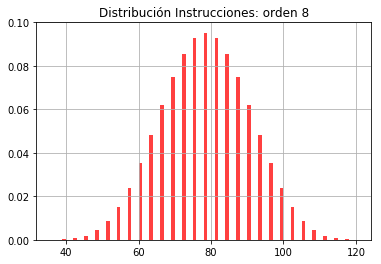

Comparaciones:
[7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 13, 14, 14, 15, 15, 16, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 13, 14, 14, 15, 15, 16, 14, 15, 15, 16, 16, 17, 8, 9, 9, 10, 10, 11, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 10, 11, 11, 12, 12, 13, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 13, 14, 14, 15, 15, 16, 11, 12, 12, 13, 13, 14, 12, 13, 13, 14, 14, 15, 13, 14, 14, 15, 15, 16, 14, 15, 15, 16, 16, 17, 12, 13, 13, 14, 14, 15, 13, 14, 14, 15, 15, 16, 14, 15, 15, 16, 16, 17, 15, 16, 16, 17, 17, 18, 9, 10, 10, 11, 11, 12, 10, 11, 11, 12, 12, 

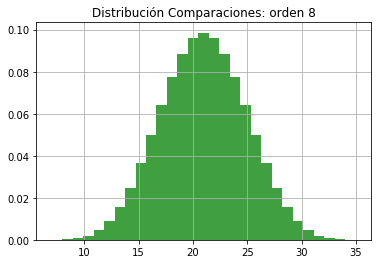

Intercambios:
[0, 1, 1, 2, 2, 3, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 8, 9, 9, 10, 10, 11, 2, 3, 3, 4, 4, 5, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 3, 4, 4, 5, 5, 6, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 4, 5, 5, 6, 6, 7, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 8, 9, 9, 10, 5, 6, 6, 7, 7, 8, 6, 7, 7, 8, 8, 9, 7, 8, 

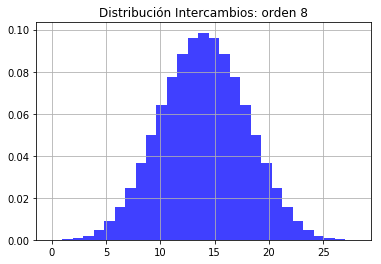

Preguntas:
[14, 16, 16, 18, 18, 20, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 26, 28, 28, 30, 30, 32, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 26, 28, 28, 30, 30, 32, 28, 30, 30, 32, 32, 34, 16, 18, 18, 20, 20, 22, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 18, 20, 20, 22, 22, 24, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 20, 22, 22, 24, 24, 26, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 26, 28, 28, 30, 30, 32, 22, 24, 24, 26, 26, 28, 24, 26, 26, 28, 28, 30, 26, 28, 28, 30, 30, 32, 28, 30, 30, 32, 32, 34, 24, 26, 26, 28, 28, 30, 26, 28, 28, 30, 30, 32, 28, 30, 30, 32, 32, 34, 30, 32, 32, 34, 34, 36, 18, 20, 20, 22, 22, 24, 20, 

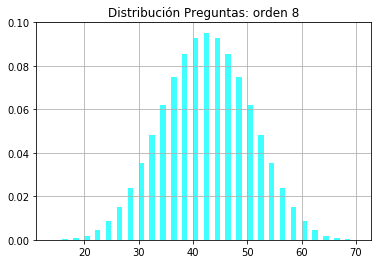

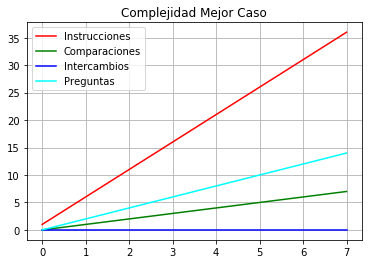

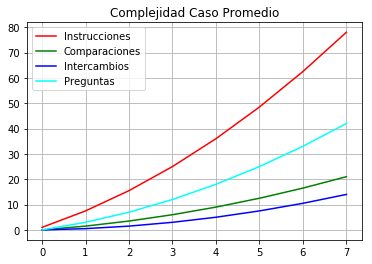

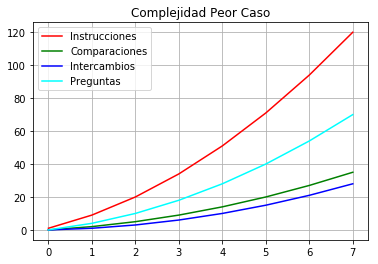

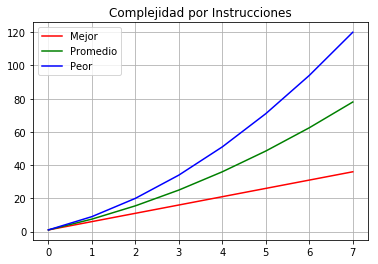

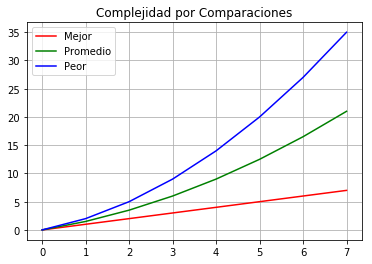

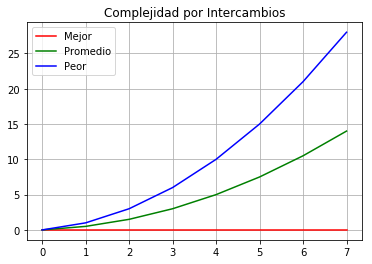

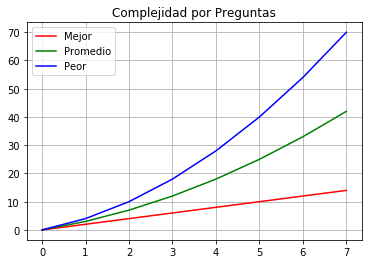

In [21]:
permutacionesItertools(8, DEBUG=DEBUG)

In [ ]:
permutacionesItertools(100)

N: 1
N: 2
N: 3
N: 4
N: 5
N: 6
N: 7
N: 8
N: 9
N: 10
N: 11


### Backup del Resultado
<img src="./img/memoria.PNG" alt="Maxima cantidad de iteraciones soportada por el computador." />

## Implementación usando el código de Daniel Jiménez

In [33]:
global cases
global npermut
cases = []
npermut = 0


'''
Función: Swap

Realizar un intercambio de dos elementos de un arreglo.
'''
def swap(arr, i, j):
    tmp = arr[i]
    arr[i] = arr[j]
    arr[j] = tmp

'''
Recursive function to generate permutations based on c code from Daniel Jimenez 
http://www.cs.rutgers.edu/~djimenez 
form his 1998 algorithms class at The University of Texas at San Antonio now his in Rutgers University 
and the code is available at 
http://camino.rutgers.edu/ut/utsa/cs3343/index.html 
in Lecture 25: Generating Permutations and Combinations
'''
def permitacionesDanielJimenez(arr, i, n):
    global cases
    global npermut
    if i == n:
        npermut += 1
        counter, v = insertionSort(arr)
        if DEBUG: 
            print u'Arreglo Ordenado'
            counter.print_results()
            print v
            print ''
        cases.append(counter)
    else:
        for j in range(i-1, n):
            swap(arr, i, j)
            permitacionesDanielJimenez(arr, i+1, n)
            if DEBUG: 
                print u'Permutación %d desde la posición %d'%(j, i)
                print arr
                print ''
            swap(arr, i, j)
                        

Arreglo Ordenado
instrucciones: 56, comparaciones: 15, intercambios: 10, preguntas: 30
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[4 3 2 1 0 5]

Arreglo Ordenado
instrucciones: 59, comparaciones: 16, intercambios: 11, preguntas: 32
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[4 3 2 1 5 0]

Permutación 3 desde la posición 4
[4 3 2 1 5 0]

Arreglo Ordenado
instrucciones: 59, comparaciones: 16, intercambios: 11, preguntas: 32
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[4 3 2 5 0 1]

Arreglo Ordenado
instrucciones: 62, comparaciones: 17, intercambios: 12, preguntas: 34
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[4 3 2 5 1 0]

Permutación 4 desde la posición 4
[4 3 2 5 1 0]

Arreglo Ordenado
instrucciones: 62, comparaciones: 17, intercambios: 12, preguntas: 34
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[4 3 2 5 1 0]

Arreglo Ordenado
instrucciones: 59, comparaciones: 16, intercambios: 11, preguntas: 32
[0, 1, 2, 3, 4, 5]

Permutación 5 d

[5 4 3 2 0 1]

Permutación 3 desde la posición 3
[5 4 3 2 1 0]

Arreglo Ordenado
instrucciones: 68, comparaciones: 19, intercambios: 14, preguntas: 38
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 4 3 2 0 1]

Arreglo Ordenado
instrucciones: 71, comparaciones: 20, intercambios: 15, preguntas: 40
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 4 3 2 1 0]

Permutación 3 desde la posición 4
[5 4 3 2 1 0]

Arreglo Ordenado
instrucciones: 65, comparaciones: 18, intercambios: 13, preguntas: 36
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 4 3 1 0 2]

Arreglo Ordenado
instrucciones: 68, comparaciones: 19, intercambios: 14, preguntas: 38
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 4 3 1 2 0]

Permutación 4 desde la posición 4
[5 4 3 1 2 0]

Arreglo Ordenado
instrucciones: 68, comparaciones: 19, intercambios: 14, preguntas: 38
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 4 3 1 2 0]

Arreglo Ordenado
instrucciones: 65, comparaciones: 18, int

[5 4 3 1 0 2]

Arreglo Ordenado
instrucciones: 68, comparaciones: 19, intercambios: 14, preguntas: 38
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 4 3 1 2 0]

Permutación 3 desde la posición 4
[5 4 3 1 2 0]

Arreglo Ordenado
instrucciones: 68, comparaciones: 19, intercambios: 14, preguntas: 38
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 4 3 2 0 1]

Arreglo Ordenado
instrucciones: 71, comparaciones: 20, intercambios: 15, preguntas: 40
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 4 3 2 1 0]

Permutación 4 desde la posición 4
[5 4 3 2 1 0]

Arreglo Ordenado
instrucciones: 71, comparaciones: 20, intercambios: 15, preguntas: 40
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 4 3 2 1 0]

Arreglo Ordenado
instrucciones: 68, comparaciones: 19, intercambios: 14, preguntas: 38
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 4 3 2 0 1]

Permutación 5 desde la posición 4
[5 4 3 2 0 1]

Permutación 3 desde la posición 3
[5 4 3 2 1 0]

Arreglo O

[5 3 4 2 1 0]

Arreglo Ordenado
instrucciones: 68, comparaciones: 19, intercambios: 14, preguntas: 38
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 3 4 2 1 0]

Arreglo Ordenado
instrucciones: 65, comparaciones: 18, intercambios: 13, preguntas: 36
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 3 4 2 0 1]

Permutación 5 desde la posición 4
[5 3 4 2 0 1]

Permutación 2 desde la posición 3
[5 3 4 2 1 0]

Arreglo Ordenado
instrucciones: 59, comparaciones: 16, intercambios: 11, preguntas: 32
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 3 2 1 0 4]

Arreglo Ordenado
instrucciones: 62, comparaciones: 17, intercambios: 12, preguntas: 34
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 3 2 1 4 0]

Permutación 3 desde la posición 4
[5 3 2 1 4 0]

Arreglo Ordenado
instrucciones: 62, comparaciones: 17, intercambios: 12, preguntas: 34
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 3 2 4 0 1]

Arreglo Ordenado
instrucciones: 65, comparaciones: 18, int

[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 3 2 1 4 0]

Permutación 4 desde la posición 4
[5 3 2 1 4 0]

Arreglo Ordenado
instrucciones: 62, comparaciones: 17, intercambios: 12, preguntas: 34
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 3 2 1 4 0]

Arreglo Ordenado
instrucciones: 59, comparaciones: 16, intercambios: 11, preguntas: 32
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 3 2 1 0 4]

Permutación 5 desde la posición 4
[5 3 2 1 0 4]

Permutación 2 desde la posición 3
[5 3 2 1 4 0]

Arreglo Ordenado
instrucciones: 59, comparaciones: 16, intercambios: 11, preguntas: 32
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 3 1 4 0 2]

Arreglo Ordenado
instrucciones: 62, comparaciones: 17, intercambios: 12, preguntas: 34
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 3 1 4 2 0]

Permutación 3 desde la posición 4
[5 3 1 4 2 0]

Arreglo Ordenado
instrucciones: 56, comparaciones: 15, intercambios: 10, preguntas: 30
[0, 1, 2, 3, 4, 5]

Perm

[5 1 0 4 2 3]

Arreglo Ordenado
instrucciones: 53, comparaciones: 14, intercambios: 9, preguntas: 28
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 1 0 4 3 2]

Permutación 5 desde la posición 4
[5 1 0 4 3 2]

Permutación 4 desde la posición 3
[5 1 0 4 2 3]

Arreglo Ordenado
instrucciones: 50, comparaciones: 13, intercambios: 8, preguntas: 26
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 1 0 4 2 3]

Arreglo Ordenado
instrucciones: 53, comparaciones: 14, intercambios: 9, preguntas: 28
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 1 0 4 3 2]

Permutación 3 desde la posición 4
[5 1 0 4 3 2]

Arreglo Ordenado
instrucciones: 47, comparaciones: 12, intercambios: 7, preguntas: 24
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 1 0 3 2 4]

Arreglo Ordenado
instrucciones: 50, comparaciones: 13, intercambios: 8, preguntas: 26
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 1 0 3 4 2]

Permutación 4 desde la posición 4
[5 1 0 3 4 2]

Arreglo Ordena

Arreglo Ordenado
instrucciones: 50, comparaciones: 13, intercambios: 8, preguntas: 26
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 0 2 4 1 3]

Permutación 4 desde la posición 4
[5 0 2 4 1 3]

Arreglo Ordenado
instrucciones: 50, comparaciones: 13, intercambios: 8, preguntas: 26
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 0 2 4 1 3]

Arreglo Ordenado
instrucciones: 53, comparaciones: 14, intercambios: 9, preguntas: 28
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 0 2 4 3 1]

Permutación 5 desde la posición 4
[5 0 2 4 3 1]

Permutación 2 desde la posición 3
[5 0 2 4 1 3]

Arreglo Ordenado
instrucciones: 53, comparaciones: 14, intercambios: 9, preguntas: 28
[0, 1, 2, 3, 4, 5]

Permutación 4 desde la posición 5
[5 0 4 1 3 2]

Arreglo Ordenado
instrucciones: 50, comparaciones: 13, intercambios: 8, preguntas: 26
[0, 1, 2, 3, 4, 5]

Permutación 5 desde la posición 5
[5 0 4 1 2 3]

Permutación 3 desde la posición 4
[5 0 4 1 2 3]

Arreglo Ordenado
instruccione

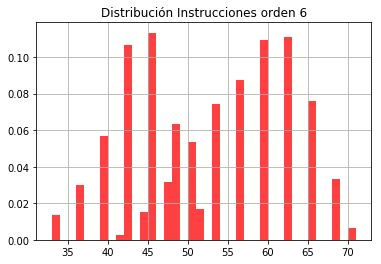

Comparaciones
[10, 11, 11, 12, 12, 11, 11, 12, 12, 13, 13, 12, 12, 13, 11, 12, 12, 11, 12, 11, 11, 10, 10, 11, 11, 12, 12, 13, 13, 12, 12, 13, 13, 14, 14, 13, 13, 14, 12, 13, 13, 12, 13, 12, 12, 11, 11, 12, 12, 13, 13, 14, 14, 13, 11, 12, 12, 13, 13, 12, 12, 13, 11, 12, 12, 11, 12, 11, 11, 10, 10, 11, 12, 13, 11, 12, 12, 11, 11, 12, 10, 11, 11, 10, 10, 11, 11, 12, 12, 11, 12, 11, 9, 10, 10, 9, 12, 11, 11, 10, 10, 11, 9, 8, 10, 9, 9, 10, 10, 9, 9, 8, 8, 9, 8, 9, 11, 10, 10, 11, 10, 11, 11, 12, 12, 11, 11, 12, 12, 13, 13, 12, 12, 13, 11, 12, 12, 11, 12, 11, 11, 10, 10, 11, 11, 12, 12, 13, 13, 12, 12, 13, 13, 14, 14, 13, 13, 14, 12, 13, 13, 12, 13, 12, 12, 11, 11, 12, 12, 13, 13, 14, 14, 13, 11, 12, 12, 13, 13, 12, 12, 13, 11, 12, 12, 11, 12, 11, 11, 10, 10, 11, 12, 13, 11, 12, 12, 11, 11, 12, 10, 11, 11, 10, 10, 11, 11, 12, 12, 11, 12, 11, 9, 10, 10, 9, 12, 11, 11, 10, 10, 11, 9, 8, 10, 9, 9, 10, 10, 9, 9, 8, 8, 9, 8, 9, 11, 10, 10, 11, 10, 11, 11, 12, 12, 11, 11, 12, 12, 13, 13, 12, 12,

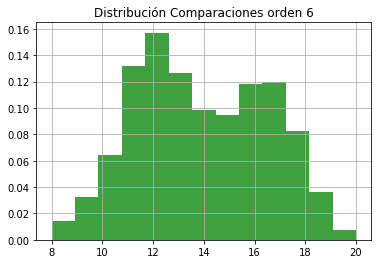

Intercambios
[6, 7, 7, 8, 8, 7, 7, 8, 8, 9, 9, 8, 8, 9, 7, 8, 8, 7, 8, 7, 7, 6, 6, 7, 7, 8, 8, 9, 9, 8, 8, 9, 9, 10, 10, 9, 9, 10, 8, 9, 9, 8, 9, 8, 8, 7, 7, 8, 8, 9, 9, 10, 10, 9, 7, 8, 8, 9, 9, 8, 8, 9, 7, 8, 8, 7, 8, 7, 7, 6, 6, 7, 8, 9, 7, 8, 8, 7, 7, 8, 6, 7, 7, 6, 6, 7, 7, 8, 8, 7, 8, 7, 5, 6, 6, 5, 8, 7, 7, 6, 6, 7, 5, 4, 6, 5, 5, 6, 6, 5, 5, 4, 4, 5, 4, 5, 7, 6, 6, 7, 6, 7, 7, 8, 8, 7, 7, 8, 8, 9, 9, 8, 8, 9, 7, 8, 8, 7, 8, 7, 7, 6, 6, 7, 7, 8, 8, 9, 9, 8, 8, 9, 9, 10, 10, 9, 9, 10, 8, 9, 9, 8, 9, 8, 8, 7, 7, 8, 8, 9, 9, 10, 10, 9, 7, 8, 8, 9, 9, 8, 8, 9, 7, 8, 8, 7, 8, 7, 7, 6, 6, 7, 8, 9, 7, 8, 8, 7, 7, 8, 6, 7, 7, 6, 6, 7, 7, 8, 8, 7, 8, 7, 5, 6, 6, 5, 8, 7, 7, 6, 6, 7, 5, 4, 6, 5, 5, 6, 6, 5, 5, 4, 4, 5, 4, 5, 7, 6, 6, 7, 6, 7, 7, 8, 8, 7, 7, 8, 8, 9, 9, 8, 8, 9, 7, 8, 8, 7, 8, 7, 7, 6, 6, 7, 7, 8, 8, 9, 9, 8, 8, 9, 9, 10, 10, 9, 9, 10, 8, 9, 9, 8, 9, 8, 8, 7, 7, 8, 8, 9, 9, 10, 10, 9, 7, 8, 8, 9, 9, 8, 8, 9, 7, 8, 8, 7, 8, 7, 7, 6, 6, 7, 8, 9, 7, 8, 8, 7, 7, 8, 6, 7, 7, 6,

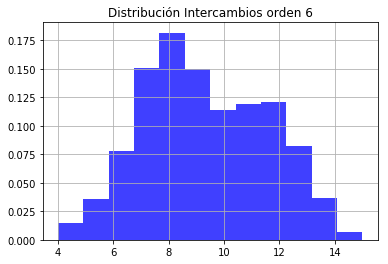

Preguntas
[20, 22, 22, 24, 24, 22, 22, 24, 24, 26, 26, 24, 24, 26, 22, 24, 24, 22, 24, 22, 22, 20, 20, 22, 22, 24, 24, 26, 26, 24, 24, 26, 26, 28, 28, 26, 26, 28, 24, 26, 26, 24, 26, 24, 24, 22, 22, 24, 24, 26, 26, 28, 28, 26, 22, 24, 24, 26, 26, 24, 24, 26, 22, 24, 24, 22, 24, 22, 22, 20, 20, 22, 24, 26, 22, 24, 24, 22, 22, 24, 20, 22, 22, 20, 20, 22, 22, 24, 24, 22, 24, 22, 18, 20, 20, 18, 24, 22, 22, 20, 20, 22, 18, 16, 20, 18, 18, 20, 20, 18, 18, 16, 16, 18, 16, 18, 22, 20, 20, 22, 20, 22, 22, 24, 24, 22, 22, 24, 24, 26, 26, 24, 24, 26, 22, 24, 24, 22, 24, 22, 22, 20, 20, 22, 22, 24, 24, 26, 26, 24, 24, 26, 26, 28, 28, 26, 26, 28, 24, 26, 26, 24, 26, 24, 24, 22, 22, 24, 24, 26, 26, 28, 28, 26, 22, 24, 24, 26, 26, 24, 24, 26, 22, 24, 24, 22, 24, 22, 22, 20, 20, 22, 24, 26, 22, 24, 24, 22, 22, 24, 20, 22, 22, 20, 20, 22, 22, 24, 24, 22, 24, 22, 18, 20, 20, 18, 24, 22, 22, 20, 20, 22, 18, 16, 20, 18, 18, 20, 20, 18, 18, 16, 16, 18, 16, 18, 22, 20, 20, 22, 20, 22, 22, 24, 24, 22, 22, 2

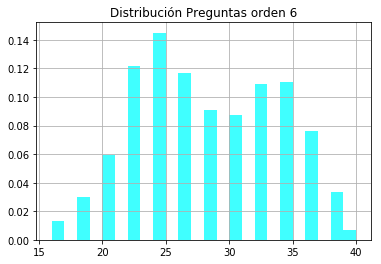

In [43]:
N = 6
arr = np.arange(N-1, -1, -1)
permitacionesDanielJimenez(arr, 1, N)

instr, comps, inter, pregs = [], [], [], []
for counter in cases:
    instr.append(counter.instr)
    comps.append(counter.comps)
    inter.append(counter.inter)
    pregs.append(counter.pregs)

plot_distribution('Instrucciones', instr, np.mean(instr), np.std(instr), N, 'red')
plot_distribution('Comparaciones', comps, np.mean(comps), np.std(comps), N, 'green')
plot_distribution('Intercambios',  inter, np.mean(inter), np.std(inter), N, 'blue')
plot_distribution('Preguntas',     pregs, np.mean(pregs), np.std(pregs), N, 'cyan')

## Aplicación a una muestra aleatoria de permutaciones

In [44]:
def randomPerm(n):
    v=[]
    for i in range(n):
        v.append(i+1)
    for i in range(len(v)-1):
        j = random.randint(i, len(v)-1)
        aux = v[i]
        v[i] = v[j]
        v[j] = aux
    return v

def permutacionesAleatorias(n, runs):
    suma = 0
    mini = n**3
    maxi = 0
    for i in range(runs):
        counter, _ = insertionSort(randomPerm(n))
        if counter.instr < mini: mini = counter.instr
        if counter.instr > maxi: maxi = counter.instr
        suma = suma + counter.instr
        if DEBUG: counter.print_results()
    print '\nResultados:'
    print 'Theoretical best time, ' + str(5*n - 4) 
    print 'Theoretical worst time,' + str((3.0/2.0)*n**2 + (7.0/2.0)*n - 4)
    print 'Theoretical average time,' + str((3.0/4.0)*n**2 + (17.0/4.0)*n - 4)
    print 'Experimenal best time, ' + str(mini)
    print 'Experimenal worst time,' + str(maxi)
    print 'Experimenal average time,' + str(suma/runs)


In [45]:
permutacionesAleatorias(100, 10000)

instrucciones: 8500, comparaciones: 2767, intercambios: 2668, preguntas: 5534
instrucciones: 8050, comparaciones: 2617, intercambios: 2518, preguntas: 5234
instrucciones: 7483, comparaciones: 2428, intercambios: 2329, preguntas: 4856
instrucciones: 8152, comparaciones: 2651, intercambios: 2552, preguntas: 5302
instrucciones: 7645, comparaciones: 2482, intercambios: 2383, preguntas: 4964
instrucciones: 8503, comparaciones: 2768, intercambios: 2669, preguntas: 5536
instrucciones: 7993, comparaciones: 2598, intercambios: 2499, preguntas: 5196
instrucciones: 8011, comparaciones: 2604, intercambios: 2505, preguntas: 5208
instrucciones: 8032, comparaciones: 2611, intercambios: 2512, preguntas: 5222
instrucciones: 9019, comparaciones: 2940, intercambios: 2841, preguntas: 5880
instrucciones: 8758, comparaciones: 2853, intercambios: 2754, preguntas: 5706
instrucciones: 7891, comparaciones: 2564, intercambios: 2465, preguntas: 5128
instrucciones: 7450, comparaciones: 2417, intercambios: 2318, pr

instrucciones: 7975, comparaciones: 2592, intercambios: 2493, preguntas: 5184
instrucciones: 7771, comparaciones: 2524, intercambios: 2425, preguntas: 5048
instrucciones: 8188, comparaciones: 2663, intercambios: 2564, preguntas: 5326
instrucciones: 7966, comparaciones: 2589, intercambios: 2490, preguntas: 5178
instrucciones: 7954, comparaciones: 2585, intercambios: 2486, preguntas: 5170
instrucciones: 7816, comparaciones: 2539, intercambios: 2440, preguntas: 5078
instrucciones: 8155, comparaciones: 2652, intercambios: 2553, preguntas: 5304
instrucciones: 8173, comparaciones: 2658, intercambios: 2559, preguntas: 5316
instrucciones: 7762, comparaciones: 2521, intercambios: 2422, preguntas: 5042
instrucciones: 7174, comparaciones: 2325, intercambios: 2226, preguntas: 4650
instrucciones: 7489, comparaciones: 2430, intercambios: 2331, preguntas: 4860
instrucciones: 9100, comparaciones: 2967, intercambios: 2868, preguntas: 5934
instrucciones: 7798, comparaciones: 2533, intercambios: 2434, pr

instrucciones: 7888, comparaciones: 2563, intercambios: 2464, preguntas: 5126
instrucciones: 8032, comparaciones: 2611, intercambios: 2512, preguntas: 5222
instrucciones: 8020, comparaciones: 2607, intercambios: 2508, preguntas: 5214
instrucciones: 7906, comparaciones: 2569, intercambios: 2470, preguntas: 5138
instrucciones: 7558, comparaciones: 2453, intercambios: 2354, preguntas: 4906
instrucciones: 8578, comparaciones: 2793, intercambios: 2694, preguntas: 5586
instrucciones: 8266, comparaciones: 2689, intercambios: 2590, preguntas: 5378
instrucciones: 8116, comparaciones: 2639, intercambios: 2540, preguntas: 5278
instrucciones: 7474, comparaciones: 2425, intercambios: 2326, preguntas: 4850
instrucciones: 8323, comparaciones: 2708, intercambios: 2609, preguntas: 5416
instrucciones: 8134, comparaciones: 2645, intercambios: 2546, preguntas: 5290
instrucciones: 7273, comparaciones: 2358, intercambios: 2259, preguntas: 4716
instrucciones: 7543, comparaciones: 2448, intercambios: 2349, pr

instrucciones: 7576, comparaciones: 2459, intercambios: 2360, preguntas: 4918
instrucciones: 8077, comparaciones: 2626, intercambios: 2527, preguntas: 5252
instrucciones: 7231, comparaciones: 2344, intercambios: 2245, preguntas: 4688
instrucciones: 8005, comparaciones: 2602, intercambios: 2503, preguntas: 5204
instrucciones: 7849, comparaciones: 2550, intercambios: 2451, preguntas: 5100
instrucciones: 7930, comparaciones: 2577, intercambios: 2478, preguntas: 5154
instrucciones: 7522, comparaciones: 2441, intercambios: 2342, preguntas: 4882
instrucciones: 7666, comparaciones: 2489, intercambios: 2390, preguntas: 4978
instrucciones: 8446, comparaciones: 2749, intercambios: 2650, preguntas: 5498
instrucciones: 8266, comparaciones: 2689, intercambios: 2590, preguntas: 5378
instrucciones: 8059, comparaciones: 2620, intercambios: 2521, preguntas: 5240
instrucciones: 8347, comparaciones: 2716, intercambios: 2617, preguntas: 5432
instrucciones: 8515, comparaciones: 2772, intercambios: 2673, pr

instrucciones: 8077, comparaciones: 2626, intercambios: 2527, preguntas: 5252
instrucciones: 8143, comparaciones: 2648, intercambios: 2549, preguntas: 5296
instrucciones: 7423, comparaciones: 2408, intercambios: 2309, preguntas: 4816
instrucciones: 7561, comparaciones: 2454, intercambios: 2355, preguntas: 4908
instrucciones: 7072, comparaciones: 2291, intercambios: 2192, preguntas: 4582
instrucciones: 7024, comparaciones: 2275, intercambios: 2176, preguntas: 4550
instrucciones: 7963, comparaciones: 2588, intercambios: 2489, preguntas: 5176
instrucciones: 8191, comparaciones: 2664, intercambios: 2565, preguntas: 5328
instrucciones: 8521, comparaciones: 2774, intercambios: 2675, preguntas: 5548
instrucciones: 7531, comparaciones: 2444, intercambios: 2345, preguntas: 4888
instrucciones: 7447, comparaciones: 2416, intercambios: 2317, preguntas: 4832
instrucciones: 8320, comparaciones: 2707, intercambios: 2608, preguntas: 5414
instrucciones: 8272, comparaciones: 2691, intercambios: 2592, pr

instrucciones: 8323, comparaciones: 2708, intercambios: 2609, preguntas: 5416
instrucciones: 7330, comparaciones: 2377, intercambios: 2278, preguntas: 4754
instrucciones: 7645, comparaciones: 2482, intercambios: 2383, preguntas: 4964
instrucciones: 7210, comparaciones: 2337, intercambios: 2238, preguntas: 4674
instrucciones: 8677, comparaciones: 2826, intercambios: 2727, preguntas: 5652
instrucciones: 8086, comparaciones: 2629, intercambios: 2530, preguntas: 5258
instrucciones: 8476, comparaciones: 2759, intercambios: 2660, preguntas: 5518
instrucciones: 8476, comparaciones: 2759, intercambios: 2660, preguntas: 5518
instrucciones: 8146, comparaciones: 2649, intercambios: 2550, preguntas: 5298
instrucciones: 8107, comparaciones: 2636, intercambios: 2537, preguntas: 5272
instrucciones: 7675, comparaciones: 2492, intercambios: 2393, preguntas: 4984
instrucciones: 7813, comparaciones: 2538, intercambios: 2439, preguntas: 5076
instrucciones: 7795, comparaciones: 2532, intercambios: 2433, pr

instrucciones: 8557, comparaciones: 2786, intercambios: 2687, preguntas: 5572
instrucciones: 7933, comparaciones: 2578, intercambios: 2479, preguntas: 5156
instrucciones: 7699, comparaciones: 2500, intercambios: 2401, preguntas: 5000
instrucciones: 7150, comparaciones: 2317, intercambios: 2218, preguntas: 4634
instrucciones: 7216, comparaciones: 2339, intercambios: 2240, preguntas: 4678
instrucciones: 8434, comparaciones: 2745, intercambios: 2646, preguntas: 5490
instrucciones: 6901, comparaciones: 2234, intercambios: 2135, preguntas: 4468
instrucciones: 7144, comparaciones: 2315, intercambios: 2216, preguntas: 4630
instrucciones: 7165, comparaciones: 2322, intercambios: 2223, preguntas: 4644
instrucciones: 8182, comparaciones: 2661, intercambios: 2562, preguntas: 5322
instrucciones: 7852, comparaciones: 2551, intercambios: 2452, preguntas: 5102
instrucciones: 7015, comparaciones: 2272, intercambios: 2173, preguntas: 4544
instrucciones: 8014, comparaciones: 2605, intercambios: 2506, pr

instrucciones: 8233, comparaciones: 2678, intercambios: 2579, preguntas: 5356
instrucciones: 7876, comparaciones: 2559, intercambios: 2460, preguntas: 5118
instrucciones: 7993, comparaciones: 2598, intercambios: 2499, preguntas: 5196
instrucciones: 7981, comparaciones: 2594, intercambios: 2495, preguntas: 5188
instrucciones: 7573, comparaciones: 2458, intercambios: 2359, preguntas: 4916
instrucciones: 7897, comparaciones: 2566, intercambios: 2467, preguntas: 5132
instrucciones: 7765, comparaciones: 2522, intercambios: 2423, preguntas: 5044
instrucciones: 7906, comparaciones: 2569, intercambios: 2470, preguntas: 5138
instrucciones: 7450, comparaciones: 2417, intercambios: 2318, preguntas: 4834
instrucciones: 7552, comparaciones: 2451, intercambios: 2352, preguntas: 4902
instrucciones: 7477, comparaciones: 2426, intercambios: 2327, preguntas: 4852
instrucciones: 8308, comparaciones: 2703, intercambios: 2604, preguntas: 5406
instrucciones: 7243, comparaciones: 2348, intercambios: 2249, pr

instrucciones: 7339, comparaciones: 2380, intercambios: 2281, preguntas: 4760
instrucciones: 7684, comparaciones: 2495, intercambios: 2396, preguntas: 4990
instrucciones: 8125, comparaciones: 2642, intercambios: 2543, preguntas: 5284
instrucciones: 7636, comparaciones: 2479, intercambios: 2380, preguntas: 4958
instrucciones: 8452, comparaciones: 2751, intercambios: 2652, preguntas: 5502
instrucciones: 8272, comparaciones: 2691, intercambios: 2592, preguntas: 5382
instrucciones: 8026, comparaciones: 2609, intercambios: 2510, preguntas: 5218
instrucciones: 8626, comparaciones: 2809, intercambios: 2710, preguntas: 5618
instrucciones: 7501, comparaciones: 2434, intercambios: 2335, preguntas: 4868
instrucciones: 8755, comparaciones: 2852, intercambios: 2753, preguntas: 5704
instrucciones: 8005, comparaciones: 2602, intercambios: 2503, preguntas: 5204
instrucciones: 7558, comparaciones: 2453, intercambios: 2354, preguntas: 4906
instrucciones: 7579, comparaciones: 2460, intercambios: 2361, pr

instrucciones: 7972, comparaciones: 2591, intercambios: 2492, preguntas: 5182
instrucciones: 8221, comparaciones: 2674, intercambios: 2575, preguntas: 5348
instrucciones: 8143, comparaciones: 2648, intercambios: 2549, preguntas: 5296
instrucciones: 7042, comparaciones: 2281, intercambios: 2182, preguntas: 4562
instrucciones: 7321, comparaciones: 2374, intercambios: 2275, preguntas: 4748
instrucciones: 7729, comparaciones: 2510, intercambios: 2411, preguntas: 5020
instrucciones: 8446, comparaciones: 2749, intercambios: 2650, preguntas: 5498
instrucciones: 8617, comparaciones: 2806, intercambios: 2707, preguntas: 5612
instrucciones: 7903, comparaciones: 2568, intercambios: 2469, preguntas: 5136
instrucciones: 8170, comparaciones: 2657, intercambios: 2558, preguntas: 5314
instrucciones: 7642, comparaciones: 2481, intercambios: 2382, preguntas: 4962
instrucciones: 8062, comparaciones: 2621, intercambios: 2522, preguntas: 5242
instrucciones: 8116, comparaciones: 2639, intercambios: 2540, pr

instrucciones: 9037, comparaciones: 2946, intercambios: 2847, preguntas: 5892
instrucciones: 7285, comparaciones: 2362, intercambios: 2263, preguntas: 4724
instrucciones: 8716, comparaciones: 2839, intercambios: 2740, preguntas: 5678
instrucciones: 7867, comparaciones: 2556, intercambios: 2457, preguntas: 5112
instrucciones: 6874, comparaciones: 2225, intercambios: 2126, preguntas: 4450
instrucciones: 7513, comparaciones: 2438, intercambios: 2339, preguntas: 4876
instrucciones: 7303, comparaciones: 2368, intercambios: 2269, preguntas: 4736
instrucciones: 7699, comparaciones: 2500, intercambios: 2401, preguntas: 5000
instrucciones: 8098, comparaciones: 2633, intercambios: 2534, preguntas: 5266
instrucciones: 8446, comparaciones: 2749, intercambios: 2650, preguntas: 5498
instrucciones: 7780, comparaciones: 2527, intercambios: 2428, preguntas: 5054
instrucciones: 8299, comparaciones: 2700, intercambios: 2601, preguntas: 5400
instrucciones: 7798, comparaciones: 2533, intercambios: 2434, pr

instrucciones: 9082, comparaciones: 2961, intercambios: 2862, preguntas: 5922
instrucciones: 8254, comparaciones: 2685, intercambios: 2586, preguntas: 5370
instrucciones: 7678, comparaciones: 2493, intercambios: 2394, preguntas: 4986
instrucciones: 7588, comparaciones: 2463, intercambios: 2364, preguntas: 4926
instrucciones: 8437, comparaciones: 2746, intercambios: 2647, preguntas: 5492
instrucciones: 7966, comparaciones: 2589, intercambios: 2490, preguntas: 5178
instrucciones: 7939, comparaciones: 2580, intercambios: 2481, preguntas: 5160
instrucciones: 8476, comparaciones: 2759, intercambios: 2660, preguntas: 5518
instrucciones: 8545, comparaciones: 2782, intercambios: 2683, preguntas: 5564
instrucciones: 8053, comparaciones: 2618, intercambios: 2519, preguntas: 5236
instrucciones: 7408, comparaciones: 2403, intercambios: 2304, preguntas: 4806
instrucciones: 8623, comparaciones: 2808, intercambios: 2709, preguntas: 5616
instrucciones: 8080, comparaciones: 2627, intercambios: 2528, pr

instrucciones: 8140, comparaciones: 2647, intercambios: 2548, preguntas: 5294
instrucciones: 7294, comparaciones: 2365, intercambios: 2266, preguntas: 4730
instrucciones: 9145, comparaciones: 2982, intercambios: 2883, preguntas: 5964
instrucciones: 7831, comparaciones: 2544, intercambios: 2445, preguntas: 5088
instrucciones: 8338, comparaciones: 2713, intercambios: 2614, preguntas: 5426
instrucciones: 7012, comparaciones: 2271, intercambios: 2172, preguntas: 4542
instrucciones: 7870, comparaciones: 2557, intercambios: 2458, preguntas: 5114
instrucciones: 8386, comparaciones: 2729, intercambios: 2630, preguntas: 5458
instrucciones: 8029, comparaciones: 2610, intercambios: 2511, preguntas: 5220
instrucciones: 7411, comparaciones: 2404, intercambios: 2305, preguntas: 4808
instrucciones: 7474, comparaciones: 2425, intercambios: 2326, preguntas: 4850
instrucciones: 7954, comparaciones: 2585, intercambios: 2486, preguntas: 5170
instrucciones: 8110, comparaciones: 2637, intercambios: 2538, pr

instrucciones: 7537, comparaciones: 2446, intercambios: 2347, preguntas: 4892
instrucciones: 8029, comparaciones: 2610, intercambios: 2511, preguntas: 5220
instrucciones: 8062, comparaciones: 2621, intercambios: 2522, preguntas: 5242
instrucciones: 7327, comparaciones: 2376, intercambios: 2277, preguntas: 4752
instrucciones: 7597, comparaciones: 2466, intercambios: 2367, preguntas: 4932
instrucciones: 7444, comparaciones: 2415, intercambios: 2316, preguntas: 4830
instrucciones: 8407, comparaciones: 2736, intercambios: 2637, preguntas: 5472
instrucciones: 7867, comparaciones: 2556, intercambios: 2457, preguntas: 5112
instrucciones: 7282, comparaciones: 2361, intercambios: 2262, preguntas: 4722
instrucciones: 7249, comparaciones: 2350, intercambios: 2251, preguntas: 4700
instrucciones: 8047, comparaciones: 2616, intercambios: 2517, preguntas: 5232
instrucciones: 7498, comparaciones: 2433, intercambios: 2334, preguntas: 4866
instrucciones: 7711, comparaciones: 2504, intercambios: 2405, pr

instrucciones: 8080, comparaciones: 2627, intercambios: 2528, preguntas: 5254
instrucciones: 8353, comparaciones: 2718, intercambios: 2619, preguntas: 5436
instrucciones: 8473, comparaciones: 2758, intercambios: 2659, preguntas: 5516
instrucciones: 7693, comparaciones: 2498, intercambios: 2399, preguntas: 4996
instrucciones: 7798, comparaciones: 2533, intercambios: 2434, preguntas: 5066
instrucciones: 7822, comparaciones: 2541, intercambios: 2442, preguntas: 5082
instrucciones: 8494, comparaciones: 2765, intercambios: 2666, preguntas: 5530
instrucciones: 7531, comparaciones: 2444, intercambios: 2345, preguntas: 4888
instrucciones: 8194, comparaciones: 2665, intercambios: 2566, preguntas: 5330
instrucciones: 6721, comparaciones: 2174, intercambios: 2075, preguntas: 4348
instrucciones: 8146, comparaciones: 2649, intercambios: 2550, preguntas: 5298
instrucciones: 8179, comparaciones: 2660, intercambios: 2561, preguntas: 5320
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, pr

instrucciones: 7840, comparaciones: 2547, intercambios: 2448, preguntas: 5094
instrucciones: 8137, comparaciones: 2646, intercambios: 2547, preguntas: 5292
instrucciones: 8260, comparaciones: 2687, intercambios: 2588, preguntas: 5374
instrucciones: 8353, comparaciones: 2718, intercambios: 2619, preguntas: 5436
instrucciones: 8329, comparaciones: 2710, intercambios: 2611, preguntas: 5420
instrucciones: 7921, comparaciones: 2574, intercambios: 2475, preguntas: 5148
instrucciones: 8233, comparaciones: 2678, intercambios: 2579, preguntas: 5356
instrucciones: 7624, comparaciones: 2475, intercambios: 2376, preguntas: 4950
instrucciones: 8470, comparaciones: 2757, intercambios: 2658, preguntas: 5514
instrucciones: 8401, comparaciones: 2734, intercambios: 2635, preguntas: 5468
instrucciones: 8548, comparaciones: 2783, intercambios: 2684, preguntas: 5566
instrucciones: 7138, comparaciones: 2313, intercambios: 2214, preguntas: 4626
instrucciones: 9196, comparaciones: 2999, intercambios: 2900, pr

instrucciones: 7687, comparaciones: 2496, intercambios: 2397, preguntas: 4992
instrucciones: 7684, comparaciones: 2495, intercambios: 2396, preguntas: 4990
instrucciones: 6619, comparaciones: 2140, intercambios: 2041, preguntas: 4280
instrucciones: 8548, comparaciones: 2783, intercambios: 2684, preguntas: 5566
instrucciones: 7930, comparaciones: 2577, intercambios: 2478, preguntas: 5154
instrucciones: 8272, comparaciones: 2691, intercambios: 2592, preguntas: 5382
instrucciones: 7579, comparaciones: 2460, intercambios: 2361, preguntas: 4920
instrucciones: 8020, comparaciones: 2607, intercambios: 2508, preguntas: 5214
instrucciones: 8635, comparaciones: 2812, intercambios: 2713, preguntas: 5624
instrucciones: 7891, comparaciones: 2564, intercambios: 2465, preguntas: 5128
instrucciones: 6721, comparaciones: 2174, intercambios: 2075, preguntas: 4348
instrucciones: 7129, comparaciones: 2310, intercambios: 2211, preguntas: 4620
instrucciones: 7981, comparaciones: 2594, intercambios: 2495, pr

instrucciones: 8482, comparaciones: 2761, intercambios: 2662, preguntas: 5522
instrucciones: 7798, comparaciones: 2533, intercambios: 2434, preguntas: 5066
instrucciones: 8842, comparaciones: 2881, intercambios: 2782, preguntas: 5762
instrucciones: 7543, comparaciones: 2448, intercambios: 2349, preguntas: 4896
instrucciones: 7807, comparaciones: 2536, intercambios: 2437, preguntas: 5072
instrucciones: 7834, comparaciones: 2545, intercambios: 2446, preguntas: 5090
instrucciones: 7489, comparaciones: 2430, intercambios: 2331, preguntas: 4860
instrucciones: 8272, comparaciones: 2691, intercambios: 2592, preguntas: 5382
instrucciones: 7945, comparaciones: 2582, intercambios: 2483, preguntas: 5164
instrucciones: 8023, comparaciones: 2608, intercambios: 2509, preguntas: 5216
instrucciones: 8599, comparaciones: 2800, intercambios: 2701, preguntas: 5600
instrucciones: 6976, comparaciones: 2259, intercambios: 2160, preguntas: 4518
instrucciones: 6958, comparaciones: 2253, intercambios: 2154, pr

instrucciones: 7852, comparaciones: 2551, intercambios: 2452, preguntas: 5102
instrucciones: 8014, comparaciones: 2605, intercambios: 2506, preguntas: 5210
instrucciones: 7495, comparaciones: 2432, intercambios: 2333, preguntas: 4864
instrucciones: 7558, comparaciones: 2453, intercambios: 2354, preguntas: 4906
instrucciones: 8164, comparaciones: 2655, intercambios: 2556, preguntas: 5310
instrucciones: 7432, comparaciones: 2411, intercambios: 2312, preguntas: 4822
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, preguntas: 4988
instrucciones: 8626, comparaciones: 2809, intercambios: 2710, preguntas: 5618
instrucciones: 7621, comparaciones: 2474, intercambios: 2375, preguntas: 4948
instrucciones: 8098, comparaciones: 2633, intercambios: 2534, preguntas: 5266
instrucciones: 7432, comparaciones: 2411, intercambios: 2312, preguntas: 4822
instrucciones: 9184, comparaciones: 2995, intercambios: 2896, preguntas: 5990
instrucciones: 8443, comparaciones: 2748, intercambios: 2649, pr

instrucciones: 8269, comparaciones: 2690, intercambios: 2591, preguntas: 5380
instrucciones: 7597, comparaciones: 2466, intercambios: 2367, preguntas: 4932
instrucciones: 8089, comparaciones: 2630, intercambios: 2531, preguntas: 5260
instrucciones: 8338, comparaciones: 2713, intercambios: 2614, preguntas: 5426
instrucciones: 7051, comparaciones: 2284, intercambios: 2185, preguntas: 4568
instrucciones: 7648, comparaciones: 2483, intercambios: 2384, preguntas: 4966
instrucciones: 7648, comparaciones: 2483, intercambios: 2384, preguntas: 4966
instrucciones: 8026, comparaciones: 2609, intercambios: 2510, preguntas: 5218
instrucciones: 8068, comparaciones: 2623, intercambios: 2524, preguntas: 5246
instrucciones: 7927, comparaciones: 2576, intercambios: 2477, preguntas: 5152
instrucciones: 7879, comparaciones: 2560, intercambios: 2461, preguntas: 5120
instrucciones: 7984, comparaciones: 2595, intercambios: 2496, preguntas: 5190
instrucciones: 7240, comparaciones: 2347, intercambios: 2248, pr

instrucciones: 8614, comparaciones: 2805, intercambios: 2706, preguntas: 5610
instrucciones: 7930, comparaciones: 2577, intercambios: 2478, preguntas: 5154
instrucciones: 8398, comparaciones: 2733, intercambios: 2634, preguntas: 5466
instrucciones: 8095, comparaciones: 2632, intercambios: 2533, preguntas: 5264
instrucciones: 8068, comparaciones: 2623, intercambios: 2524, preguntas: 5246
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, preguntas: 4988
instrucciones: 8830, comparaciones: 2877, intercambios: 2778, preguntas: 5754
instrucciones: 7897, comparaciones: 2566, intercambios: 2467, preguntas: 5132
instrucciones: 8002, comparaciones: 2601, intercambios: 2502, preguntas: 5202
instrucciones: 6829, comparaciones: 2210, intercambios: 2111, preguntas: 4420
instrucciones: 7498, comparaciones: 2433, intercambios: 2334, preguntas: 4866
instrucciones: 8602, comparaciones: 2801, intercambios: 2702, preguntas: 5602
instrucciones: 8512, comparaciones: 2771, intercambios: 2672, pr

instrucciones: 7537, comparaciones: 2446, intercambios: 2347, preguntas: 4892
instrucciones: 8440, comparaciones: 2747, intercambios: 2648, preguntas: 5494
instrucciones: 7756, comparaciones: 2519, intercambios: 2420, preguntas: 5038
instrucciones: 8020, comparaciones: 2607, intercambios: 2508, preguntas: 5214
instrucciones: 6799, comparaciones: 2200, intercambios: 2101, preguntas: 4400
instrucciones: 8389, comparaciones: 2730, intercambios: 2631, preguntas: 5460
instrucciones: 8296, comparaciones: 2699, intercambios: 2600, preguntas: 5398
instrucciones: 8755, comparaciones: 2852, intercambios: 2753, preguntas: 5704
instrucciones: 8326, comparaciones: 2709, intercambios: 2610, preguntas: 5418
instrucciones: 8482, comparaciones: 2761, intercambios: 2662, preguntas: 5522
instrucciones: 8611, comparaciones: 2804, intercambios: 2705, preguntas: 5608
instrucciones: 8179, comparaciones: 2660, intercambios: 2561, preguntas: 5320
instrucciones: 7540, comparaciones: 2447, intercambios: 2348, pr

instrucciones: 8839, comparaciones: 2880, intercambios: 2781, preguntas: 5760
instrucciones: 8716, comparaciones: 2839, intercambios: 2740, preguntas: 5678
instrucciones: 7102, comparaciones: 2301, intercambios: 2202, preguntas: 4602
instrucciones: 7711, comparaciones: 2504, intercambios: 2405, preguntas: 5008
instrucciones: 7741, comparaciones: 2514, intercambios: 2415, preguntas: 5028
instrucciones: 7267, comparaciones: 2356, intercambios: 2257, preguntas: 4712
instrucciones: 8515, comparaciones: 2772, intercambios: 2673, preguntas: 5544
instrucciones: 8524, comparaciones: 2775, intercambios: 2676, preguntas: 5550
instrucciones: 7504, comparaciones: 2435, intercambios: 2336, preguntas: 4870
instrucciones: 8548, comparaciones: 2783, intercambios: 2684, preguntas: 5566
instrucciones: 7258, comparaciones: 2353, intercambios: 2254, preguntas: 4706
instrucciones: 7771, comparaciones: 2524, intercambios: 2425, preguntas: 5048
instrucciones: 7792, comparaciones: 2531, intercambios: 2432, pr

instrucciones: 7627, comparaciones: 2476, intercambios: 2377, preguntas: 4952
instrucciones: 7804, comparaciones: 2535, intercambios: 2436, preguntas: 5070
instrucciones: 7783, comparaciones: 2528, intercambios: 2429, preguntas: 5056
instrucciones: 7018, comparaciones: 2273, intercambios: 2174, preguntas: 4546
instrucciones: 7894, comparaciones: 2565, intercambios: 2466, preguntas: 5130
instrucciones: 7747, comparaciones: 2516, intercambios: 2417, preguntas: 5032
instrucciones: 8788, comparaciones: 2863, intercambios: 2764, preguntas: 5726
instrucciones: 7906, comparaciones: 2569, intercambios: 2470, preguntas: 5138
instrucciones: 8059, comparaciones: 2620, intercambios: 2521, preguntas: 5240
instrucciones: 7078, comparaciones: 2293, intercambios: 2194, preguntas: 4586
instrucciones: 7684, comparaciones: 2495, intercambios: 2396, preguntas: 4990
instrucciones: 7420, comparaciones: 2407, intercambios: 2308, preguntas: 4814
instrucciones: 8251, comparaciones: 2684, intercambios: 2585, pr

instrucciones: 8203, comparaciones: 2668, intercambios: 2569, preguntas: 5336
instrucciones: 9208, comparaciones: 3003, intercambios: 2904, preguntas: 6006
instrucciones: 7123, comparaciones: 2308, intercambios: 2209, preguntas: 4616
instrucciones: 7612, comparaciones: 2471, intercambios: 2372, preguntas: 4942
instrucciones: 8311, comparaciones: 2704, intercambios: 2605, preguntas: 5408
instrucciones: 8419, comparaciones: 2740, intercambios: 2641, preguntas: 5480
instrucciones: 7801, comparaciones: 2534, intercambios: 2435, preguntas: 5068
instrucciones: 7117, comparaciones: 2306, intercambios: 2207, preguntas: 4612
instrucciones: 8710, comparaciones: 2837, intercambios: 2738, preguntas: 5674
instrucciones: 8269, comparaciones: 2690, intercambios: 2591, preguntas: 5380
instrucciones: 8296, comparaciones: 2699, intercambios: 2600, preguntas: 5398
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, preguntas: 4988
instrucciones: 6994, comparaciones: 2265, intercambios: 2166, pr

instrucciones: 8188, comparaciones: 2663, intercambios: 2564, preguntas: 5326
instrucciones: 7570, comparaciones: 2457, intercambios: 2358, preguntas: 4914
instrucciones: 7153, comparaciones: 2318, intercambios: 2219, preguntas: 4636
instrucciones: 7972, comparaciones: 2591, intercambios: 2492, preguntas: 5182
instrucciones: 7966, comparaciones: 2589, intercambios: 2490, preguntas: 5178
instrucciones: 7594, comparaciones: 2465, intercambios: 2366, preguntas: 4930
instrucciones: 8086, comparaciones: 2629, intercambios: 2530, preguntas: 5258
instrucciones: 7906, comparaciones: 2569, intercambios: 2470, preguntas: 5138
instrucciones: 7657, comparaciones: 2486, intercambios: 2387, preguntas: 4972
instrucciones: 7033, comparaciones: 2278, intercambios: 2179, preguntas: 4556
instrucciones: 7300, comparaciones: 2367, intercambios: 2268, preguntas: 4734
instrucciones: 8167, comparaciones: 2656, intercambios: 2557, preguntas: 5312
instrucciones: 7393, comparaciones: 2398, intercambios: 2299, pr

instrucciones: 9274, comparaciones: 3025, intercambios: 2926, preguntas: 6050
instrucciones: 8128, comparaciones: 2643, intercambios: 2544, preguntas: 5286
instrucciones: 7684, comparaciones: 2495, intercambios: 2396, preguntas: 4990
instrucciones: 8830, comparaciones: 2877, intercambios: 2778, preguntas: 5754
instrucciones: 7582, comparaciones: 2461, intercambios: 2362, preguntas: 4922
instrucciones: 8155, comparaciones: 2652, intercambios: 2553, preguntas: 5304
instrucciones: 9052, comparaciones: 2951, intercambios: 2852, preguntas: 5902
instrucciones: 7780, comparaciones: 2527, intercambios: 2428, preguntas: 5054
instrucciones: 8086, comparaciones: 2629, intercambios: 2530, preguntas: 5258
instrucciones: 7333, comparaciones: 2378, intercambios: 2279, preguntas: 4756
instrucciones: 8287, comparaciones: 2696, intercambios: 2597, preguntas: 5392
instrucciones: 7972, comparaciones: 2591, intercambios: 2492, preguntas: 5182
instrucciones: 8317, comparaciones: 2706, intercambios: 2607, pr

instrucciones: 7957, comparaciones: 2586, intercambios: 2487, preguntas: 5172
instrucciones: 8353, comparaciones: 2718, intercambios: 2619, preguntas: 5436
instrucciones: 8146, comparaciones: 2649, intercambios: 2550, preguntas: 5298
instrucciones: 8188, comparaciones: 2663, intercambios: 2564, preguntas: 5326
instrucciones: 7291, comparaciones: 2364, intercambios: 2265, preguntas: 4728
instrucciones: 8065, comparaciones: 2622, intercambios: 2523, preguntas: 5244
instrucciones: 8506, comparaciones: 2769, intercambios: 2670, preguntas: 5538
instrucciones: 7735, comparaciones: 2512, intercambios: 2413, preguntas: 5024
instrucciones: 6949, comparaciones: 2250, intercambios: 2151, preguntas: 4500
instrucciones: 7792, comparaciones: 2531, intercambios: 2432, preguntas: 5062
instrucciones: 7972, comparaciones: 2591, intercambios: 2492, preguntas: 5182
instrucciones: 7003, comparaciones: 2268, intercambios: 2169, preguntas: 4536
instrucciones: 8137, comparaciones: 2646, intercambios: 2547, pr

instrucciones: 8485, comparaciones: 2762, intercambios: 2663, preguntas: 5524
instrucciones: 7579, comparaciones: 2460, intercambios: 2361, preguntas: 4920
instrucciones: 8011, comparaciones: 2604, intercambios: 2505, preguntas: 5208
instrucciones: 7960, comparaciones: 2587, intercambios: 2488, preguntas: 5174
instrucciones: 8104, comparaciones: 2635, intercambios: 2536, preguntas: 5270
instrucciones: 7408, comparaciones: 2403, intercambios: 2304, preguntas: 4806
instrucciones: 7006, comparaciones: 2269, intercambios: 2170, preguntas: 4538
instrucciones: 7072, comparaciones: 2291, intercambios: 2192, preguntas: 4582
instrucciones: 8374, comparaciones: 2725, intercambios: 2626, preguntas: 5450
instrucciones: 7513, comparaciones: 2438, intercambios: 2339, preguntas: 4876
instrucciones: 7675, comparaciones: 2492, intercambios: 2393, preguntas: 4984
instrucciones: 8533, comparaciones: 2778, intercambios: 2679, preguntas: 5556
instrucciones: 7591, comparaciones: 2464, intercambios: 2365, pr

instrucciones: 7420, comparaciones: 2407, intercambios: 2308, preguntas: 4814
instrucciones: 7720, comparaciones: 2507, intercambios: 2408, preguntas: 5014
instrucciones: 6868, comparaciones: 2223, intercambios: 2124, preguntas: 4446
instrucciones: 8230, comparaciones: 2677, intercambios: 2578, preguntas: 5354
instrucciones: 6403, comparaciones: 2068, intercambios: 1969, preguntas: 4136
instrucciones: 8605, comparaciones: 2802, intercambios: 2703, preguntas: 5604
instrucciones: 7744, comparaciones: 2515, intercambios: 2416, preguntas: 5030
instrucciones: 7453, comparaciones: 2418, intercambios: 2319, preguntas: 4836
instrucciones: 8494, comparaciones: 2765, intercambios: 2666, preguntas: 5530
instrucciones: 7840, comparaciones: 2547, intercambios: 2448, preguntas: 5094
instrucciones: 7084, comparaciones: 2295, intercambios: 2196, preguntas: 4590
instrucciones: 8074, comparaciones: 2625, intercambios: 2526, preguntas: 5250
instrucciones: 8236, comparaciones: 2679, intercambios: 2580, pr

instrucciones: 8479, comparaciones: 2760, intercambios: 2661, preguntas: 5520
instrucciones: 8071, comparaciones: 2624, intercambios: 2525, preguntas: 5248
instrucciones: 8269, comparaciones: 2690, intercambios: 2591, preguntas: 5380
instrucciones: 8740, comparaciones: 2847, intercambios: 2748, preguntas: 5694
instrucciones: 7666, comparaciones: 2489, intercambios: 2390, preguntas: 4978
instrucciones: 7405, comparaciones: 2402, intercambios: 2303, preguntas: 4804
instrucciones: 8803, comparaciones: 2868, intercambios: 2769, preguntas: 5736
instrucciones: 7474, comparaciones: 2425, intercambios: 2326, preguntas: 4850
instrucciones: 8158, comparaciones: 2653, intercambios: 2554, preguntas: 5306
instrucciones: 6823, comparaciones: 2208, intercambios: 2109, preguntas: 4416
instrucciones: 7309, comparaciones: 2370, intercambios: 2271, preguntas: 4740
instrucciones: 7699, comparaciones: 2500, intercambios: 2401, preguntas: 5000
instrucciones: 7210, comparaciones: 2337, intercambios: 2238, pr

instrucciones: 8056, comparaciones: 2619, intercambios: 2520, preguntas: 5238
instrucciones: 8533, comparaciones: 2778, intercambios: 2679, preguntas: 5556
instrucciones: 7843, comparaciones: 2548, intercambios: 2449, preguntas: 5096
instrucciones: 8014, comparaciones: 2605, intercambios: 2506, preguntas: 5210
instrucciones: 8470, comparaciones: 2757, intercambios: 2658, preguntas: 5514
instrucciones: 7306, comparaciones: 2369, intercambios: 2270, preguntas: 4738
instrucciones: 7924, comparaciones: 2575, intercambios: 2476, preguntas: 5150
instrucciones: 6850, comparaciones: 2217, intercambios: 2118, preguntas: 4434
instrucciones: 7168, comparaciones: 2323, intercambios: 2224, preguntas: 4646
instrucciones: 7936, comparaciones: 2579, intercambios: 2480, preguntas: 5158
instrucciones: 8275, comparaciones: 2692, intercambios: 2593, preguntas: 5384
instrucciones: 8425, comparaciones: 2742, intercambios: 2643, preguntas: 5484
instrucciones: 8059, comparaciones: 2620, intercambios: 2521, pr

instrucciones: 8743, comparaciones: 2848, intercambios: 2749, preguntas: 5696
instrucciones: 7729, comparaciones: 2510, intercambios: 2411, preguntas: 5020
instrucciones: 8530, comparaciones: 2777, intercambios: 2678, preguntas: 5554
instrucciones: 7114, comparaciones: 2305, intercambios: 2206, preguntas: 4610
instrucciones: 7663, comparaciones: 2488, intercambios: 2389, preguntas: 4976
instrucciones: 7468, comparaciones: 2423, intercambios: 2324, preguntas: 4846
instrucciones: 7666, comparaciones: 2489, intercambios: 2390, preguntas: 4978
instrucciones: 8992, comparaciones: 2931, intercambios: 2832, preguntas: 5862
instrucciones: 7675, comparaciones: 2492, intercambios: 2393, preguntas: 4984
instrucciones: 7180, comparaciones: 2327, intercambios: 2228, preguntas: 4654
instrucciones: 8254, comparaciones: 2685, intercambios: 2586, preguntas: 5370
instrucciones: 8209, comparaciones: 2670, intercambios: 2571, preguntas: 5340
instrucciones: 8434, comparaciones: 2745, intercambios: 2646, pr

instrucciones: 8857, comparaciones: 2886, intercambios: 2787, preguntas: 5772
instrucciones: 7642, comparaciones: 2481, intercambios: 2382, preguntas: 4962
instrucciones: 9286, comparaciones: 3029, intercambios: 2930, preguntas: 6058
instrucciones: 7279, comparaciones: 2360, intercambios: 2261, preguntas: 4720
instrucciones: 7609, comparaciones: 2470, intercambios: 2371, preguntas: 4940
instrucciones: 7876, comparaciones: 2559, intercambios: 2460, preguntas: 5118
instrucciones: 8911, comparaciones: 2904, intercambios: 2805, preguntas: 5808
instrucciones: 7957, comparaciones: 2586, intercambios: 2487, preguntas: 5172
instrucciones: 8344, comparaciones: 2715, intercambios: 2616, preguntas: 5430
instrucciones: 8374, comparaciones: 2725, intercambios: 2626, preguntas: 5450
instrucciones: 7153, comparaciones: 2318, intercambios: 2219, preguntas: 4636
instrucciones: 7459, comparaciones: 2420, intercambios: 2321, preguntas: 4840
instrucciones: 7303, comparaciones: 2368, intercambios: 2269, pr

instrucciones: 7705, comparaciones: 2502, intercambios: 2403, preguntas: 5004
instrucciones: 8170, comparaciones: 2657, intercambios: 2558, preguntas: 5314
instrucciones: 7933, comparaciones: 2578, intercambios: 2479, preguntas: 5156
instrucciones: 7297, comparaciones: 2366, intercambios: 2267, preguntas: 4732
instrucciones: 6964, comparaciones: 2255, intercambios: 2156, preguntas: 4510
instrucciones: 7657, comparaciones: 2486, intercambios: 2387, preguntas: 4972
instrucciones: 7876, comparaciones: 2559, intercambios: 2460, preguntas: 5118
instrucciones: 8536, comparaciones: 2779, intercambios: 2680, preguntas: 5558
instrucciones: 8407, comparaciones: 2736, intercambios: 2637, preguntas: 5472
instrucciones: 8071, comparaciones: 2624, intercambios: 2525, preguntas: 5248
instrucciones: 8680, comparaciones: 2827, intercambios: 2728, preguntas: 5654
instrucciones: 7609, comparaciones: 2470, intercambios: 2371, preguntas: 4940
instrucciones: 7873, comparaciones: 2558, intercambios: 2459, pr

instrucciones: 8233, comparaciones: 2678, intercambios: 2579, preguntas: 5356
instrucciones: 8503, comparaciones: 2768, intercambios: 2669, preguntas: 5536
instrucciones: 8089, comparaciones: 2630, intercambios: 2531, preguntas: 5260
instrucciones: 8974, comparaciones: 2925, intercambios: 2826, preguntas: 5850
instrucciones: 7336, comparaciones: 2379, intercambios: 2280, preguntas: 4758
instrucciones: 7549, comparaciones: 2450, intercambios: 2351, preguntas: 4900
instrucciones: 8080, comparaciones: 2627, intercambios: 2528, preguntas: 5254
instrucciones: 7180, comparaciones: 2327, intercambios: 2228, preguntas: 4654
instrucciones: 8359, comparaciones: 2720, intercambios: 2621, preguntas: 5440
instrucciones: 7765, comparaciones: 2522, intercambios: 2423, preguntas: 5044
instrucciones: 7279, comparaciones: 2360, intercambios: 2261, preguntas: 4720
instrucciones: 8161, comparaciones: 2654, intercambios: 2555, preguntas: 5308
instrucciones: 8053, comparaciones: 2618, intercambios: 2519, pr

instrucciones: 8305, comparaciones: 2702, intercambios: 2603, preguntas: 5404
instrucciones: 7639, comparaciones: 2480, intercambios: 2381, preguntas: 4960
instrucciones: 7744, comparaciones: 2515, intercambios: 2416, preguntas: 5030
instrucciones: 7990, comparaciones: 2597, intercambios: 2498, preguntas: 5194
instrucciones: 7648, comparaciones: 2483, intercambios: 2384, preguntas: 4966
instrucciones: 8752, comparaciones: 2851, intercambios: 2752, preguntas: 5702
instrucciones: 7762, comparaciones: 2521, intercambios: 2422, preguntas: 5042
instrucciones: 7078, comparaciones: 2293, intercambios: 2194, preguntas: 4586
instrucciones: 8701, comparaciones: 2834, intercambios: 2735, preguntas: 5668
instrucciones: 7588, comparaciones: 2463, intercambios: 2364, preguntas: 4926
instrucciones: 7729, comparaciones: 2510, intercambios: 2411, preguntas: 5020
instrucciones: 7552, comparaciones: 2451, intercambios: 2352, preguntas: 4902
instrucciones: 7696, comparaciones: 2499, intercambios: 2400, pr

instrucciones: 8515, comparaciones: 2772, intercambios: 2673, preguntas: 5544
instrucciones: 7852, comparaciones: 2551, intercambios: 2452, preguntas: 5102
instrucciones: 7795, comparaciones: 2532, intercambios: 2433, preguntas: 5064
instrucciones: 7774, comparaciones: 2525, intercambios: 2426, preguntas: 5050
instrucciones: 7171, comparaciones: 2324, intercambios: 2225, preguntas: 4648
instrucciones: 7666, comparaciones: 2489, intercambios: 2390, preguntas: 4978
instrucciones: 8533, comparaciones: 2778, intercambios: 2679, preguntas: 5556
instrucciones: 8155, comparaciones: 2652, intercambios: 2553, preguntas: 5304
instrucciones: 8164, comparaciones: 2655, intercambios: 2556, preguntas: 5310
instrucciones: 8410, comparaciones: 2737, intercambios: 2638, preguntas: 5474
instrucciones: 6952, comparaciones: 2251, intercambios: 2152, preguntas: 4502
instrucciones: 8017, comparaciones: 2606, intercambios: 2507, preguntas: 5212
instrucciones: 8572, comparaciones: 2791, intercambios: 2692, pr

instrucciones: 8569, comparaciones: 2790, intercambios: 2691, preguntas: 5580
instrucciones: 8578, comparaciones: 2793, intercambios: 2694, preguntas: 5586
instrucciones: 7753, comparaciones: 2518, intercambios: 2419, preguntas: 5036
instrucciones: 8050, comparaciones: 2617, intercambios: 2518, preguntas: 5234
instrucciones: 8068, comparaciones: 2623, intercambios: 2524, preguntas: 5246
instrucciones: 8977, comparaciones: 2926, intercambios: 2827, preguntas: 5852
instrucciones: 7777, comparaciones: 2526, intercambios: 2427, preguntas: 5052
instrucciones: 7312, comparaciones: 2371, intercambios: 2272, preguntas: 4742
instrucciones: 7573, comparaciones: 2458, intercambios: 2359, preguntas: 4916
instrucciones: 8101, comparaciones: 2634, intercambios: 2535, preguntas: 5268
instrucciones: 8374, comparaciones: 2725, intercambios: 2626, preguntas: 5450
instrucciones: 7252, comparaciones: 2351, intercambios: 2252, preguntas: 4702
instrucciones: 8065, comparaciones: 2622, intercambios: 2523, pr

instrucciones: 8131, comparaciones: 2644, intercambios: 2545, preguntas: 5288
instrucciones: 7639, comparaciones: 2480, intercambios: 2381, preguntas: 4960
instrucciones: 7600, comparaciones: 2467, intercambios: 2368, preguntas: 4934
instrucciones: 8263, comparaciones: 2688, intercambios: 2589, preguntas: 5376
instrucciones: 7651, comparaciones: 2484, intercambios: 2385, preguntas: 4968
instrucciones: 7621, comparaciones: 2474, intercambios: 2375, preguntas: 4948
instrucciones: 7942, comparaciones: 2581, intercambios: 2482, preguntas: 5162
instrucciones: 7819, comparaciones: 2540, intercambios: 2441, preguntas: 5080
instrucciones: 8218, comparaciones: 2673, intercambios: 2574, preguntas: 5346
instrucciones: 7165, comparaciones: 2322, intercambios: 2223, preguntas: 4644
instrucciones: 8014, comparaciones: 2605, intercambios: 2506, preguntas: 5210
instrucciones: 7120, comparaciones: 2307, intercambios: 2208, preguntas: 4614
instrucciones: 8431, comparaciones: 2744, intercambios: 2645, pr

instrucciones: 8272, comparaciones: 2691, intercambios: 2592, preguntas: 5382
instrucciones: 7549, comparaciones: 2450, intercambios: 2351, preguntas: 4900
instrucciones: 7402, comparaciones: 2401, intercambios: 2302, preguntas: 4802
instrucciones: 8113, comparaciones: 2638, intercambios: 2539, preguntas: 5276
instrucciones: 7873, comparaciones: 2558, intercambios: 2459, preguntas: 5116
instrucciones: 8119, comparaciones: 2640, intercambios: 2541, preguntas: 5280
instrucciones: 8341, comparaciones: 2714, intercambios: 2615, preguntas: 5428
instrucciones: 8650, comparaciones: 2817, intercambios: 2718, preguntas: 5634
instrucciones: 8932, comparaciones: 2911, intercambios: 2812, preguntas: 5822
instrucciones: 7723, comparaciones: 2508, intercambios: 2409, preguntas: 5016
instrucciones: 7996, comparaciones: 2599, intercambios: 2500, preguntas: 5198
instrucciones: 7996, comparaciones: 2599, intercambios: 2500, preguntas: 5198
instrucciones: 7525, comparaciones: 2442, intercambios: 2343, pr

instrucciones: 7474, comparaciones: 2425, intercambios: 2326, preguntas: 4850
instrucciones: 7636, comparaciones: 2479, intercambios: 2380, preguntas: 4958
instrucciones: 8584, comparaciones: 2795, intercambios: 2696, preguntas: 5590
instrucciones: 8593, comparaciones: 2798, intercambios: 2699, preguntas: 5596
instrucciones: 8092, comparaciones: 2631, intercambios: 2532, preguntas: 5262
instrucciones: 7069, comparaciones: 2290, intercambios: 2191, preguntas: 4580
instrucciones: 8308, comparaciones: 2703, intercambios: 2604, preguntas: 5406
instrucciones: 8398, comparaciones: 2733, intercambios: 2634, preguntas: 5466
instrucciones: 7945, comparaciones: 2582, intercambios: 2483, preguntas: 5164
instrucciones: 7552, comparaciones: 2451, intercambios: 2352, preguntas: 4902
instrucciones: 8341, comparaciones: 2714, intercambios: 2615, preguntas: 5428
instrucciones: 8491, comparaciones: 2764, intercambios: 2665, preguntas: 5528
instrucciones: 8020, comparaciones: 2607, intercambios: 2508, pr

instrucciones: 8308, comparaciones: 2703, intercambios: 2604, preguntas: 5406
instrucciones: 8701, comparaciones: 2834, intercambios: 2735, preguntas: 5668
instrucciones: 7624, comparaciones: 2475, intercambios: 2376, preguntas: 4950
instrucciones: 7336, comparaciones: 2379, intercambios: 2280, preguntas: 4758
instrucciones: 8248, comparaciones: 2683, intercambios: 2584, preguntas: 5366
instrucciones: 7522, comparaciones: 2441, intercambios: 2342, preguntas: 4882
instrucciones: 7969, comparaciones: 2590, intercambios: 2491, preguntas: 5180
instrucciones: 7222, comparaciones: 2341, intercambios: 2242, preguntas: 4682
instrucciones: 6916, comparaciones: 2239, intercambios: 2140, preguntas: 4478
instrucciones: 8176, comparaciones: 2659, intercambios: 2560, preguntas: 5318
instrucciones: 8131, comparaciones: 2644, intercambios: 2545, preguntas: 5288
instrucciones: 7891, comparaciones: 2564, intercambios: 2465, preguntas: 5128
instrucciones: 7306, comparaciones: 2369, intercambios: 2270, pr

instrucciones: 8362, comparaciones: 2721, intercambios: 2622, preguntas: 5442
instrucciones: 8215, comparaciones: 2672, intercambios: 2573, preguntas: 5344
instrucciones: 8434, comparaciones: 2745, intercambios: 2646, preguntas: 5490
instrucciones: 7891, comparaciones: 2564, intercambios: 2465, preguntas: 5128
instrucciones: 8119, comparaciones: 2640, intercambios: 2541, preguntas: 5280
instrucciones: 8509, comparaciones: 2770, intercambios: 2671, preguntas: 5540
instrucciones: 7435, comparaciones: 2412, intercambios: 2313, preguntas: 4824
instrucciones: 7315, comparaciones: 2372, intercambios: 2273, preguntas: 4744
instrucciones: 7894, comparaciones: 2565, intercambios: 2466, preguntas: 5130
instrucciones: 7906, comparaciones: 2569, intercambios: 2470, preguntas: 5138
instrucciones: 7849, comparaciones: 2550, intercambios: 2451, preguntas: 5100
instrucciones: 8269, comparaciones: 2690, intercambios: 2591, preguntas: 5380
instrucciones: 8575, comparaciones: 2792, intercambios: 2693, pr

instrucciones: 7723, comparaciones: 2508, intercambios: 2409, preguntas: 5016
instrucciones: 7600, comparaciones: 2467, intercambios: 2368, preguntas: 4934
instrucciones: 7342, comparaciones: 2381, intercambios: 2282, preguntas: 4762
instrucciones: 7600, comparaciones: 2467, intercambios: 2368, preguntas: 4934
instrucciones: 6874, comparaciones: 2225, intercambios: 2126, preguntas: 4450
instrucciones: 8023, comparaciones: 2608, intercambios: 2509, preguntas: 5216
instrucciones: 7951, comparaciones: 2584, intercambios: 2485, preguntas: 5168
instrucciones: 8119, comparaciones: 2640, intercambios: 2541, preguntas: 5280
instrucciones: 7045, comparaciones: 2282, intercambios: 2183, preguntas: 4564
instrucciones: 7432, comparaciones: 2411, intercambios: 2312, preguntas: 4822
instrucciones: 8548, comparaciones: 2783, intercambios: 2684, preguntas: 5566
instrucciones: 8488, comparaciones: 2763, intercambios: 2664, preguntas: 5526
instrucciones: 9142, comparaciones: 2981, intercambios: 2882, pr

instrucciones: 7588, comparaciones: 2463, intercambios: 2364, preguntas: 4926
instrucciones: 8191, comparaciones: 2664, intercambios: 2565, preguntas: 5328
instrucciones: 7690, comparaciones: 2497, intercambios: 2398, preguntas: 4994
instrucciones: 7264, comparaciones: 2355, intercambios: 2256, preguntas: 4710
instrucciones: 7195, comparaciones: 2332, intercambios: 2233, preguntas: 4664
instrucciones: 8458, comparaciones: 2753, intercambios: 2654, preguntas: 5506
instrucciones: 7060, comparaciones: 2287, intercambios: 2188, preguntas: 4574
instrucciones: 8137, comparaciones: 2646, intercambios: 2547, preguntas: 5292
instrucciones: 6958, comparaciones: 2253, intercambios: 2154, preguntas: 4506
instrucciones: 7690, comparaciones: 2497, intercambios: 2398, preguntas: 4994
instrucciones: 7621, comparaciones: 2474, intercambios: 2375, preguntas: 4948
instrucciones: 7516, comparaciones: 2439, intercambios: 2340, preguntas: 4878
instrucciones: 7891, comparaciones: 2564, intercambios: 2465, pr

instrucciones: 7537, comparaciones: 2446, intercambios: 2347, preguntas: 4892
instrucciones: 8317, comparaciones: 2706, intercambios: 2607, preguntas: 5412
instrucciones: 7765, comparaciones: 2522, intercambios: 2423, preguntas: 5044
instrucciones: 7900, comparaciones: 2567, intercambios: 2468, preguntas: 5134
instrucciones: 8185, comparaciones: 2662, intercambios: 2563, preguntas: 5324
instrucciones: 8551, comparaciones: 2784, intercambios: 2685, preguntas: 5568
instrucciones: 8059, comparaciones: 2620, intercambios: 2521, preguntas: 5240
instrucciones: 7744, comparaciones: 2515, intercambios: 2416, preguntas: 5030
instrucciones: 8200, comparaciones: 2667, intercambios: 2568, preguntas: 5334
instrucciones: 8389, comparaciones: 2730, intercambios: 2631, preguntas: 5460
instrucciones: 8074, comparaciones: 2625, intercambios: 2526, preguntas: 5250
instrucciones: 8077, comparaciones: 2626, intercambios: 2527, preguntas: 5252
instrucciones: 7006, comparaciones: 2269, intercambios: 2170, pr

instrucciones: 7528, comparaciones: 2443, intercambios: 2344, preguntas: 4886
instrucciones: 7207, comparaciones: 2336, intercambios: 2237, preguntas: 4672
instrucciones: 8707, comparaciones: 2836, intercambios: 2737, preguntas: 5672
instrucciones: 8230, comparaciones: 2677, intercambios: 2578, preguntas: 5354
instrucciones: 7879, comparaciones: 2560, intercambios: 2461, preguntas: 5120
instrucciones: 7891, comparaciones: 2564, intercambios: 2465, preguntas: 5128
instrucciones: 6964, comparaciones: 2255, intercambios: 2156, preguntas: 4510
instrucciones: 7792, comparaciones: 2531, intercambios: 2432, preguntas: 5062
instrucciones: 8692, comparaciones: 2831, intercambios: 2732, preguntas: 5662
instrucciones: 8140, comparaciones: 2647, intercambios: 2548, preguntas: 5294
instrucciones: 7918, comparaciones: 2573, intercambios: 2474, preguntas: 5146
instrucciones: 7720, comparaciones: 2507, intercambios: 2408, preguntas: 5014
instrucciones: 8374, comparaciones: 2725, intercambios: 2626, pr

instrucciones: 7867, comparaciones: 2556, intercambios: 2457, preguntas: 5112
instrucciones: 7834, comparaciones: 2545, intercambios: 2446, preguntas: 5090
instrucciones: 8032, comparaciones: 2611, intercambios: 2512, preguntas: 5222
instrucciones: 8872, comparaciones: 2891, intercambios: 2792, preguntas: 5782
instrucciones: 8275, comparaciones: 2692, intercambios: 2593, preguntas: 5384
instrucciones: 7675, comparaciones: 2492, intercambios: 2393, preguntas: 4984
instrucciones: 8110, comparaciones: 2637, intercambios: 2538, preguntas: 5274
instrucciones: 7813, comparaciones: 2538, intercambios: 2439, preguntas: 5076
instrucciones: 8527, comparaciones: 2776, intercambios: 2677, preguntas: 5552
instrucciones: 6940, comparaciones: 2247, intercambios: 2148, preguntas: 4494
instrucciones: 8347, comparaciones: 2716, intercambios: 2617, preguntas: 5432
instrucciones: 8239, comparaciones: 2680, intercambios: 2581, preguntas: 5360
instrucciones: 8113, comparaciones: 2638, intercambios: 2539, pr

instrucciones: 7384, comparaciones: 2395, intercambios: 2296, preguntas: 4790
instrucciones: 7777, comparaciones: 2526, intercambios: 2427, preguntas: 5052
instrucciones: 7237, comparaciones: 2346, intercambios: 2247, preguntas: 4692
instrucciones: 8512, comparaciones: 2771, intercambios: 2672, preguntas: 5542
instrucciones: 7489, comparaciones: 2430, intercambios: 2331, preguntas: 4860
instrucciones: 7990, comparaciones: 2597, intercambios: 2498, preguntas: 5194
instrucciones: 7417, comparaciones: 2406, intercambios: 2307, preguntas: 4812
instrucciones: 7819, comparaciones: 2540, intercambios: 2441, preguntas: 5080
instrucciones: 7552, comparaciones: 2451, intercambios: 2352, preguntas: 4902
instrucciones: 7435, comparaciones: 2412, intercambios: 2313, preguntas: 4824
instrucciones: 7846, comparaciones: 2549, intercambios: 2450, preguntas: 5098
instrucciones: 8731, comparaciones: 2844, intercambios: 2745, preguntas: 5688
instrucciones: 8098, comparaciones: 2633, intercambios: 2534, pr

instrucciones: 8086, comparaciones: 2629, intercambios: 2530, preguntas: 5258
instrucciones: 7915, comparaciones: 2572, intercambios: 2473, preguntas: 5144
instrucciones: 8038, comparaciones: 2613, intercambios: 2514, preguntas: 5226
instrucciones: 8107, comparaciones: 2636, intercambios: 2537, preguntas: 5272
instrucciones: 8200, comparaciones: 2667, intercambios: 2568, preguntas: 5334
instrucciones: 7741, comparaciones: 2514, intercambios: 2415, preguntas: 5028
instrucciones: 7993, comparaciones: 2598, intercambios: 2499, preguntas: 5196
instrucciones: 8374, comparaciones: 2725, intercambios: 2626, preguntas: 5450
instrucciones: 8350, comparaciones: 2717, intercambios: 2618, preguntas: 5434
instrucciones: 8680, comparaciones: 2827, intercambios: 2728, preguntas: 5654
instrucciones: 7783, comparaciones: 2528, intercambios: 2429, preguntas: 5056
instrucciones: 7585, comparaciones: 2462, intercambios: 2363, preguntas: 4924
instrucciones: 7480, comparaciones: 2427, intercambios: 2328, pr

instrucciones: 7975, comparaciones: 2592, intercambios: 2493, preguntas: 5184
instrucciones: 8956, comparaciones: 2919, intercambios: 2820, preguntas: 5838
instrucciones: 7471, comparaciones: 2424, intercambios: 2325, preguntas: 4848
instrucciones: 7897, comparaciones: 2566, intercambios: 2467, preguntas: 5132
instrucciones: 8095, comparaciones: 2632, intercambios: 2533, preguntas: 5264
instrucciones: 6904, comparaciones: 2235, intercambios: 2136, preguntas: 4470
instrucciones: 7420, comparaciones: 2407, intercambios: 2308, preguntas: 4814
instrucciones: 7672, comparaciones: 2491, intercambios: 2392, preguntas: 4982
instrucciones: 7999, comparaciones: 2600, intercambios: 2501, preguntas: 5200
instrucciones: 8833, comparaciones: 2878, intercambios: 2779, preguntas: 5756
instrucciones: 7300, comparaciones: 2367, intercambios: 2268, preguntas: 4734
instrucciones: 7693, comparaciones: 2498, intercambios: 2399, preguntas: 4996
instrucciones: 7636, comparaciones: 2479, intercambios: 2380, pr

instrucciones: 7258, comparaciones: 2353, intercambios: 2254, preguntas: 4706
instrucciones: 7903, comparaciones: 2568, intercambios: 2469, preguntas: 5136
instrucciones: 7726, comparaciones: 2509, intercambios: 2410, preguntas: 5018
instrucciones: 8917, comparaciones: 2906, intercambios: 2807, preguntas: 5812
instrucciones: 7789, comparaciones: 2530, intercambios: 2431, preguntas: 5060
instrucciones: 8137, comparaciones: 2646, intercambios: 2547, preguntas: 5292
instrucciones: 7162, comparaciones: 2321, intercambios: 2222, preguntas: 4642
instrucciones: 8578, comparaciones: 2793, intercambios: 2694, preguntas: 5586
instrucciones: 7243, comparaciones: 2348, intercambios: 2249, preguntas: 4696
instrucciones: 8770, comparaciones: 2857, intercambios: 2758, preguntas: 5714
instrucciones: 7819, comparaciones: 2540, intercambios: 2441, preguntas: 5080
instrucciones: 8230, comparaciones: 2677, intercambios: 2578, preguntas: 5354
instrucciones: 8824, comparaciones: 2875, intercambios: 2776, pr

instrucciones: 8836, comparaciones: 2879, intercambios: 2780, preguntas: 5758
instrucciones: 7978, comparaciones: 2593, intercambios: 2494, preguntas: 5186
instrucciones: 8023, comparaciones: 2608, intercambios: 2509, preguntas: 5216
instrucciones: 7660, comparaciones: 2487, intercambios: 2388, preguntas: 4974
instrucciones: 8152, comparaciones: 2651, intercambios: 2552, preguntas: 5302
instrucciones: 7891, comparaciones: 2564, intercambios: 2465, preguntas: 5128
instrucciones: 8185, comparaciones: 2662, intercambios: 2563, preguntas: 5324
instrucciones: 7960, comparaciones: 2587, intercambios: 2488, preguntas: 5174
instrucciones: 7975, comparaciones: 2592, intercambios: 2493, preguntas: 5184
instrucciones: 7156, comparaciones: 2319, intercambios: 2220, preguntas: 4638
instrucciones: 7834, comparaciones: 2545, intercambios: 2446, preguntas: 5090
instrucciones: 8173, comparaciones: 2658, intercambios: 2559, preguntas: 5316
instrucciones: 7732, comparaciones: 2511, intercambios: 2412, pr

instrucciones: 7012, comparaciones: 2271, intercambios: 2172, preguntas: 4542
instrucciones: 8512, comparaciones: 2771, intercambios: 2672, preguntas: 5542
instrucciones: 7675, comparaciones: 2492, intercambios: 2393, preguntas: 4984
instrucciones: 7897, comparaciones: 2566, intercambios: 2467, preguntas: 5132
instrucciones: 7999, comparaciones: 2600, intercambios: 2501, preguntas: 5200
instrucciones: 8146, comparaciones: 2649, intercambios: 2550, preguntas: 5298
instrucciones: 7618, comparaciones: 2473, intercambios: 2374, preguntas: 4946
instrucciones: 8275, comparaciones: 2692, intercambios: 2593, preguntas: 5384
instrucciones: 7351, comparaciones: 2384, intercambios: 2285, preguntas: 4768
instrucciones: 7243, comparaciones: 2348, intercambios: 2249, preguntas: 4696
instrucciones: 8215, comparaciones: 2672, intercambios: 2573, preguntas: 5344
instrucciones: 7174, comparaciones: 2325, intercambios: 2226, preguntas: 4650
instrucciones: 7495, comparaciones: 2432, intercambios: 2333, pr

instrucciones: 7756, comparaciones: 2519, intercambios: 2420, preguntas: 5038
instrucciones: 8470, comparaciones: 2757, intercambios: 2658, preguntas: 5514
instrucciones: 7528, comparaciones: 2443, intercambios: 2344, preguntas: 4886
instrucciones: 8755, comparaciones: 2852, intercambios: 2753, preguntas: 5704
instrucciones: 7690, comparaciones: 2497, intercambios: 2398, preguntas: 4994
instrucciones: 7531, comparaciones: 2444, intercambios: 2345, preguntas: 4888
instrucciones: 8158, comparaciones: 2653, intercambios: 2554, preguntas: 5306
instrucciones: 8224, comparaciones: 2675, intercambios: 2576, preguntas: 5350
instrucciones: 7732, comparaciones: 2511, intercambios: 2412, preguntas: 5022
instrucciones: 8587, comparaciones: 2796, intercambios: 2697, preguntas: 5592
instrucciones: 8017, comparaciones: 2606, intercambios: 2507, preguntas: 5212
instrucciones: 8320, comparaciones: 2707, intercambios: 2608, preguntas: 5414
instrucciones: 8437, comparaciones: 2746, intercambios: 2647, pr

instrucciones: 7969, comparaciones: 2590, intercambios: 2491, preguntas: 5180
instrucciones: 8854, comparaciones: 2885, intercambios: 2786, preguntas: 5770
instrucciones: 8059, comparaciones: 2620, intercambios: 2521, preguntas: 5240
instrucciones: 7807, comparaciones: 2536, intercambios: 2437, preguntas: 5072
instrucciones: 6646, comparaciones: 2149, intercambios: 2050, preguntas: 4298
instrucciones: 7855, comparaciones: 2552, intercambios: 2453, preguntas: 5104
instrucciones: 7741, comparaciones: 2514, intercambios: 2415, preguntas: 5028
instrucciones: 7852, comparaciones: 2551, intercambios: 2452, preguntas: 5102
instrucciones: 7210, comparaciones: 2337, intercambios: 2238, preguntas: 4674
instrucciones: 8506, comparaciones: 2769, intercambios: 2670, preguntas: 5538
instrucciones: 7363, comparaciones: 2388, intercambios: 2289, preguntas: 4776
instrucciones: 7228, comparaciones: 2343, intercambios: 2244, preguntas: 4686
instrucciones: 6883, comparaciones: 2228, intercambios: 2129, pr

instrucciones: 8392, comparaciones: 2731, intercambios: 2632, preguntas: 5462
instrucciones: 7042, comparaciones: 2281, intercambios: 2182, preguntas: 4562
instrucciones: 8125, comparaciones: 2642, intercambios: 2543, preguntas: 5284
instrucciones: 8014, comparaciones: 2605, intercambios: 2506, preguntas: 5210
instrucciones: 7588, comparaciones: 2463, intercambios: 2364, preguntas: 4926
instrucciones: 7723, comparaciones: 2508, intercambios: 2409, preguntas: 5016
instrucciones: 7606, comparaciones: 2469, intercambios: 2370, preguntas: 4938
instrucciones: 8173, comparaciones: 2658, intercambios: 2559, preguntas: 5316
instrucciones: 7927, comparaciones: 2576, intercambios: 2477, preguntas: 5152
instrucciones: 7738, comparaciones: 2513, intercambios: 2414, preguntas: 5026
instrucciones: 8197, comparaciones: 2666, intercambios: 2567, preguntas: 5332
instrucciones: 7498, comparaciones: 2433, intercambios: 2334, preguntas: 4866
instrucciones: 7444, comparaciones: 2415, intercambios: 2316, pr

instrucciones: 7696, comparaciones: 2499, intercambios: 2400, preguntas: 4998
instrucciones: 9085, comparaciones: 2962, intercambios: 2863, preguntas: 5924
instrucciones: 8188, comparaciones: 2663, intercambios: 2564, preguntas: 5326
instrucciones: 7732, comparaciones: 2511, intercambios: 2412, preguntas: 5022
instrucciones: 8533, comparaciones: 2778, intercambios: 2679, preguntas: 5556
instrucciones: 7462, comparaciones: 2421, intercambios: 2322, preguntas: 4842
instrucciones: 7726, comparaciones: 2509, intercambios: 2410, preguntas: 5018
instrucciones: 7996, comparaciones: 2599, intercambios: 2500, preguntas: 5198
instrucciones: 7492, comparaciones: 2431, intercambios: 2332, preguntas: 4862
instrucciones: 7729, comparaciones: 2510, intercambios: 2411, preguntas: 5020
instrucciones: 8182, comparaciones: 2661, intercambios: 2562, preguntas: 5322
instrucciones: 7933, comparaciones: 2578, intercambios: 2479, preguntas: 5156
instrucciones: 7144, comparaciones: 2315, intercambios: 2216, pr

instrucciones: 8143, comparaciones: 2648, intercambios: 2549, preguntas: 5296
instrucciones: 8422, comparaciones: 2741, intercambios: 2642, preguntas: 5482
instrucciones: 6934, comparaciones: 2245, intercambios: 2146, preguntas: 4490
instrucciones: 8464, comparaciones: 2755, intercambios: 2656, preguntas: 5510
instrucciones: 8335, comparaciones: 2712, intercambios: 2613, preguntas: 5424
instrucciones: 7042, comparaciones: 2281, intercambios: 2182, preguntas: 4562
instrucciones: 7687, comparaciones: 2496, intercambios: 2397, preguntas: 4992
instrucciones: 7996, comparaciones: 2599, intercambios: 2500, preguntas: 5198
instrucciones: 7693, comparaciones: 2498, intercambios: 2399, preguntas: 4996
instrucciones: 8740, comparaciones: 2847, intercambios: 2748, preguntas: 5694
instrucciones: 8167, comparaciones: 2656, intercambios: 2557, preguntas: 5312
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, preguntas: 4988
instrucciones: 8167, comparaciones: 2656, intercambios: 2557, pr

instrucciones: 8032, comparaciones: 2611, intercambios: 2512, preguntas: 5222
instrucciones: 8149, comparaciones: 2650, intercambios: 2551, preguntas: 5300
instrucciones: 7789, comparaciones: 2530, intercambios: 2431, preguntas: 5060
instrucciones: 7729, comparaciones: 2510, intercambios: 2411, preguntas: 5020
instrucciones: 7762, comparaciones: 2521, intercambios: 2422, preguntas: 5042
instrucciones: 8233, comparaciones: 2678, intercambios: 2579, preguntas: 5356
instrucciones: 8611, comparaciones: 2804, intercambios: 2705, preguntas: 5608
instrucciones: 8326, comparaciones: 2709, intercambios: 2610, preguntas: 5418
instrucciones: 7795, comparaciones: 2532, intercambios: 2433, preguntas: 5064
instrucciones: 8971, comparaciones: 2924, intercambios: 2825, preguntas: 5848
instrucciones: 8299, comparaciones: 2700, intercambios: 2601, preguntas: 5400
instrucciones: 8047, comparaciones: 2616, intercambios: 2517, preguntas: 5232
instrucciones: 7990, comparaciones: 2597, intercambios: 2498, pr

instrucciones: 8083, comparaciones: 2628, intercambios: 2529, preguntas: 5256
instrucciones: 7876, comparaciones: 2559, intercambios: 2460, preguntas: 5118
instrucciones: 7582, comparaciones: 2461, intercambios: 2362, preguntas: 4922
instrucciones: 7210, comparaciones: 2337, intercambios: 2238, preguntas: 4674
instrucciones: 8284, comparaciones: 2695, intercambios: 2596, preguntas: 5390
instrucciones: 8128, comparaciones: 2643, intercambios: 2544, preguntas: 5286
instrucciones: 7483, comparaciones: 2428, intercambios: 2329, preguntas: 4856
instrucciones: 7471, comparaciones: 2424, intercambios: 2325, preguntas: 4848
instrucciones: 8227, comparaciones: 2676, intercambios: 2577, preguntas: 5352
instrucciones: 7141, comparaciones: 2314, intercambios: 2215, preguntas: 4628
instrucciones: 7501, comparaciones: 2434, intercambios: 2335, preguntas: 4868
instrucciones: 7600, comparaciones: 2467, intercambios: 2368, preguntas: 4934
instrucciones: 7771, comparaciones: 2524, intercambios: 2425, pr

instrucciones: 8191, comparaciones: 2664, intercambios: 2565, preguntas: 5328
instrucciones: 6961, comparaciones: 2254, intercambios: 2155, preguntas: 4508
instrucciones: 7498, comparaciones: 2433, intercambios: 2334, preguntas: 4866
instrucciones: 7090, comparaciones: 2297, intercambios: 2198, preguntas: 4594
instrucciones: 8302, comparaciones: 2701, intercambios: 2602, preguntas: 5402
instrucciones: 7852, comparaciones: 2551, intercambios: 2452, preguntas: 5102
instrucciones: 8479, comparaciones: 2760, intercambios: 2661, preguntas: 5520
instrucciones: 7243, comparaciones: 2348, intercambios: 2249, preguntas: 4696
instrucciones: 7903, comparaciones: 2568, intercambios: 2469, preguntas: 5136
instrucciones: 7648, comparaciones: 2483, intercambios: 2384, preguntas: 4966
instrucciones: 7543, comparaciones: 2448, intercambios: 2349, preguntas: 4896
instrucciones: 6922, comparaciones: 2241, intercambios: 2142, preguntas: 4482
instrucciones: 7645, comparaciones: 2482, intercambios: 2383, pr

instrucciones: 7909, comparaciones: 2570, intercambios: 2471, preguntas: 5140
instrucciones: 8227, comparaciones: 2676, intercambios: 2577, preguntas: 5352
instrucciones: 6601, comparaciones: 2134, intercambios: 2035, preguntas: 4268
instrucciones: 7249, comparaciones: 2350, intercambios: 2251, preguntas: 4700
instrucciones: 7666, comparaciones: 2489, intercambios: 2390, preguntas: 4978
instrucciones: 8020, comparaciones: 2607, intercambios: 2508, preguntas: 5214
instrucciones: 7498, comparaciones: 2433, intercambios: 2334, preguntas: 4866
instrucciones: 7684, comparaciones: 2495, intercambios: 2396, preguntas: 4990
instrucciones: 8311, comparaciones: 2704, intercambios: 2605, preguntas: 5408
instrucciones: 7267, comparaciones: 2356, intercambios: 2257, preguntas: 4712
instrucciones: 7429, comparaciones: 2410, intercambios: 2311, preguntas: 4820
instrucciones: 7426, comparaciones: 2409, intercambios: 2310, preguntas: 4818
instrucciones: 7924, comparaciones: 2575, intercambios: 2476, pr

instrucciones: 7471, comparaciones: 2424, intercambios: 2325, preguntas: 4848
instrucciones: 8242, comparaciones: 2681, intercambios: 2582, preguntas: 5362
instrucciones: 7339, comparaciones: 2380, intercambios: 2281, preguntas: 4760
instrucciones: 8113, comparaciones: 2638, intercambios: 2539, preguntas: 5276
instrucciones: 8728, comparaciones: 2843, intercambios: 2744, preguntas: 5686
instrucciones: 7933, comparaciones: 2578, intercambios: 2479, preguntas: 5156
instrucciones: 7606, comparaciones: 2469, intercambios: 2370, preguntas: 4938
instrucciones: 7744, comparaciones: 2515, intercambios: 2416, preguntas: 5030
instrucciones: 8488, comparaciones: 2763, intercambios: 2664, preguntas: 5526
instrucciones: 7324, comparaciones: 2375, intercambios: 2276, preguntas: 4750
instrucciones: 9943, comparaciones: 3248, intercambios: 3149, preguntas: 6496
instrucciones: 7753, comparaciones: 2518, intercambios: 2419, preguntas: 5036
instrucciones: 7573, comparaciones: 2458, intercambios: 2359, pr

instrucciones: 8830, comparaciones: 2877, intercambios: 2778, preguntas: 5754
instrucciones: 8116, comparaciones: 2639, intercambios: 2540, preguntas: 5278
instrucciones: 8134, comparaciones: 2645, intercambios: 2546, preguntas: 5290
instrucciones: 7894, comparaciones: 2565, intercambios: 2466, preguntas: 5130
instrucciones: 7153, comparaciones: 2318, intercambios: 2219, preguntas: 4636
instrucciones: 8977, comparaciones: 2926, intercambios: 2827, preguntas: 5852
instrucciones: 7984, comparaciones: 2595, intercambios: 2496, preguntas: 5190
instrucciones: 7225, comparaciones: 2342, intercambios: 2243, preguntas: 4684
instrucciones: 8485, comparaciones: 2762, intercambios: 2663, preguntas: 5524
instrucciones: 8242, comparaciones: 2681, intercambios: 2582, preguntas: 5362
instrucciones: 8017, comparaciones: 2606, intercambios: 2507, preguntas: 5212
instrucciones: 8275, comparaciones: 2692, intercambios: 2593, preguntas: 5384
instrucciones: 6982, comparaciones: 2261, intercambios: 2162, pr

instrucciones: 7600, comparaciones: 2467, intercambios: 2368, preguntas: 4934
instrucciones: 8758, comparaciones: 2853, intercambios: 2754, preguntas: 5706
instrucciones: 7426, comparaciones: 2409, intercambios: 2310, preguntas: 4818
instrucciones: 7432, comparaciones: 2411, intercambios: 2312, preguntas: 4822
instrucciones: 7840, comparaciones: 2547, intercambios: 2448, preguntas: 5094
instrucciones: 7990, comparaciones: 2597, intercambios: 2498, preguntas: 5194
instrucciones: 8410, comparaciones: 2737, intercambios: 2638, preguntas: 5474
instrucciones: 7132, comparaciones: 2311, intercambios: 2212, preguntas: 4622
instrucciones: 8083, comparaciones: 2628, intercambios: 2529, preguntas: 5256
instrucciones: 7204, comparaciones: 2335, intercambios: 2236, preguntas: 4670
instrucciones: 8164, comparaciones: 2655, intercambios: 2556, preguntas: 5310
instrucciones: 8566, comparaciones: 2789, intercambios: 2690, preguntas: 5578
instrucciones: 8011, comparaciones: 2604, intercambios: 2505, pr

instrucciones: 7891, comparaciones: 2564, intercambios: 2465, preguntas: 5128
instrucciones: 7906, comparaciones: 2569, intercambios: 2470, preguntas: 5138
instrucciones: 7783, comparaciones: 2528, intercambios: 2429, preguntas: 5056
instrucciones: 7795, comparaciones: 2532, intercambios: 2433, preguntas: 5064
instrucciones: 8050, comparaciones: 2617, intercambios: 2518, preguntas: 5234
instrucciones: 7492, comparaciones: 2431, intercambios: 2332, preguntas: 4862
instrucciones: 7756, comparaciones: 2519, intercambios: 2420, preguntas: 5038
instrucciones: 7948, comparaciones: 2583, intercambios: 2484, preguntas: 5166
instrucciones: 8128, comparaciones: 2643, intercambios: 2544, preguntas: 5286
instrucciones: 8671, comparaciones: 2824, intercambios: 2725, preguntas: 5648
instrucciones: 8317, comparaciones: 2706, intercambios: 2607, preguntas: 5412
instrucciones: 7696, comparaciones: 2499, intercambios: 2400, preguntas: 4998
instrucciones: 9214, comparaciones: 3005, intercambios: 2906, pr

instrucciones: 8362, comparaciones: 2721, intercambios: 2622, preguntas: 5442
instrucciones: 7750, comparaciones: 2517, intercambios: 2418, preguntas: 5034
instrucciones: 7831, comparaciones: 2544, intercambios: 2445, preguntas: 5088
instrucciones: 8512, comparaciones: 2771, intercambios: 2672, preguntas: 5542
instrucciones: 8107, comparaciones: 2636, intercambios: 2537, preguntas: 5272
instrucciones: 8152, comparaciones: 2651, intercambios: 2552, preguntas: 5302
instrucciones: 7978, comparaciones: 2593, intercambios: 2494, preguntas: 5186
instrucciones: 8113, comparaciones: 2638, intercambios: 2539, preguntas: 5276
instrucciones: 7072, comparaciones: 2291, intercambios: 2192, preguntas: 4582
instrucciones: 8179, comparaciones: 2660, intercambios: 2561, preguntas: 5320
instrucciones: 8008, comparaciones: 2603, intercambios: 2504, preguntas: 5206

Resultados:
Theoretical best time, 496
Theoretical worst time,15346.0
Theoretical average time,7921.0
Experimenal best time, 6070
Experimenal